<h1><center>Project Title: Exploratory Data Analysis on Zomato Dataset</center></h1>

# Contents

- Dataset
- Description about Dataset
- Objecties
- Key Questions
- Importing Libraries/ Datasets
- Segregating Dataset
- Preliminery Investigation of Data
- Target Variable
- Categorical Variables
- Numerical Variables
- Missing Values
- Duplicate Values
- Outliers & Anomalies
- Bi-Variate Analysis
- Multi-Variate Analysis
- Key Question Answers


# Description About Dataset

- Restaurant ID – Unique ID provided to each restaurant
- Restaurant Name – Name of the Restaurant
- Country Code – Code of the country in which the restaurant are located
- Address – Address of the Restaurant
- City – City in which restaurant is located
- Locality – Locality of city in which restaurants are located,
- Locality Verbose - Detailed description of locality
- Latitude – Co-ordinates of individual restaurant
- Longitude - Co-ordinates of individual restaurant
- Cuisines – Cuisines offered by the Restaurant
- Average Cost for two - Cost for two people in different currencies.
- Currency – Legal tender for the country.
- Has Table booking – If Restaurant has facility of prior table booking. Answers are in Yes/No,
- Has Online delivery? - If Restaurant has facility of Online Delivery. Answers are in Yes/No.
- Is delivering now? – If Restaurant was offering home delivery when the data was collected.
- Price Range – Range of price food.
- Aggregate rating- Average rating out of 5.
- Rating Color – A color assigned to restaurant based Aggregate rating
- Rating Text – Segments the restaurant ratings in Five Categories – Excellent, Very Good, Good, Average, Poor, Not Rated
- Votes – Total Number of ratings given by people.
- Country - Name of the Country

# Source: Kaggle Dataset

# Objectives:

- 1. To figure out the different variables.
- 2. To have the useful insights from the dataset. 

# Key Questions:

- The data-set aims to answer the following key questions:-

- Which countries have 0 Ratings?
- which currency is used by which country?
- Which Countries have online delivery option?
- show the distribution of top 5 countries and Cities.
- Find the top 10 cuisines.

# Importing Libraries/APIs/Datasets

In [53]:
# Data Mainpulation Libraries

import numpy as np
import pandas as pd

import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format= 'retina'  # plotting pretty figures and avoid blurrry images
sns.set_style('darkgrid')

In [3]:
# Library for missing values
import missingno as msno


# for uni-variate analysis

from sklearn.feature_selection import VarianceThreshold

# other libraries

import os
import io
import requests
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [165]:


df=pd.read_csv('zomato.csv',encoding='latin-1',skipinitialspace=True)
df.head()

# Note: Parameter to remove white space : skipinitialspace=True

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [166]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [167]:
df_country=pd.read_excel('Country-Code.xlsx')
df_country

Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States

In [168]:
df=pd.merge(df,df_country,on='Country Code',how='left')
df.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  ...  Has Table booking Has Online delivery  \
0  French, Japanese, Desserts  ...                Yes                  No   
1                    Japanese  ...                Yes                  No   

  Is delivering now Switch to order menu Price range Aggregate rating  \
0                No                   No           3              4.8   
1                No                   No           3              4.5   

   Rating color  Rating text Votes      Country  
0    Dark Green    Excellent   314  Phillipines  
1    Dark Green    Excellent   591  Phillipines  

[2 rows x 22 columns]

In [172]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

##  Segregating Dataset

- 1- Segregating Target Variable from Predictors 
- 2- Segregating Numerical Variables from Categorical Variables

In [169]:
# separating target variable from predictors

X=df.drop(labels=['Votes'],axis=1)
y=df[['Votes']]

In [173]:
# segregating numerical variables from categoricasl variables

df_num=df.select_dtypes(include='number')
df_cat=df.select_dtypes(include=['object','category'])

# Prelimenary Investigation of Data

In [174]:
df.sample(2)

Restaurant ID Restaurant Name  Country Code       City  \
397       17582499     Royal Hotel           216  Pocatello   
385       17580350     Tuscan Oven           216  Pensacola   

                                      Address          Locality  \
397  11 E Main St, Lava Hot Springs, ID 83246  Lava Hot Springs   
385       4801 N 9th Ave, Pensacola, FL 32503         Pensacola   

                Locality Verbose  Longitude  Latitude  \
397  Lava Hot Springs, Pocatello  -112.0127   42.6192   
385         Pensacola, Pensacola   -87.2140   30.4692   

                          Cuisines  ...  Has Table booking  \
397                Pizza, Bar Food  ...                 No   
385  Italian, Mediterranean, Pizza  ...                 No   

    Has Online delivery Is delivering now Switch to order menu Price range  \
397                  No                No                   No           1   
385                  No                No                   No           2   

    Aggregate rating  Rating color  Rating text Votes        Country  
397              3.6        Yellow         Good    59  United States  
385              4.1         Green    Very Good   502  United States  

[2 rows x 22 columns]

**Dimensions of DataFrame**

In [175]:
df.shape

(9551, 22)

In [176]:
df.size

210122

**Information about no. of variables and its types**


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [178]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [179]:
df.dtypes.value_counts()

object     14
int64       5
float64     3
dtype: int64

In [180]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [181]:
df.count()

Restaurant ID           9551
Restaurant Name         9551
Country Code            9551
City                    9551
Address                 9551
Locality                9551
Locality Verbose        9551
Longitude               9551
Latitude                9551
Cuisines                9542
Average Cost for two    9551
Currency                9551
Has Table booking       9551
Has Online delivery     9551
Is delivering now       9551
Switch to order menu    9551
Price range             9551
Aggregate rating        9551
Rating color            9551
Rating text             9551
Votes                   9551
Country                 9551
dtype: int64

# Target Variable:

In [182]:
df[['Votes']]

Votes
0       314
1       591
2       270
3       365
4       229
...     ...
9546    788
9547   1034
9548    661
9549    901
9550    591

[9551 rows x 1 columns]

In [183]:
df['Votes'].shape

(9551,)

In [184]:
df['Votes'].describe()

count     9551.000000
mean       156.909748
std        430.169145
min          0.000000
25%          5.000000
50%         31.000000
75%        131.000000
max      10934.000000
Name: Votes, dtype: float64

### Visualization of Target Variable

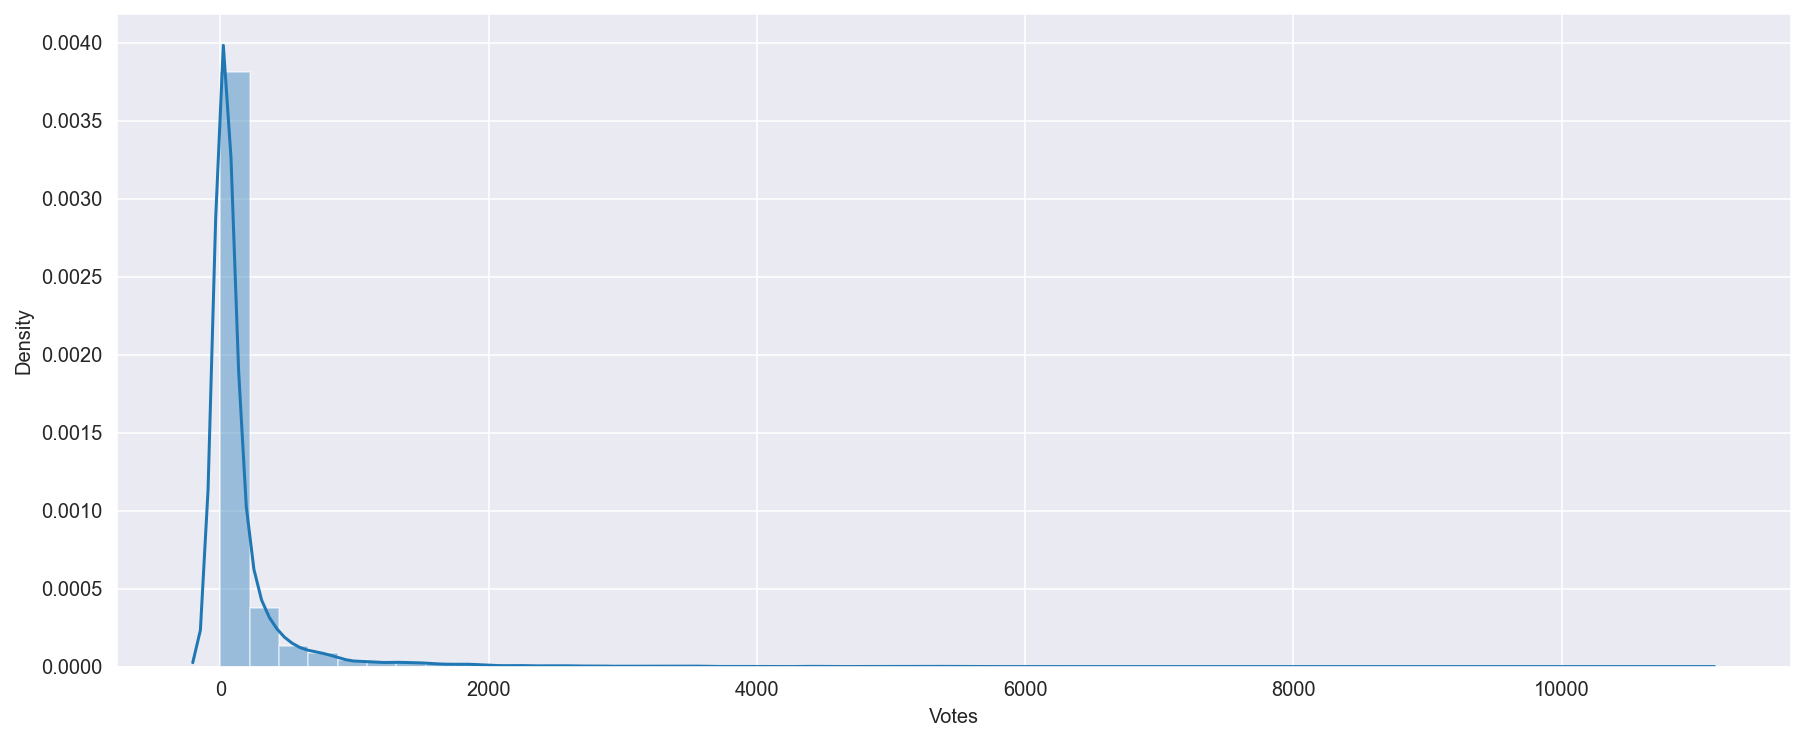

In [185]:
plt.figure(figsize=(15,6))
sns.distplot(df['Votes']);

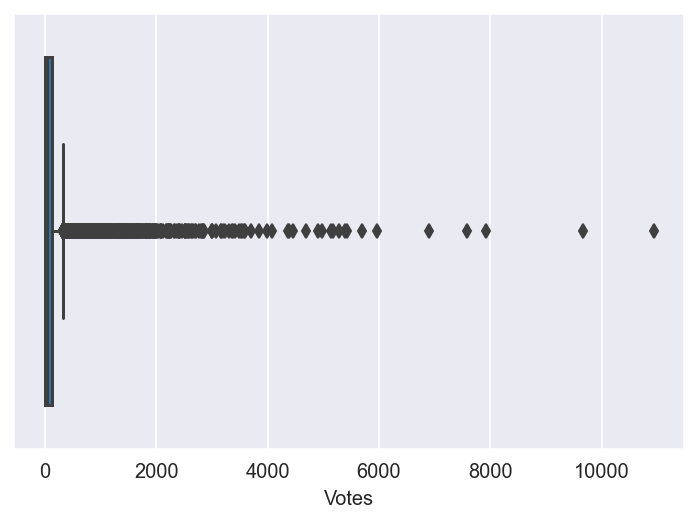

In [186]:
sns.boxplot(df['Votes']);

### Correlation of Target Variable with other Variables

In [187]:
cor_target=df.corrwith(df['Votes'])
cor_target

Restaurant ID          -0.147023
Country Code            0.154530
Longitude              -0.085101
Latitude               -0.022962
Average Cost for two    0.067783
Price range             0.309444
Aggregate rating        0.313691
Votes                   1.000000
dtype: float64

In [188]:
# Sort the variables in descending order (Ranking of variables w.r.t corr with target)

cor_target.sort_values(axis=0,ascending=False)

Votes                   1.000000
Aggregate rating        0.313691
Price range             0.309444
Country Code            0.154530
Average Cost for two    0.067783
Latitude               -0.022962
Longitude              -0.085101
Restaurant ID          -0.147023
dtype: float64

In [23]:
print('Maximum Value of "Votes":',df['Votes'].max())
print('Minimum Value of "Votes":',df['Votes'].min())
print('Mean Value of "Votes":',df['Votes'].mean().round(2))
print('Skewness of "Votes":',df['Votes'].skew().round(2))
print('Kurtosis of "Votes":',df['Votes'].kurtosis().round(2))
print('Variance of "Votes":',round(df['Votes'].var(),2))
print('Standard Deviation of "Votes":',round(df['Votes'].std(),2))

Maximum Value of "Votes": 10934
Minimum Value of "Votes": 0
Mean Value of "Votes": 156.91
Skewness of "Votes": 8.81
Kurtosis of "Votes": 128.23
Variance of "Votes": 185045.49
Standard Deviation of "Votes": 430.17


# Categorical Variables:

In [189]:
df_cat

Restaurant Name              City  \
0             Le Petit Souffle       Makati City   
1             Izakaya Kikufuji       Makati City   
2       Heat - Edsa Shangri-La  Mandaluyong City   
3                         Ooma  Mandaluyong City   
4                  Sambo Kojin  Mandaluyong City   
...                        ...               ...   
9546              NamlÛ± Gurme         ÛÁstanbul   
9547             Ceviz AÛôacÛ±         ÛÁstanbul   
9548                     Huqqa         ÛÁstanbul   
9549              Aôôk Kahve         ÛÁstanbul   
9550  Walter's Coffee Roastery         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose  \
0     Century City Mall, Poblacion, Makati City, Mak...   
1     Little Tokyo, Legaspi Village, Makati City, Ma...   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...   
...                                                 ...   
9546                                Karakí_y, ÛÁstanbul   
9547                               Koôuyolu, ÛÁstanbul   
9548                             Kuruí_eôme, ÛÁstanbul   
9549                             Kuruí_eôme, ÛÁstanbul   
9550                                    Moda, ÛÁstanbul   

                              Cuisines          Currency Has Table booking  \
0           French, Japanese, Desserts  Botswana Pula(P)               Yes   
1                             Japanese  Botswana Pula(P)               Yes   
2     Seafood, Asian, Filipino, Indian  Botswana Pula(P)               Yes   
3                      Japanese, Sushi  Botswana Pula(P)                No   
4                     Japanese, Korean  Botswana Pula(P)               Yes   
...                                ...               ...               ...   
9546                           Turkish  Turkish Lira(TL)                No   
9547   World Cuisine, Patisserie, Cafe  Turkish Lira(TL)                No   
9548            Italian, World Cuisine  Turkish Lira(TL)                No   
9549                   Restaurant Cafe  Turkish Lira(TL)                No   
9550                              Cafe  Turkish Lira(TL)                No   

     Has Online delivery Is delivering now Switch to order menu Rating color  \
0                     No                No                   No   Dark Green   
1                     No                No                   No   Dark Green   
2                     No                No                   No        Green   
3                     No                No                   No   Dark Green   
4         

In [190]:
# A quick glance over Categorical Variables

df.describe(include='O')

Restaurant Name       City                     Address  \
count              9551       9551                        9551   
unique             7446        141                        8918   
top     Cafe Coffee Day  New Delhi  Dilli Haat, INA, New Delhi   
freq                 83       5473                          11   

               Locality            Locality Verbose      Cuisines  \
count              9551                        9551          9542   
unique             1208                        1265          1825   
top     Connaught Place  Connaught Place, New Delhi  North Indian   
freq                122                         122           936   

                  Currency Has Table booking Has Online delivery  \
count                 9551              9551                9551   
unique                  12                 2                   2   
top     Indian Rupees(Rs.)                No                  No   
freq                  8652              8393                7100   

       Is delivering now Switch to order menu Rating color Rating text Country  
count               9551                 9551         9551        9551    9551  
unique                 2                    1            6           6      15  
top                   No                   No       Orange     Average   India  
freq                9517                 9551         3737        3737    8652

In [191]:
df.select_dtypes(include=['object','category']).columns.tolist()

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text',
 'Country']

In [192]:
# List of Categorical Variables in a DataFrame

df_cat=df.select_dtypes(include=['object','category'])
df_cat.count()

Restaurant Name         9551
City                    9551
Address                 9551
Locality                9551
Locality Verbose        9551
Cuisines                9542
Currency                9551
Has Table booking       9551
Has Online delivery     9551
Is delivering now       9551
Switch to order menu    9551
Rating color            9551
Rating text             9551
Country                 9551
dtype: int64

In [193]:
# No. of Categorical Variables in a DataFrame

df.dtypes.value_counts()

object     14
int64       5
float64     3
dtype: int64

**Frequency of Unique values in each Categorical Variables:**

In [194]:
for i in df_cat:
    print(i)
    print('\n')
    frequency=df[i].value_counts()
    print(frequency)
    print('\n')

Restaurant Name


Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64


City


New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64


Address


Dilli Haat, INA, New Delhi                                                               11
Sector 41, Noida                                                                         11
Greater Kailash (GK) 1, New Delhi                                        

In [195]:
# Frequency of unique values in each Categorical Variable in percentage form

for i in df_cat:
    print(i)
    print('\n')
    frequency=(df[i].value_counts(normalize=True)*100).round(2)
    print(frequency)
    print('\n')

Restaurant Name


Cafe Coffee Day             0.87
Domino's Pizza              0.83
Subway                      0.66
Green Chick Chop            0.53
McDonald's                  0.50
                            ... 
Odeon Social                0.01
Johnny Rockets              0.01
House of Commons            0.01
HotMess                     0.01
Walter's Coffee Roastery    0.01
Name: Restaurant Name, Length: 7446, dtype: float64


City


New Delhi           57.30
Gurgaon             11.71
Noida               11.31
Faridabad            2.63
Ghaziabad            0.26
                    ...  
Panchkula            0.01
Mc Millan            0.01
Mayfield             0.01
Macedon              0.01
Vineland Station     0.01
Name: City, Length: 141, dtype: float64


Address


Dilli Haat, INA, New Delhi                                                               0.12
Sector 41, Noida                                                                         0.12
Greater Kailash (GK) 1, New Delh

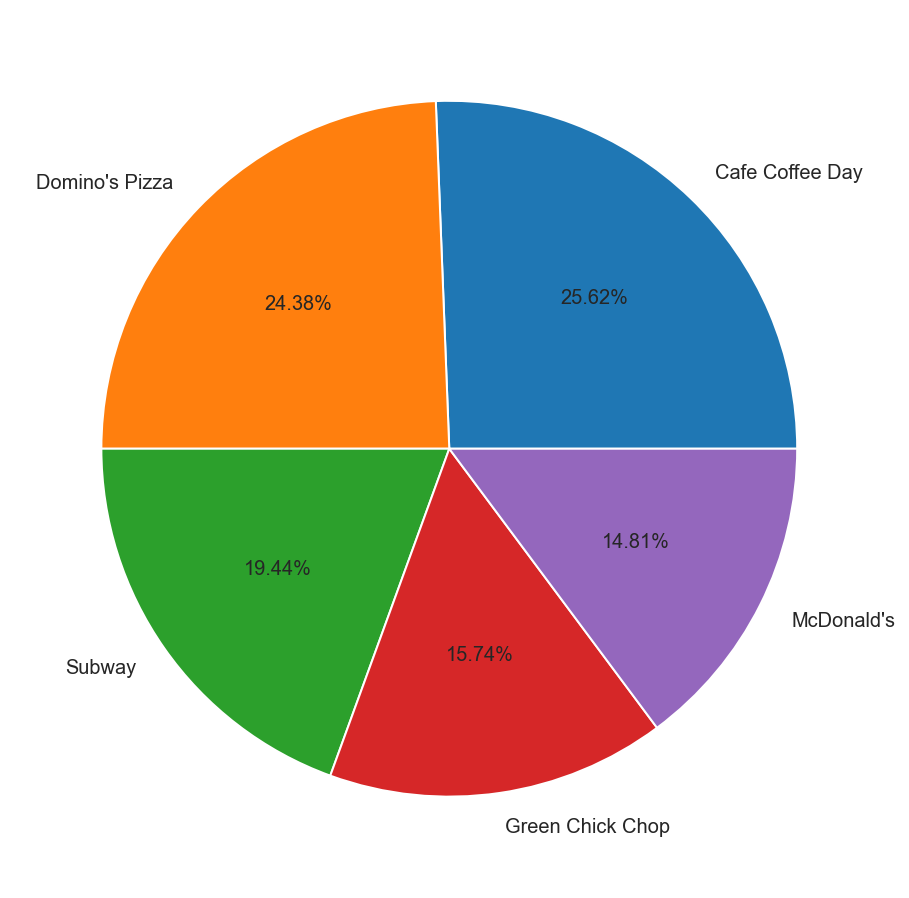

In [398]:
city_values=df['Restaurant Name'].value_counts().values
city_labels=df['Restaurant Name'].value_counts().index

plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%');

In [141]:
df['Restaurant Name'].value_counts().index[:5]

Index(['Cafe Coffee Day', 'Domino's Pizza', 'Subway', 'Green Chick Chop',
       'McDonald's'],
      dtype='object')

In [146]:
df['Restaurant Name'].value_counts().sort_values(ascending=False)[:5]

Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Name: Restaurant Name, dtype: int64

In [353]:
df['Restaurant Name'].value_counts()

Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64

### Visualization of Categorical Variables:

In [372]:
df_cat.columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text', 'Country'],
      dtype='object')

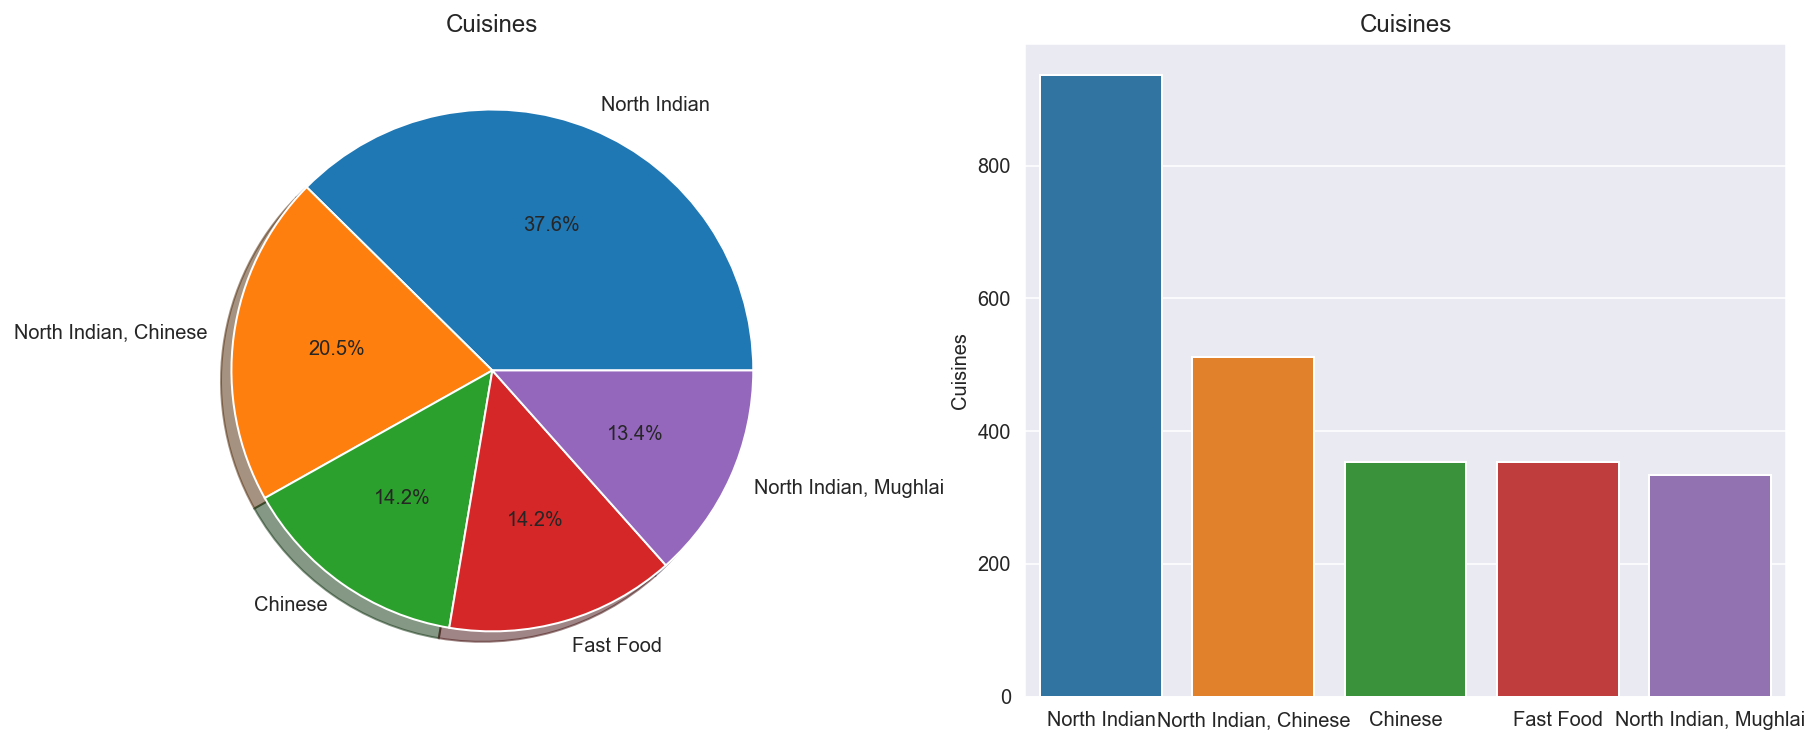

In [393]:
f,ax=plt.subplots(1,2,figsize=(15,6))
df['Cuisines'].value_counts()[:5].plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Cuisines')
ax[0].set_ylabel('')
sns.barplot(y=df["Cuisines"].value_counts()[:5],x=df["Cuisines"].value_counts()[:5].index,ax=ax[1])
ax[1].set_title('Cuisines');

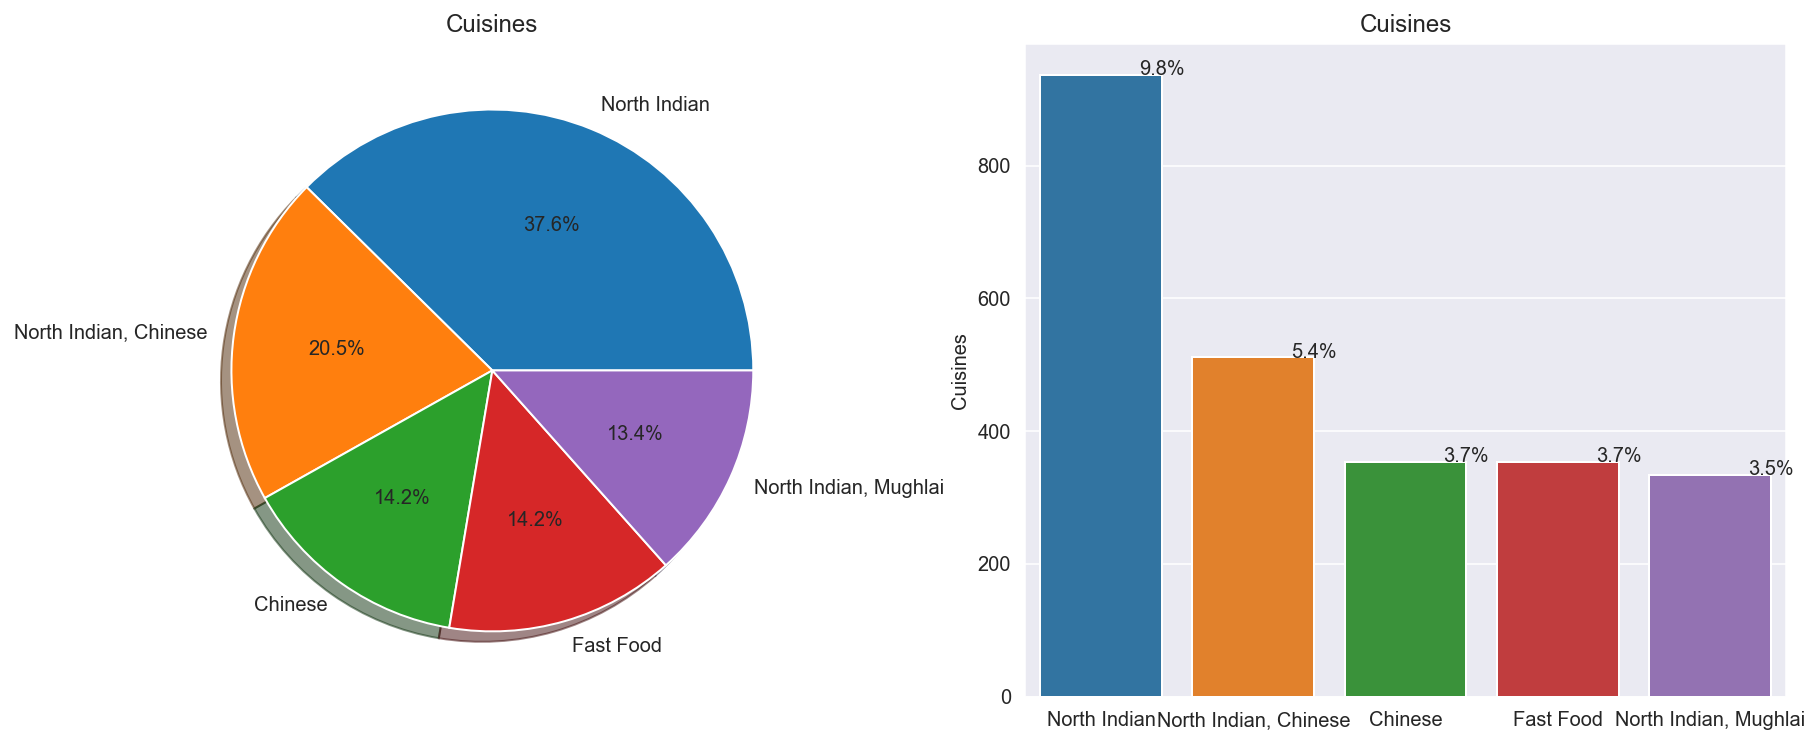

In [394]:
total = float(len(df))
f,ax=plt.subplots(1,2,figsize=(15,6))
df['Cuisines'].value_counts()[:5].plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Cuisines')
ax[0].set_ylabel('')
sns.barplot(y=df["Cuisines"].value_counts()[:5],x=df["Cuisines"].value_counts()[:5].index,ax=ax[1])
ax[1].set_title('Cuisines');
for p in ax[1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax[1].annotate(percentage, (x, y),ha='center')

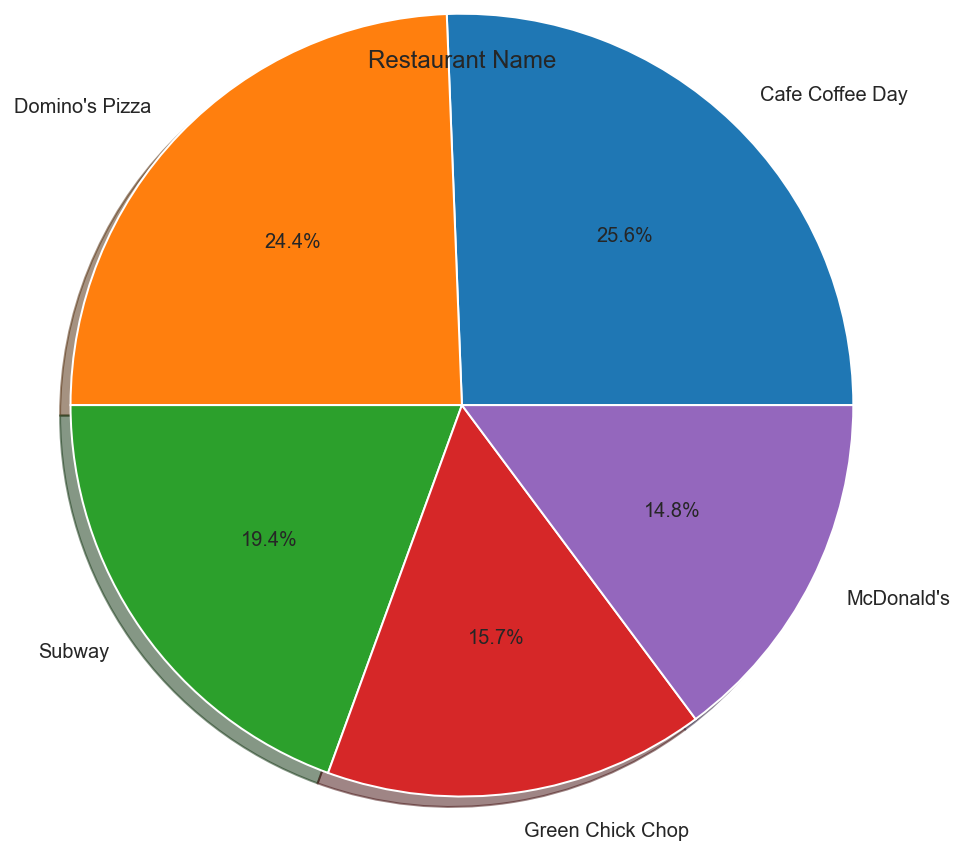

In [368]:
plt.figure(figsize=(12,6))
plt.title('Restaurant Name')
plt.ylabel(' ')
df['Restaurant Name'].value_counts()[:5].plot.pie(autopct='%1.1f%%',shadow=True,radius=1.5);

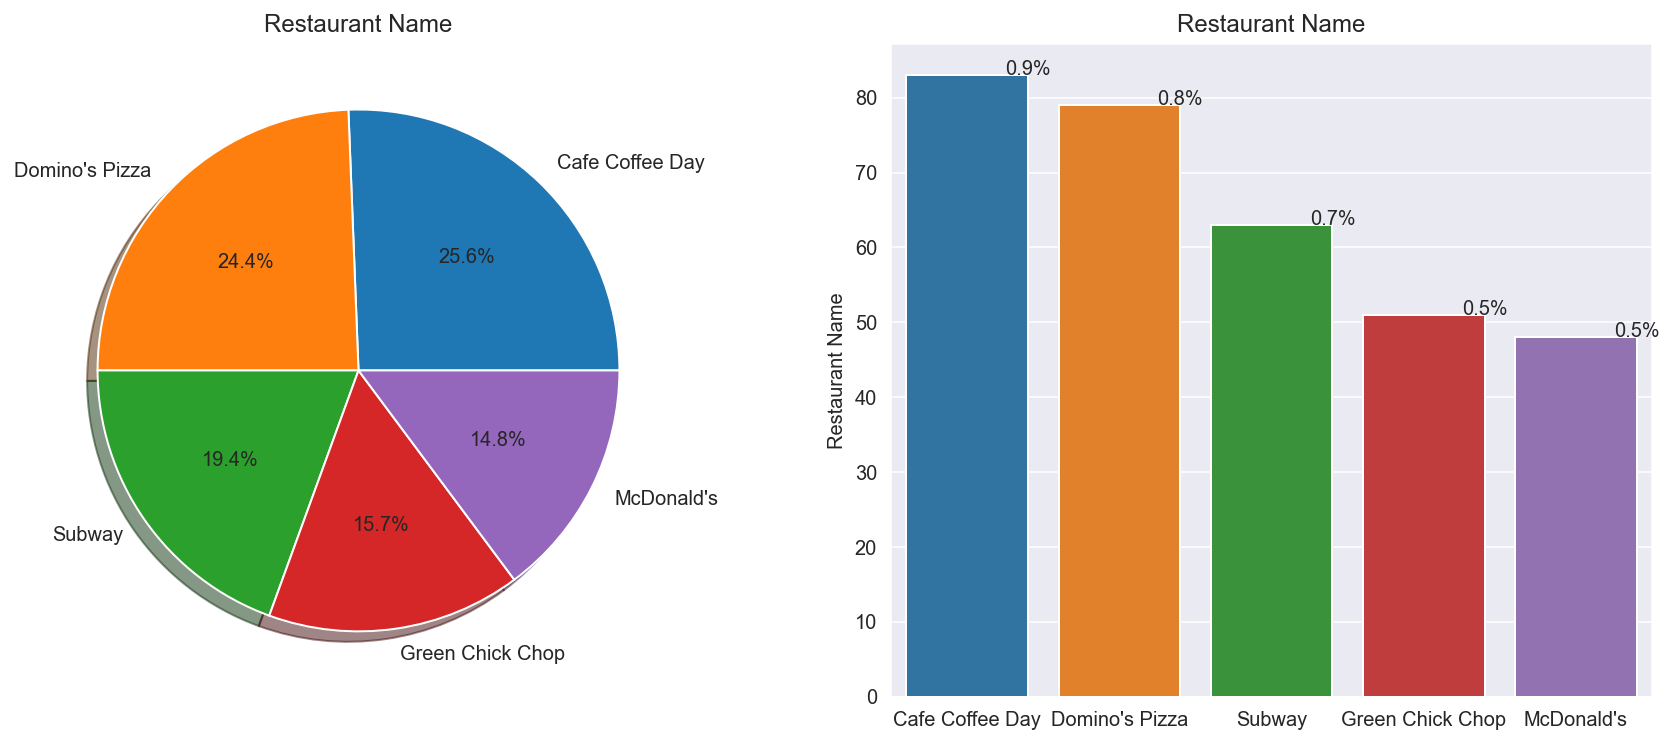

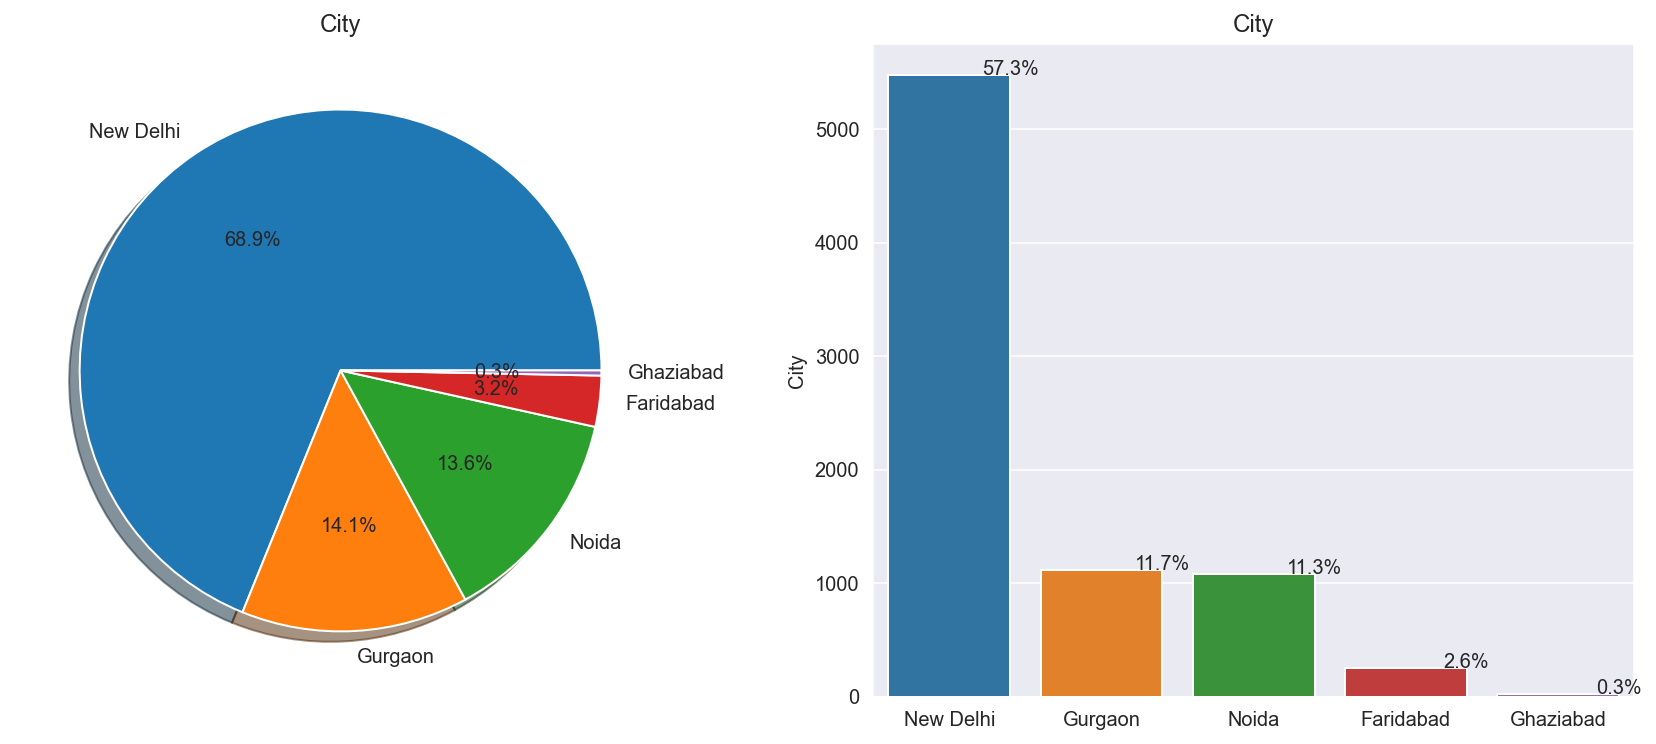

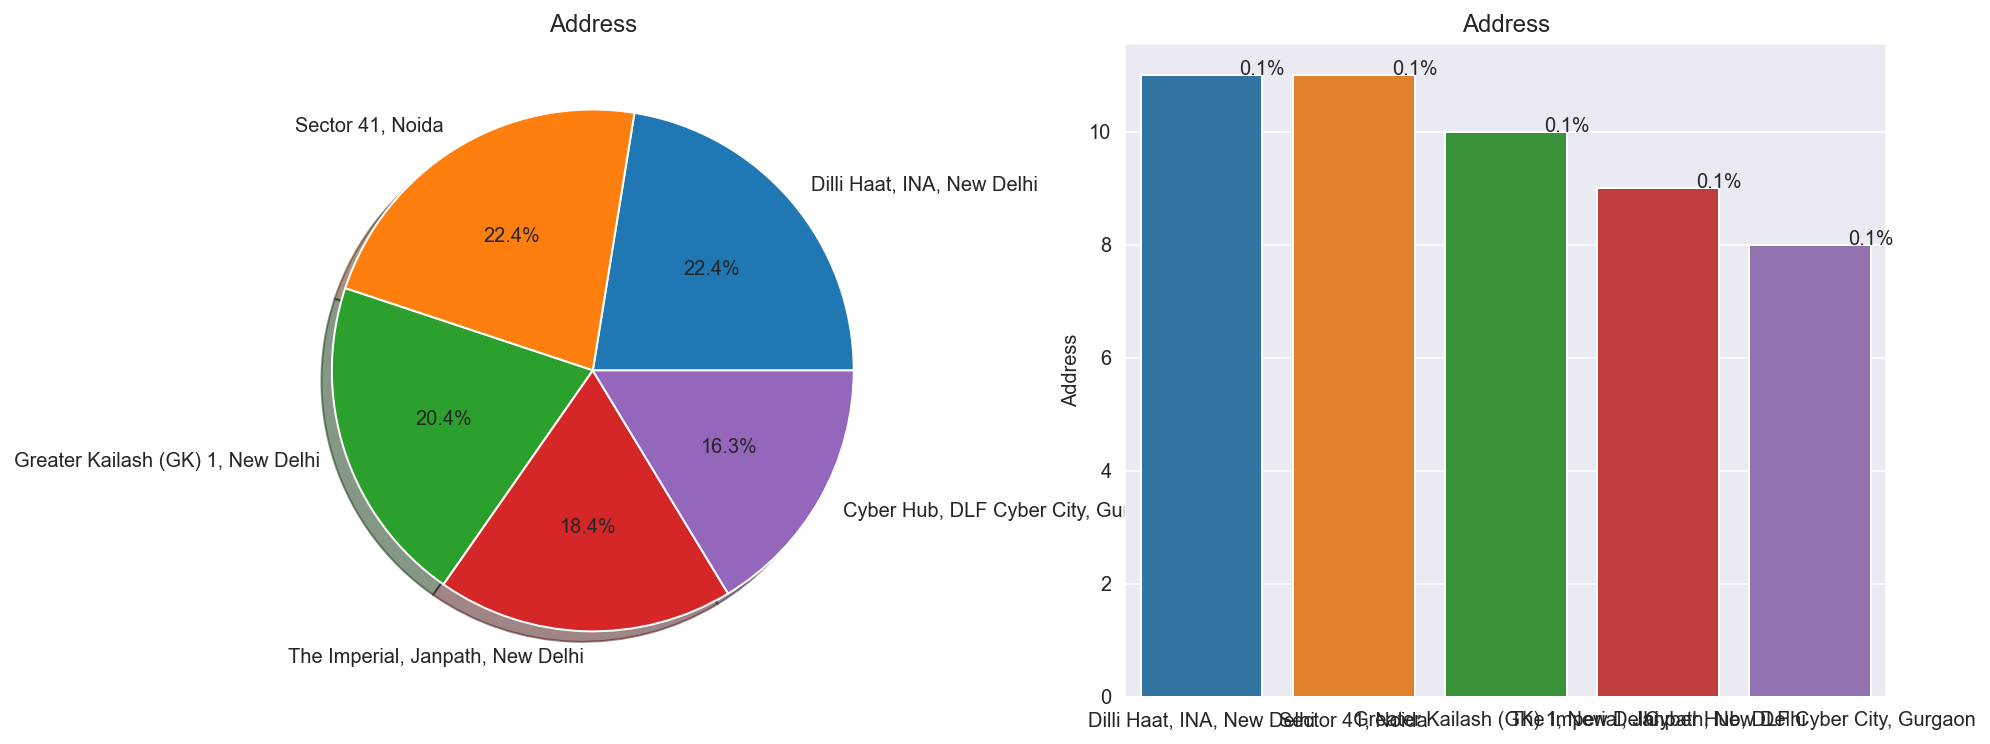

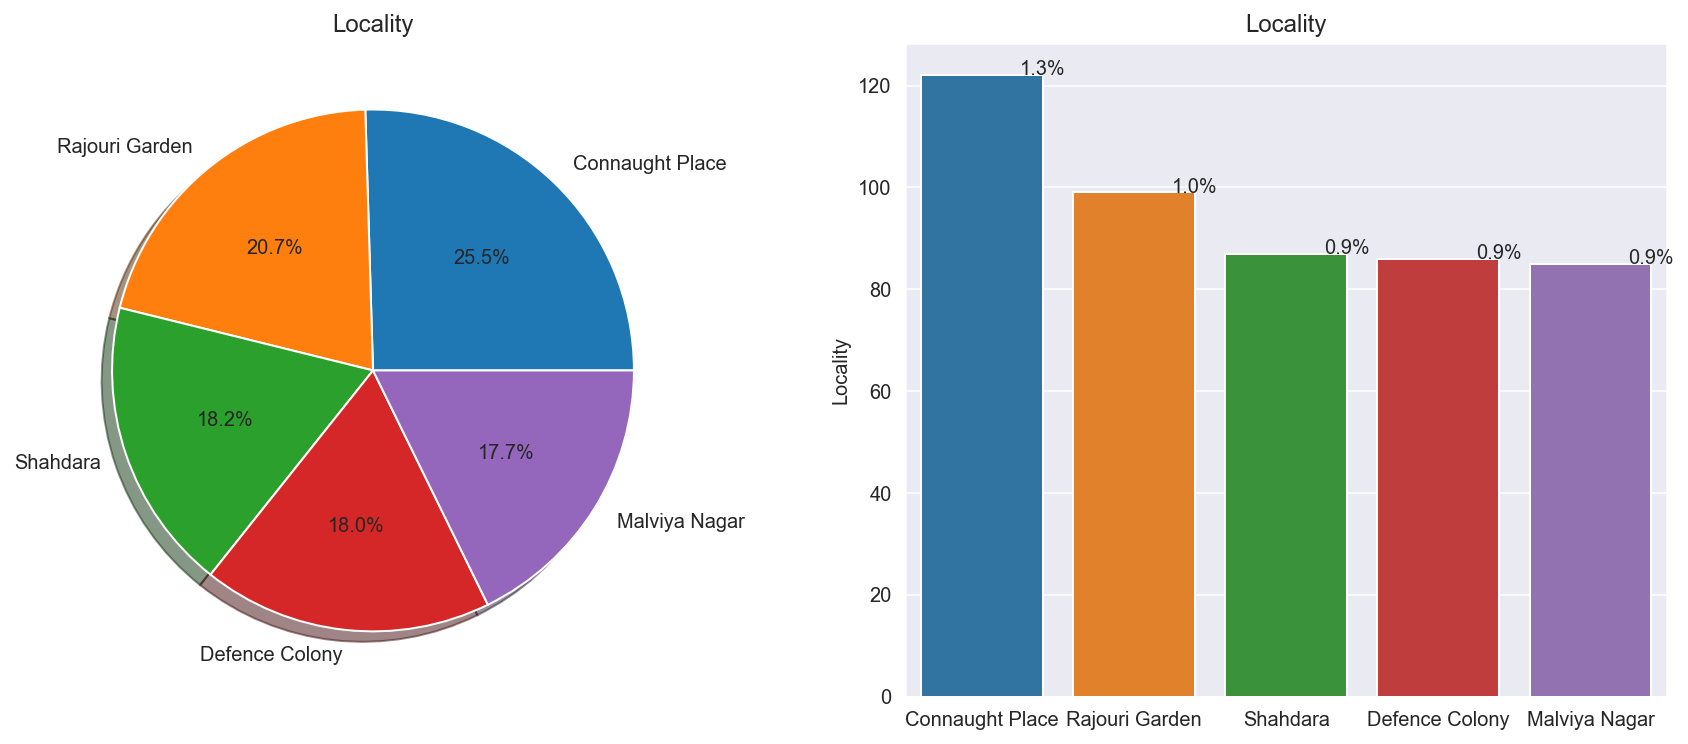

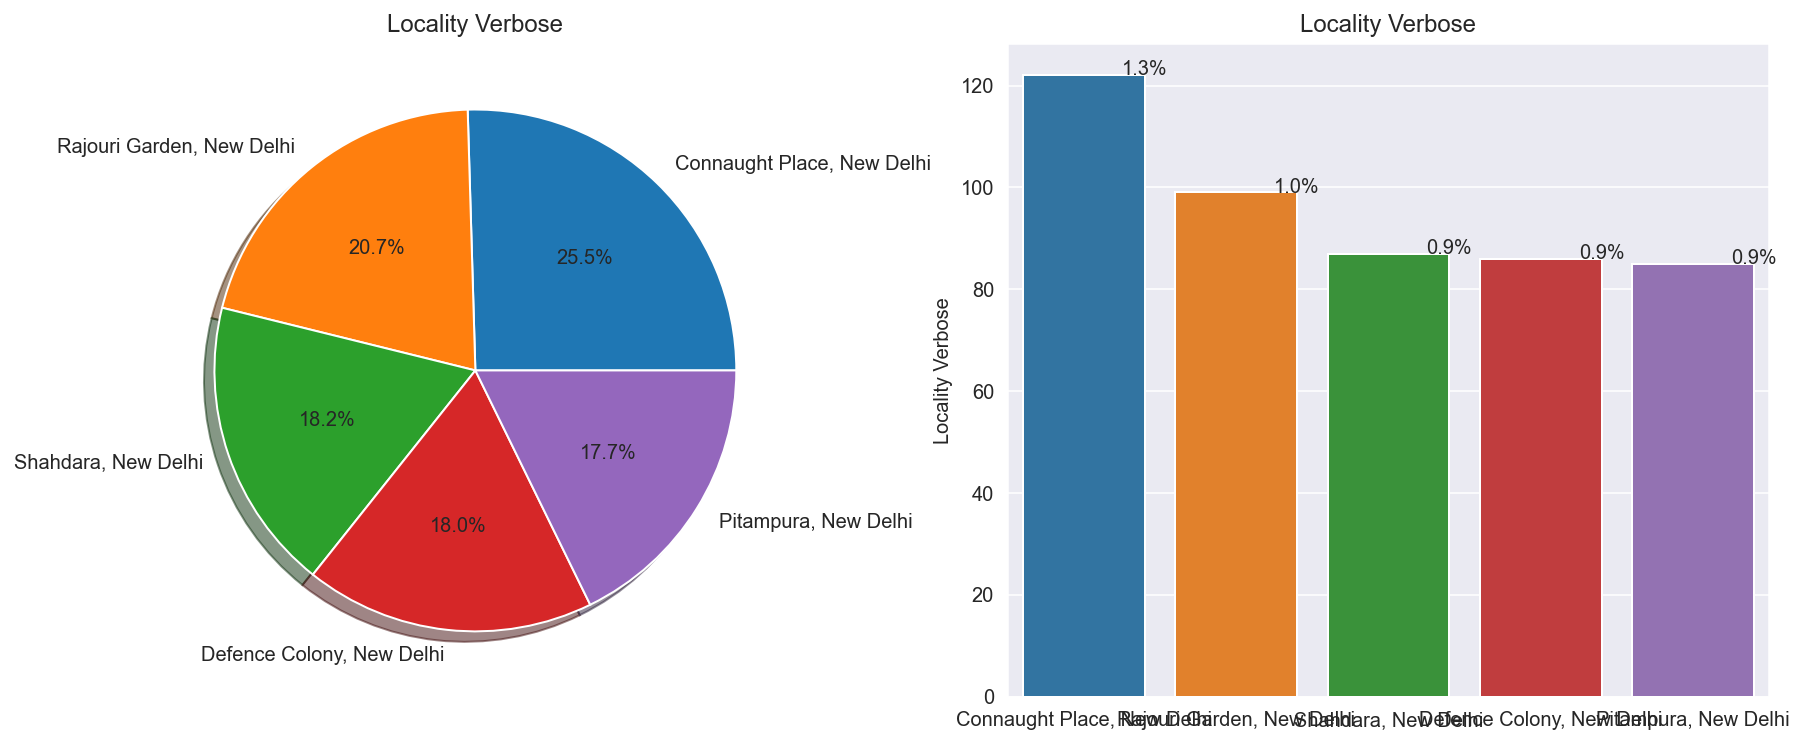

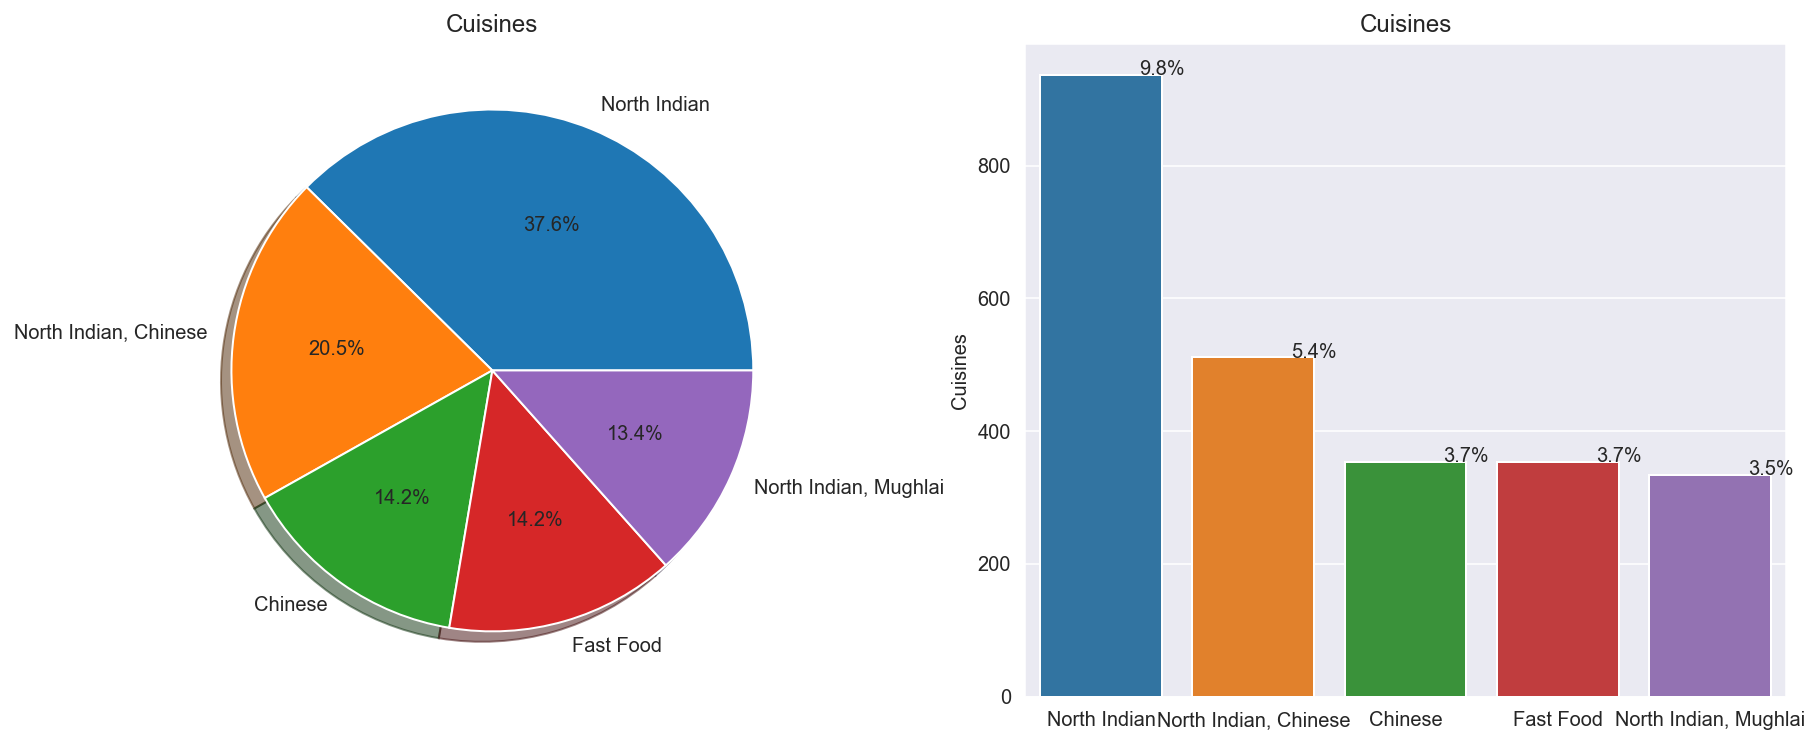

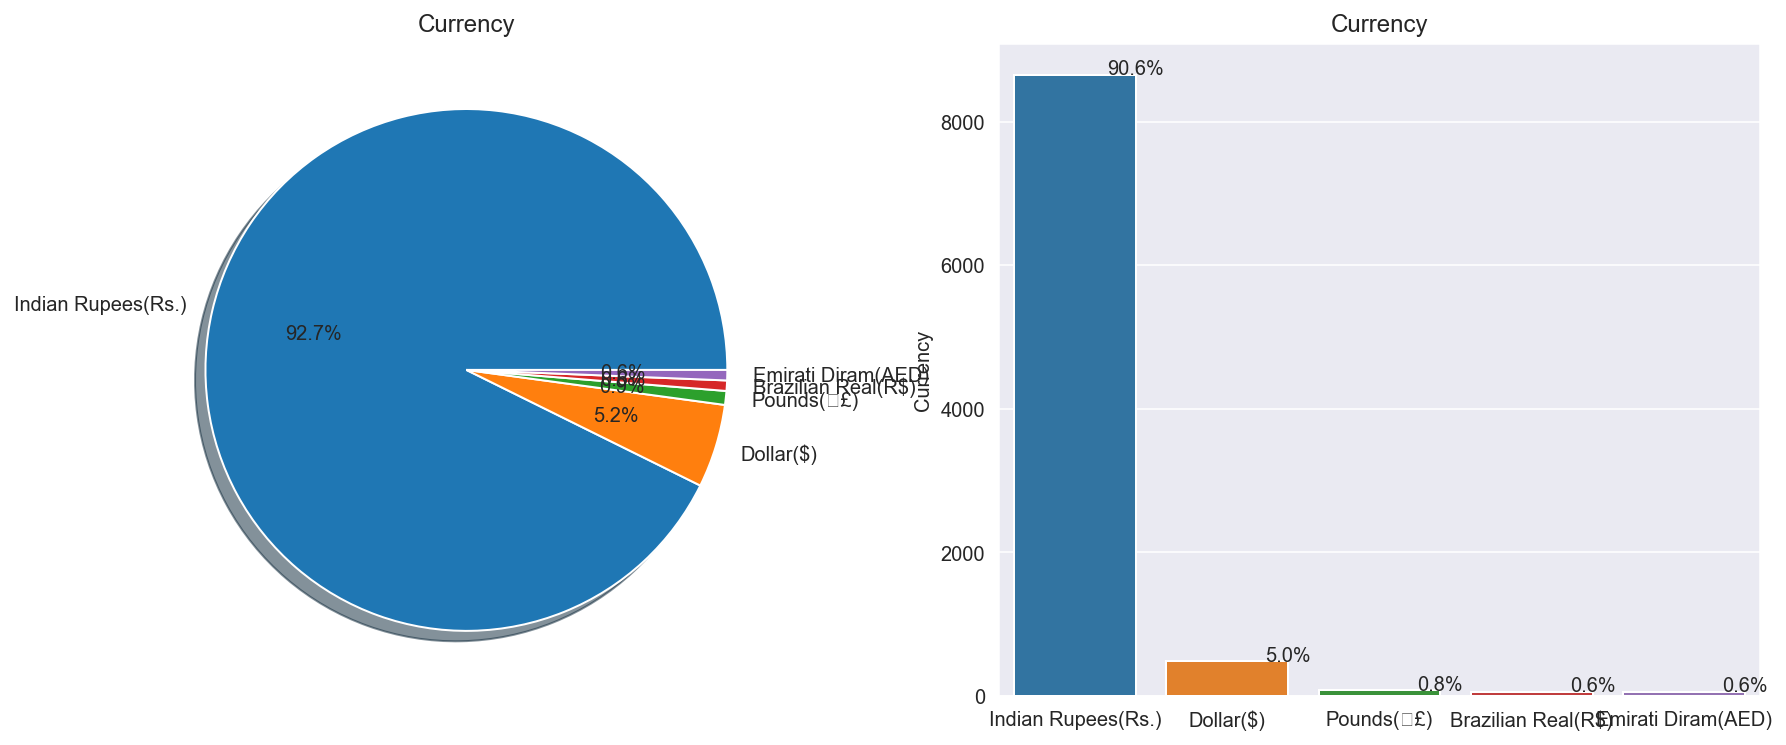

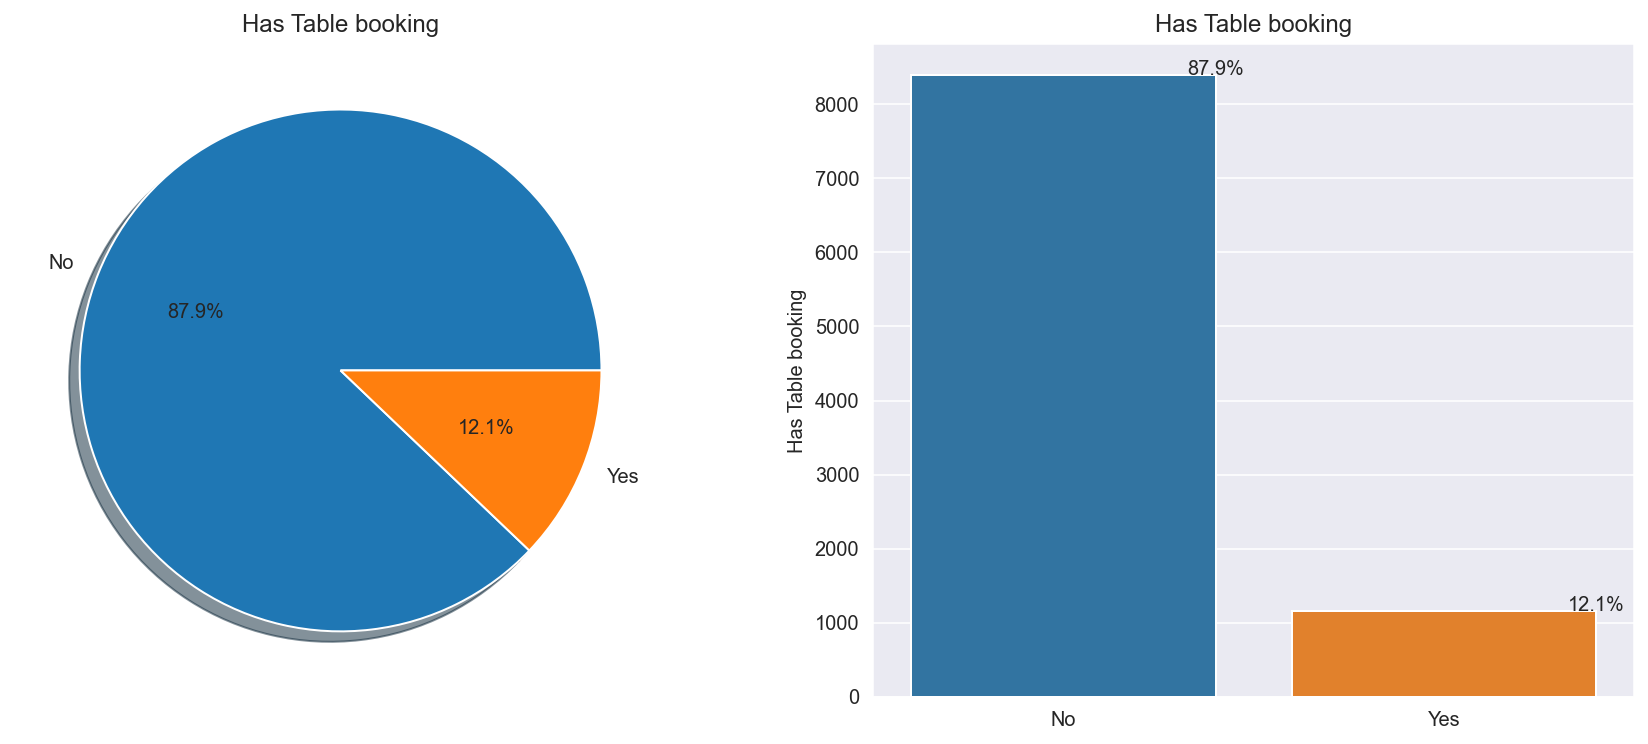

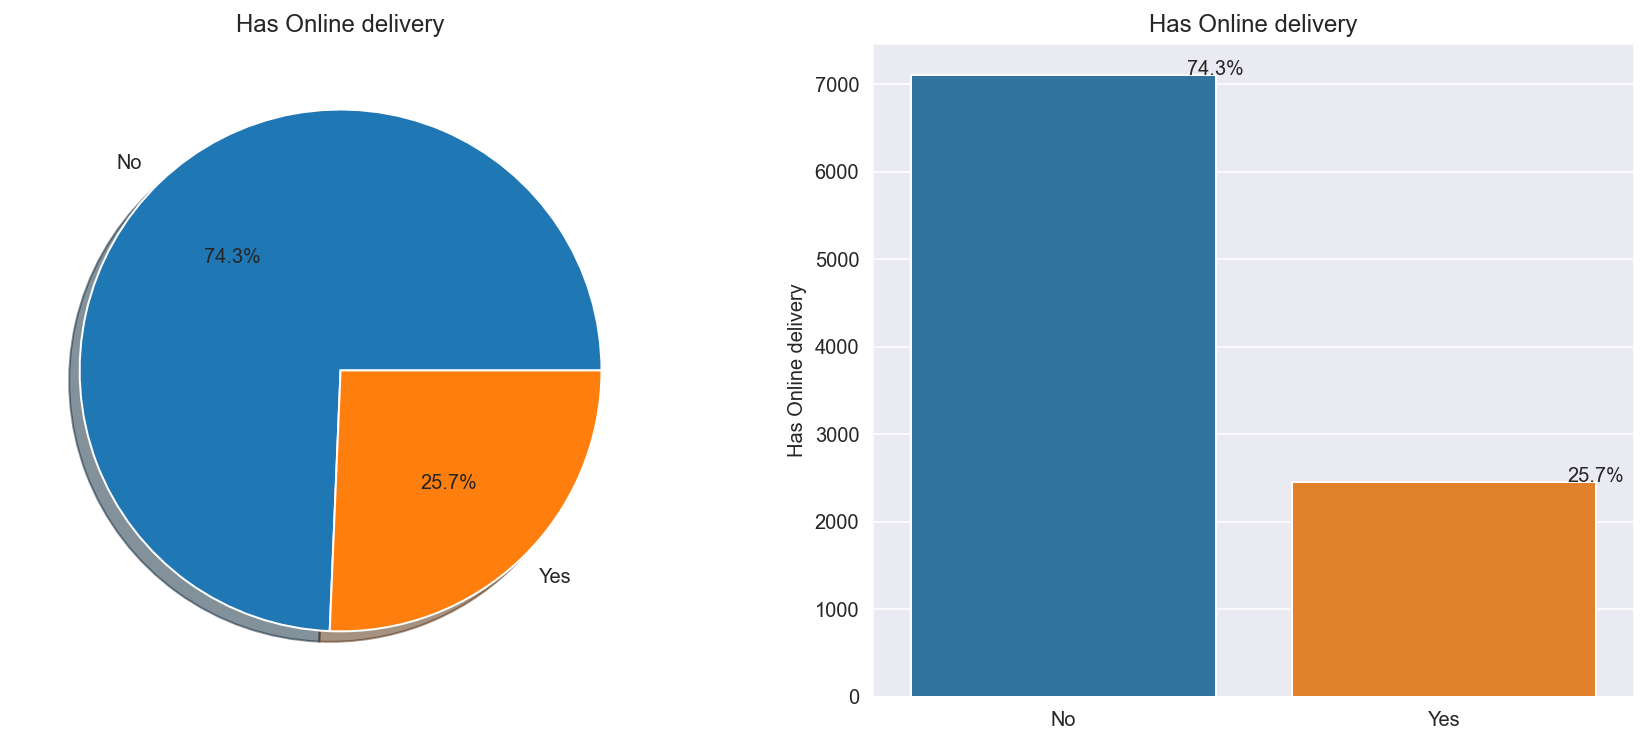

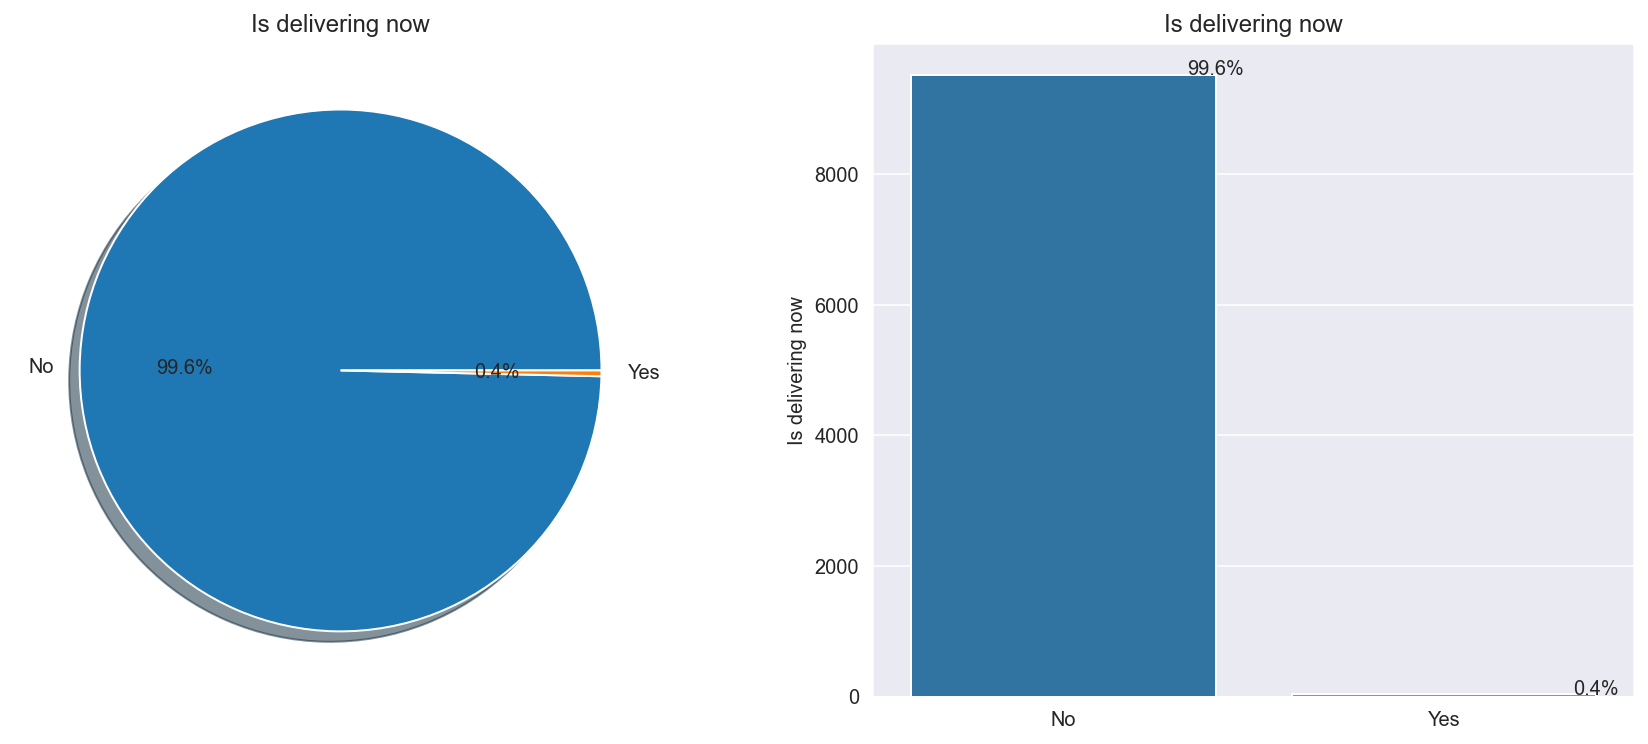

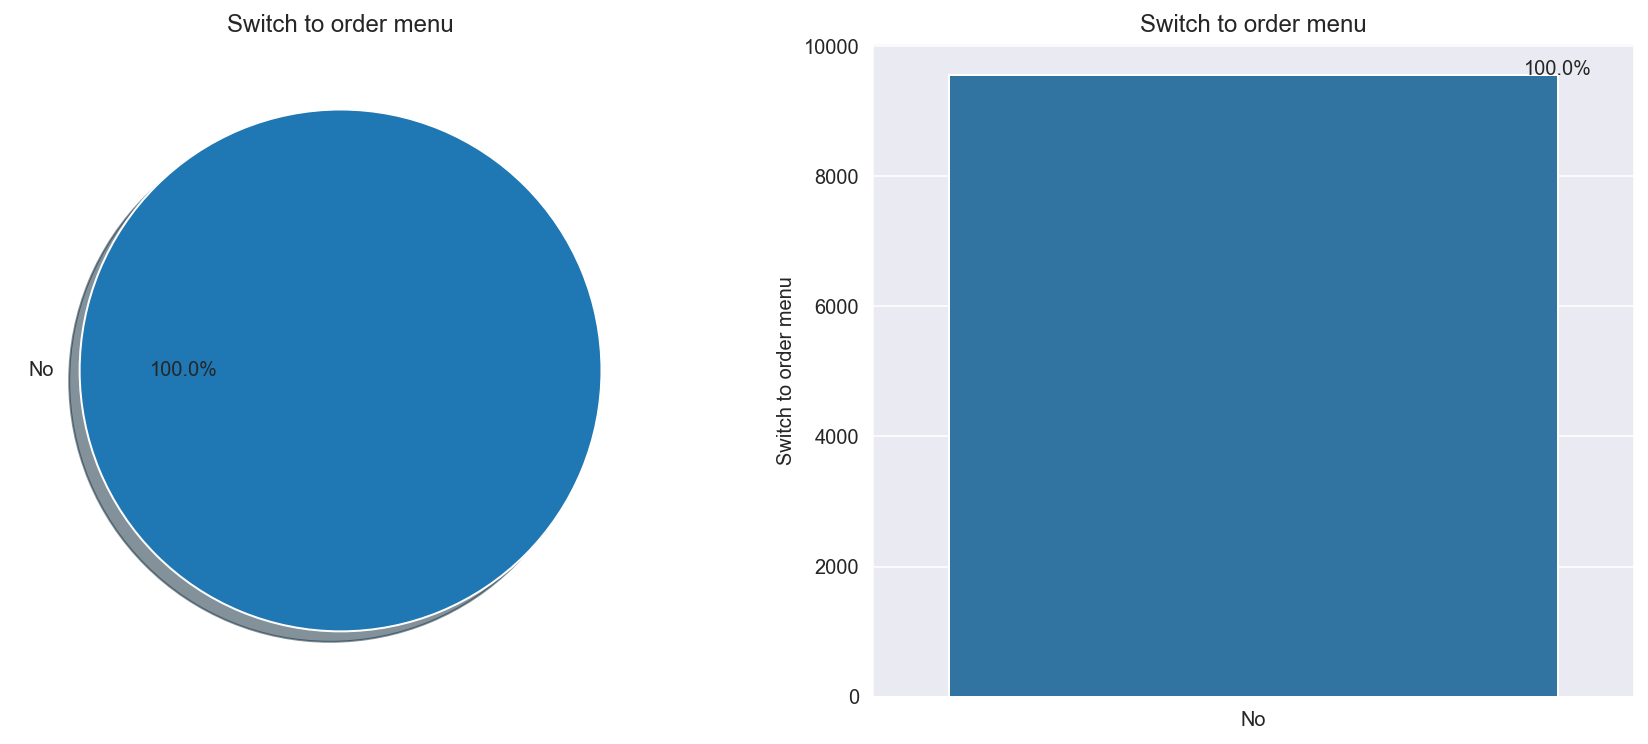

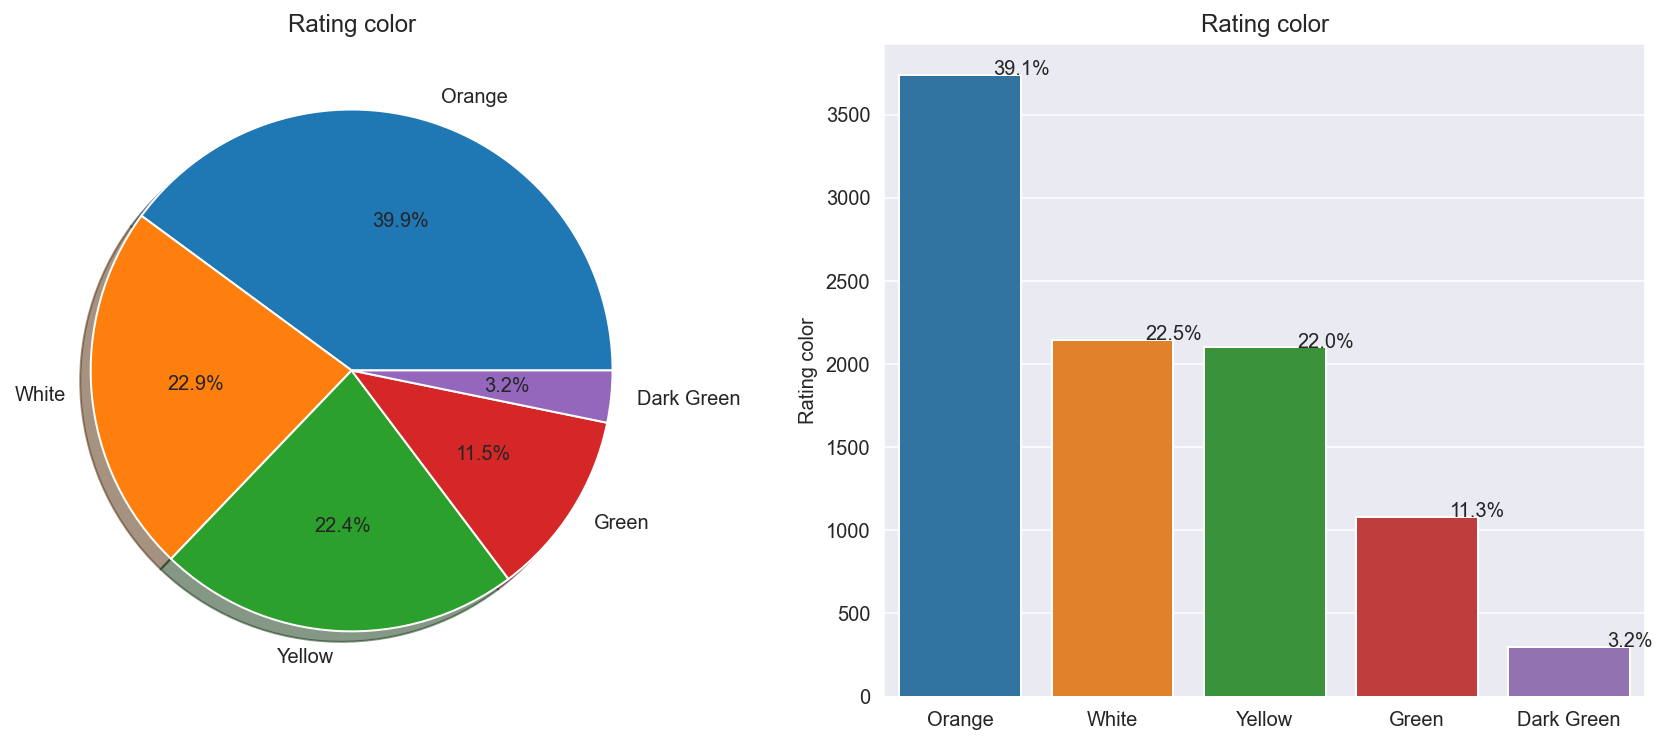

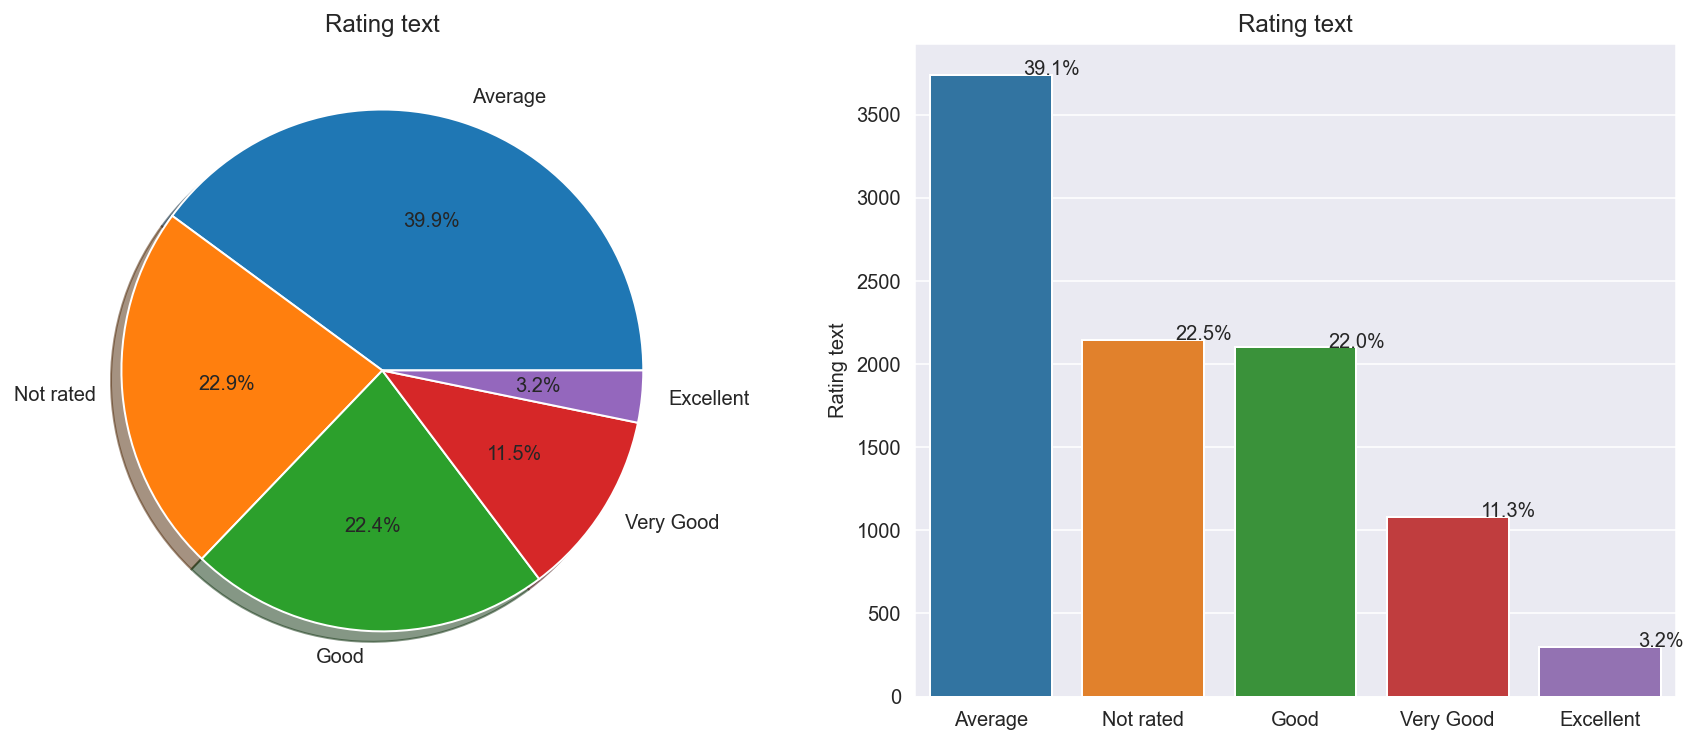

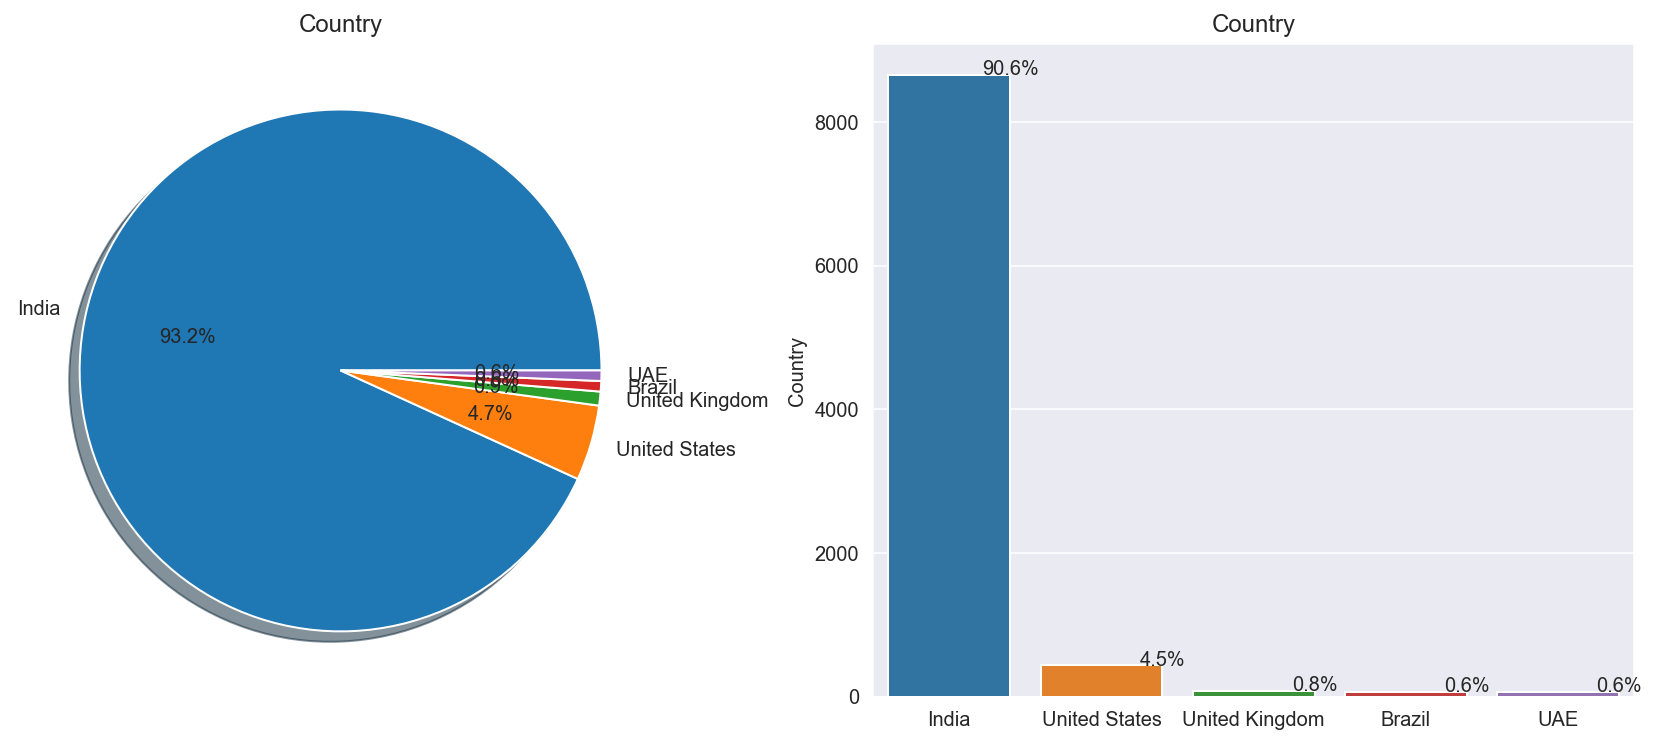

In [389]:
for i in df_cat:
    total = float(len(df))
    f,ax=plt.subplots(1,2,figsize=(15,6))
    df[i].value_counts()[:5].plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_title(i)
    ax[0].set_ylabel('')
    sns.barplot(y=df[i].value_counts()[:5],x=df[i].value_counts()[:5].index,ax=ax[1])
    ax[1].set_title(i);
    for p in ax[1].patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax[1].annotate(percentage, (x, y),ha='center')

In [130]:
df['City'].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

In [42]:
df_cat.columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

In [43]:
# Mode of Categorical Values

cat_col=['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text']
df[cat_col].mode()

Restaurant Name       City                     Address         Locality  \
0  Cafe Coffee Day  New Delhi  Dilli Haat, INA, New Delhi  Connaught Place   
1              NaN        NaN            Sector 41, Noida              NaN   

             Locality Verbose      Cuisines            Currency  \
0  Connaught Place, New Delhi  North Indian  Indian Rupees(Rs.)   
1                         NaN           NaN                 NaN   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1               NaN                 NaN               NaN   

  Switch to order menu Rating color Rating text  
0                   No       Orange     Average  
1                  NaN          NaN         NaN

# Numerical Variables:

In [44]:
df_num

Restaurant ID  Country Code   Longitude   Latitude  \
0           6317637           162  121.027535  14.565443   
1           6304287           162  121.014101  14.553708   
2           6300002           162  121.056831  14.581404   
3           6318506           162  121.056475  14.585318   
4           6314302           162  121.057508  14.584450   
...             ...           ...         ...        ...   
9546        5915730           208   28.977392  41.022793   
9547        5908749           208   29.041297  41.009847   
9548        5915807           208   29.034640  41.055817   
9549        5916112           208   29.036019  41.057979   
9550        5927402           208   29.026016  40.984776   

      Average Cost for two  Price range  Aggregate rating  Votes  
0                     1100            3               4.8    314  
1                     1200            3               4.5    591  
2                     4000            4               4.4    270  
3                     1500            4               4.9    365  
4                     1500            4               4.8    229  
...                    ...          ...               ...    ...  
9546                    80            3               4.1    788  
9547                   105            3               4.2   1034  
9548                   170            4               3.7    661  
9549                   120            4               4.0    901  
9550                    55            2               4.0    591  

[9551 rows x 8 columns]

In [45]:
df_num.count()

Restaurant ID           9551
Country Code            9551
Longitude               9551
Latitude                9551
Average Cost for two    9551
Price range             9551
Aggregate rating        9551
Votes                   9551
dtype: int64

In [46]:
df_num.max()

Restaurant ID           1.850065e+07
Country Code            2.160000e+02
Longitude               1.748321e+02
Latitude                5.597698e+01
Average Cost for two    8.000000e+05
Price range             4.000000e+00
Aggregate rating        4.900000e+00
Votes                   1.093400e+04
dtype: float64

In [47]:
df_num.min()

Restaurant ID            53.000000
Country Code              1.000000
Longitude              -157.948486
Latitude                -41.330428
Average Cost for two      0.000000
Price range               1.000000
Aggregate rating          0.000000
Votes                     0.000000
dtype: float64

In [48]:
df_num.mean()

Restaurant ID           9.051128e+06
Country Code            1.836562e+01
Longitude               6.412657e+01
Latitude                2.585438e+01
Average Cost for two    1.199211e+03
Price range             1.804837e+00
Aggregate rating        2.666370e+00
Votes                   1.569097e+02
dtype: float64

### Descriptive Statistics

In [49]:
# Basic Statistical summery of Numerical Variables

df_num.describe().T.round(2)

count        mean         std     min        25%  \
Restaurant ID         9551.0  9051128.35  8791521.28   53.00  301962.50   
Country Code          9551.0       18.37       56.75    1.00       1.00   
Longitude             9551.0       64.13       41.47 -157.95      77.08   
Latitude              9551.0       25.85       11.01  -41.33      28.48   
Average Cost for two  9551.0     1199.21    16121.18    0.00     250.00   
Price range           9551.0        1.80        0.91    1.00       1.00   
Aggregate rating      9551.0        2.67        1.52    0.00       2.50   
Votes                 9551.0      156.91      430.17    0.00       5.00   

                             50%          75%          max  
Restaurant ID         6004089.00  18352291.50  18500652.00  
Country Code                1.00         1.00       216.00  
Longitude                  77.19        77.28       174.83  
Latitude                   28.57        28.64        55.98  
Average Cost for two      400.00       700.00    800000.00  
Price range                 2.00         2.00         4.00  
Aggregate rating            3.20         3.70         4.90  
Votes                      31.00       131.00     10934.00

### Distribution, Skewness, Kurtosis


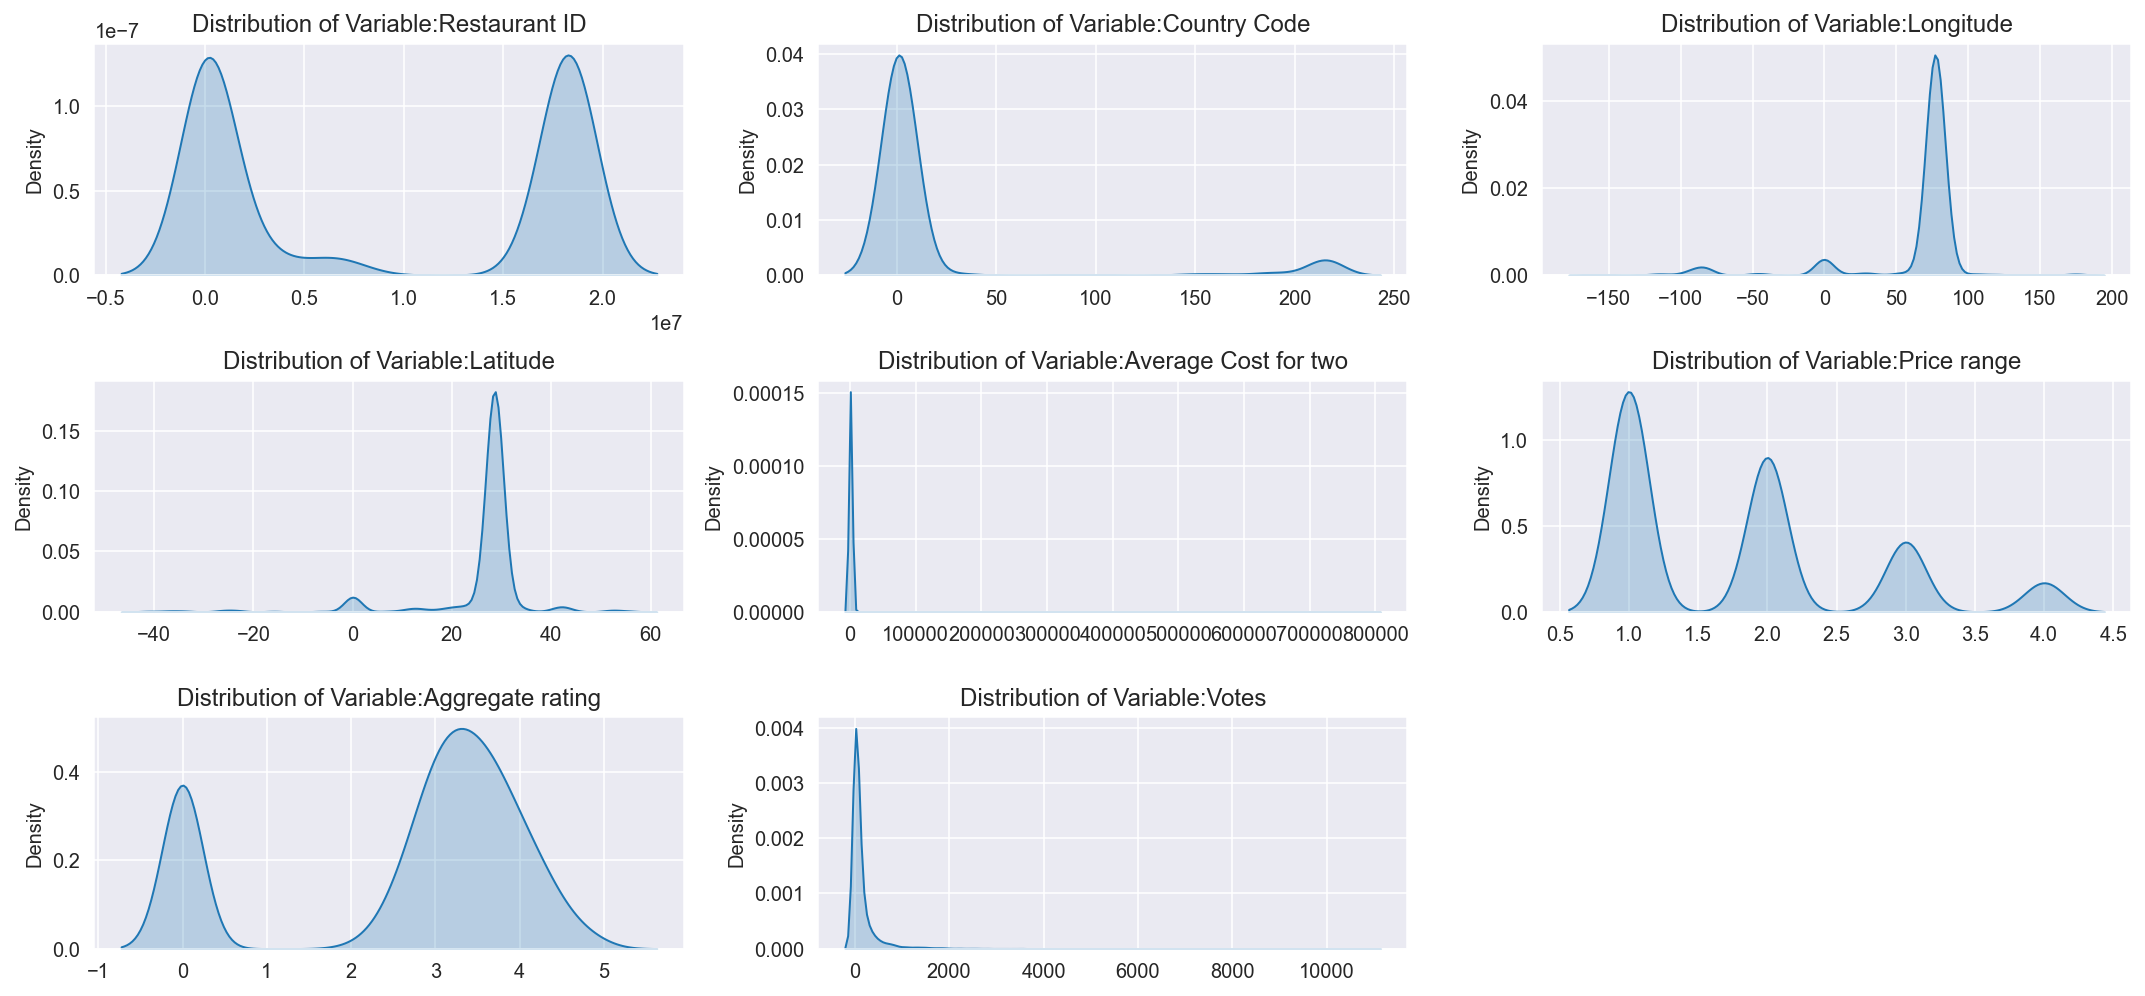

In [131]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,7),sharex=False,sharey=False)
axes=axes.ravel()  # array to ID
cols=df_num.columns[:] # create a list of dataframe columns to use

for col,ax in zip(cols,axes):
    data=df_num # select the data
    sns.kdeplot(data=data,x=col,shade=True,ax=ax)
    ax.set(title=f'Distribution of Variable:{col}',xlabel=None)
           
           
           
#fig.delaxes(axes[5])   # delete the empty subplot
fig.delaxes(axes[8])
fig.tight_layout();
           

In [54]:
def rand_color():
    c = "#"+"".join(map(hex,random.choices(range(256), k=3))).replace("0x","")
    if len(c) != 7:
        return rand_color()
    return c

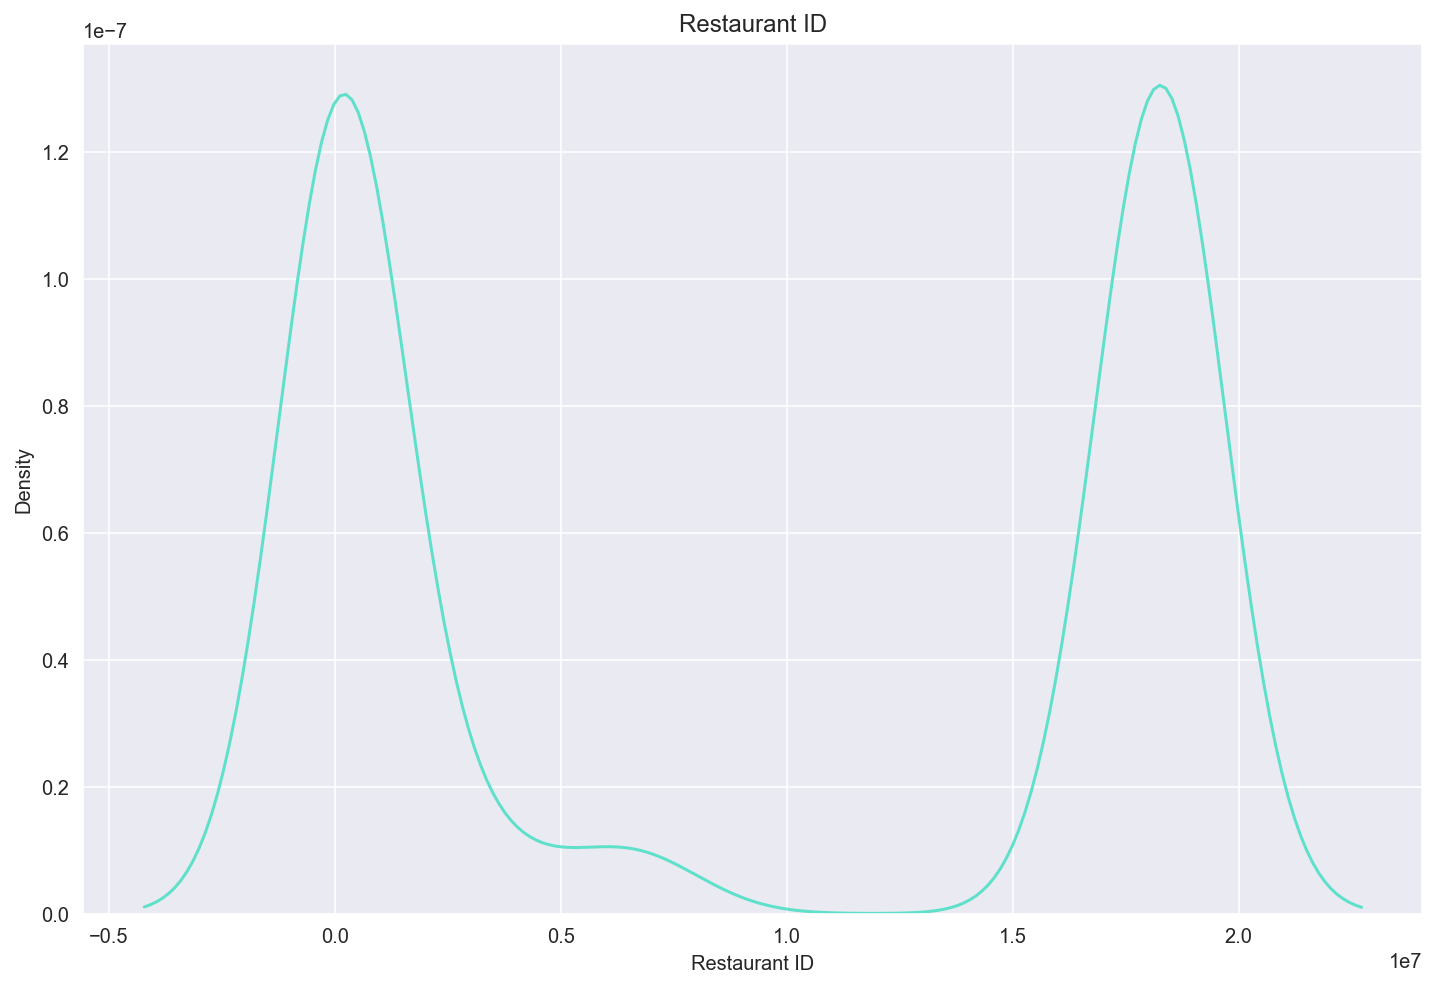

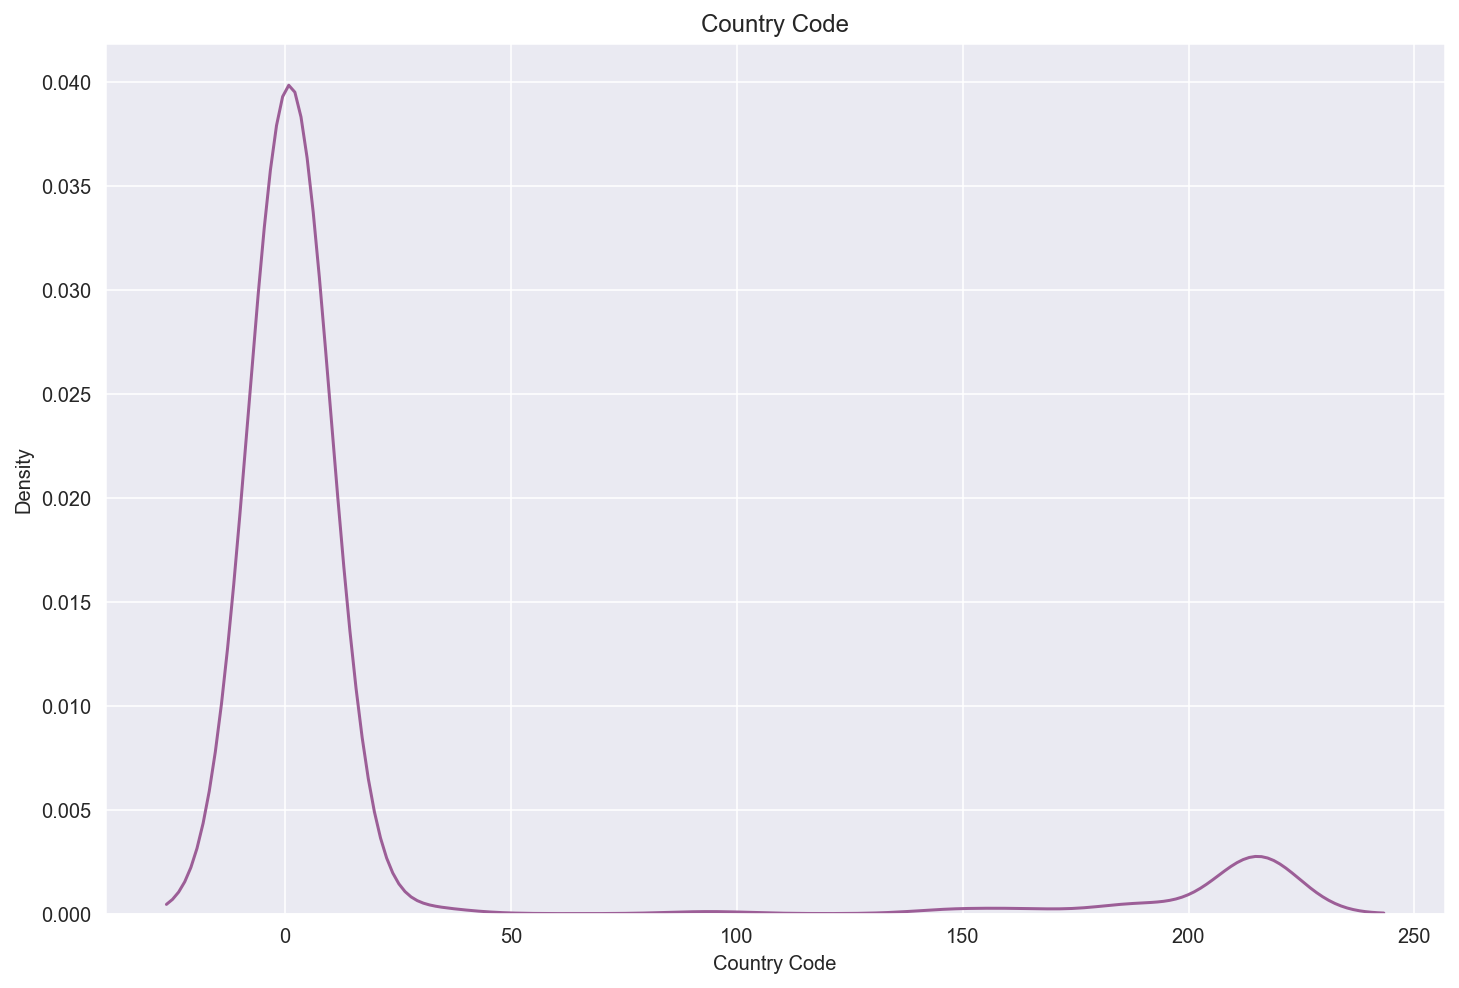

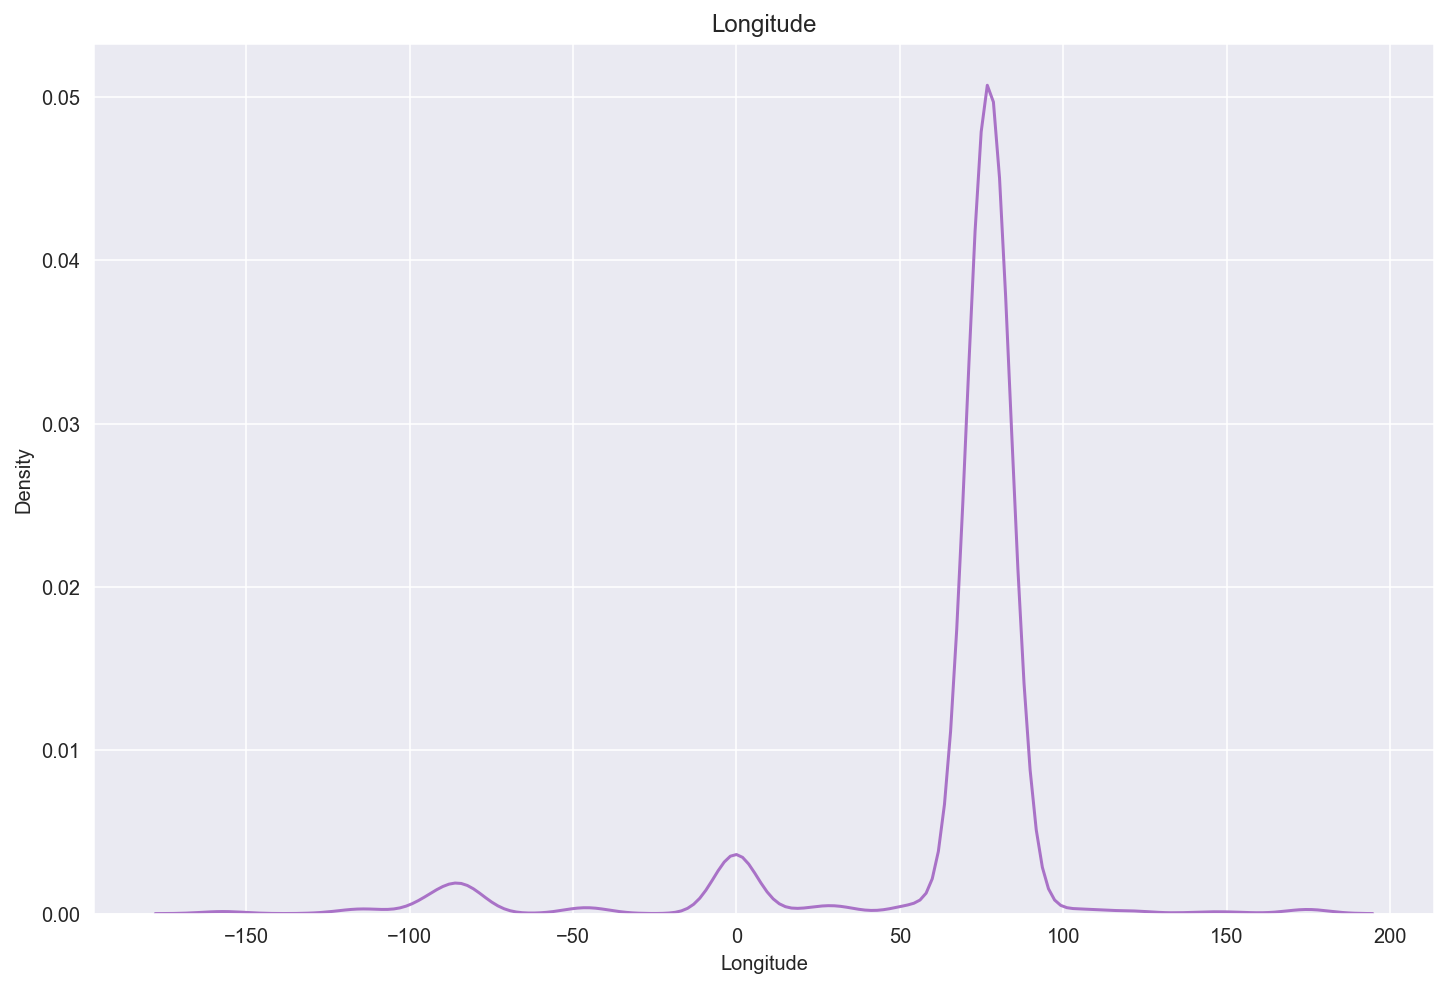

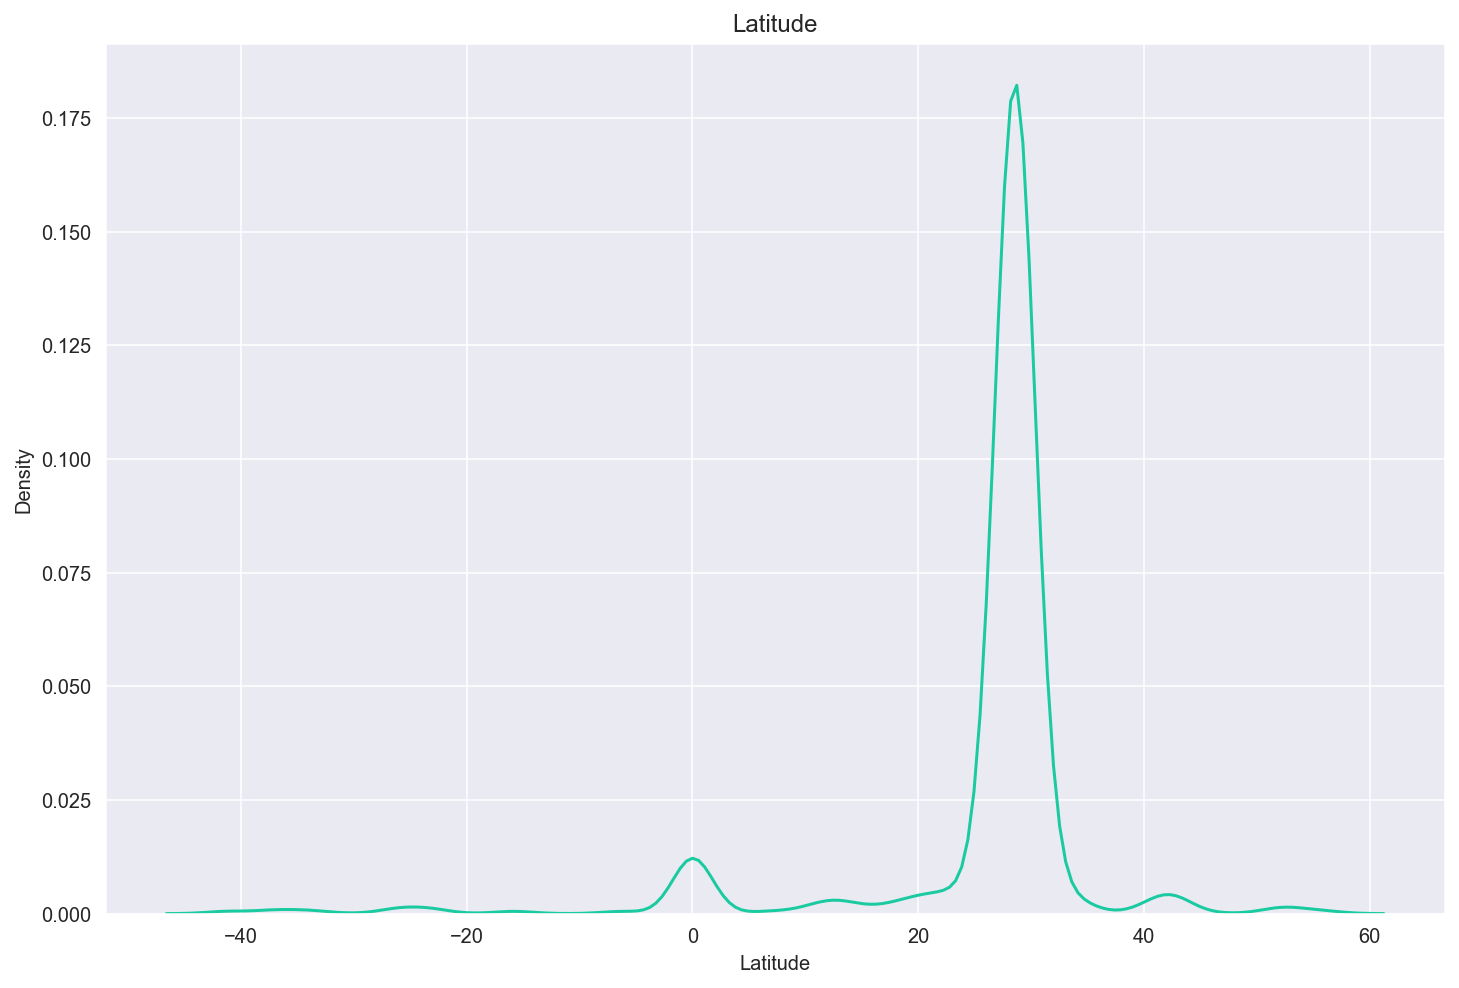

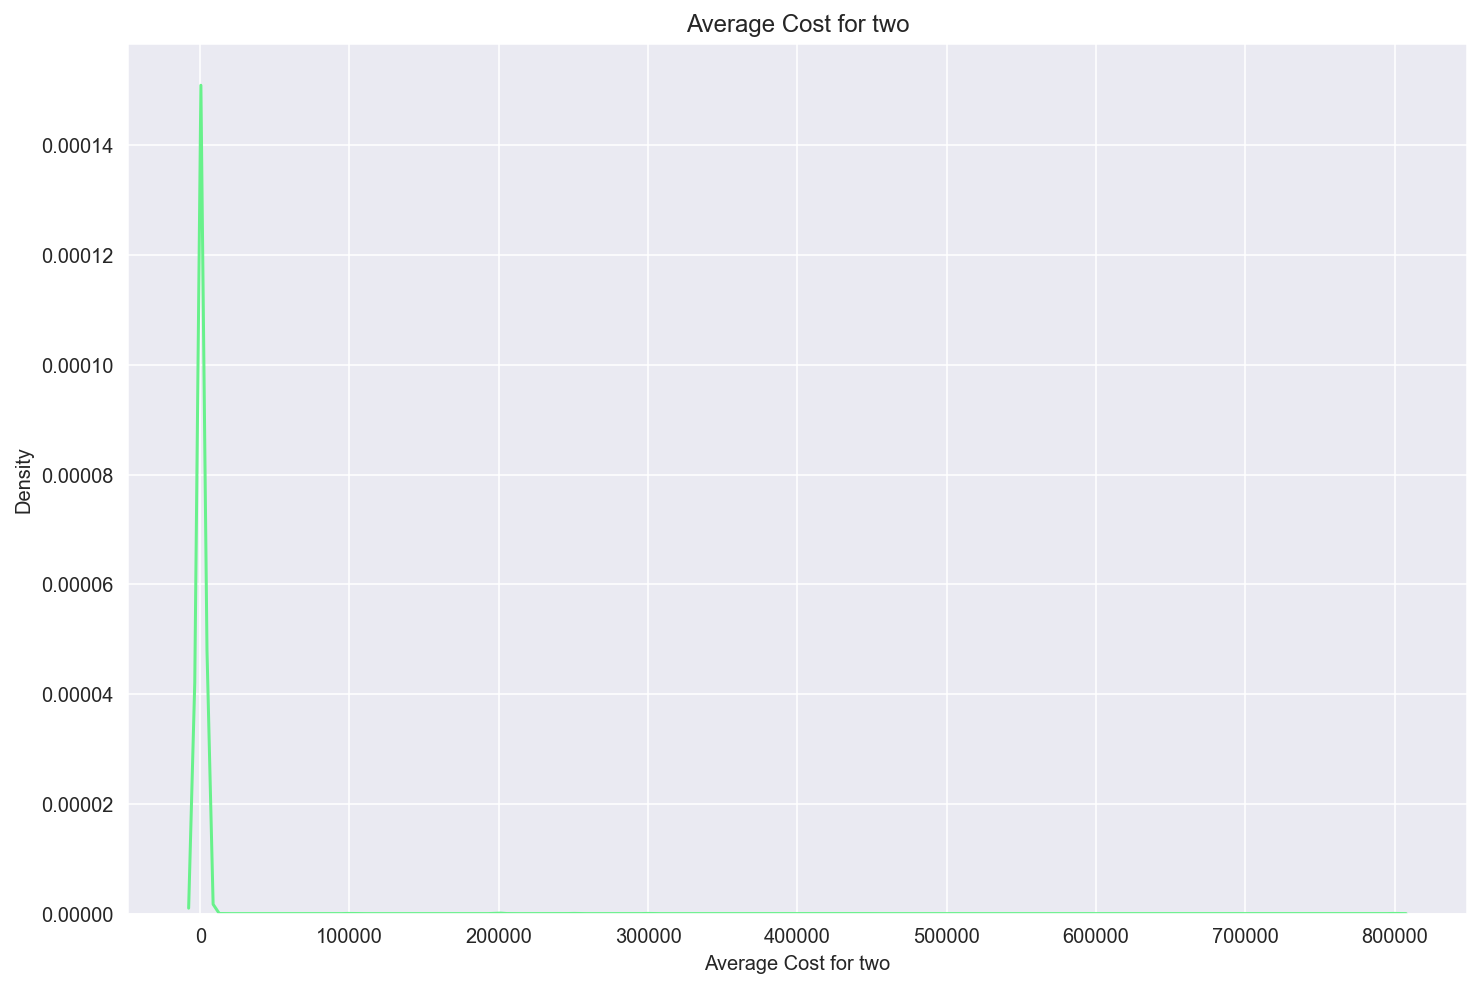

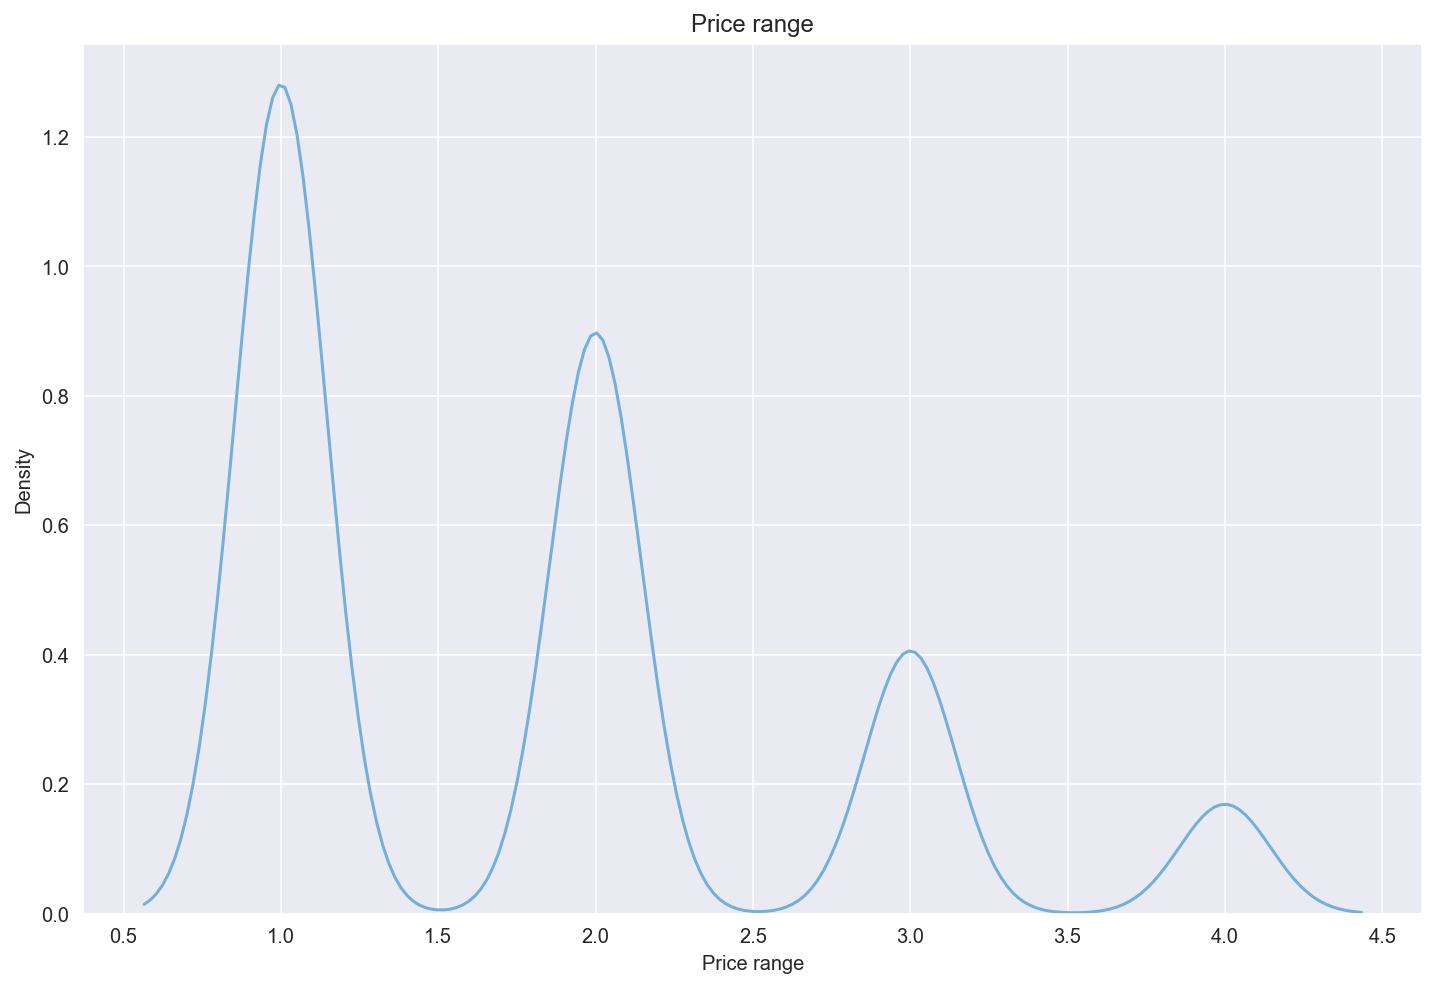

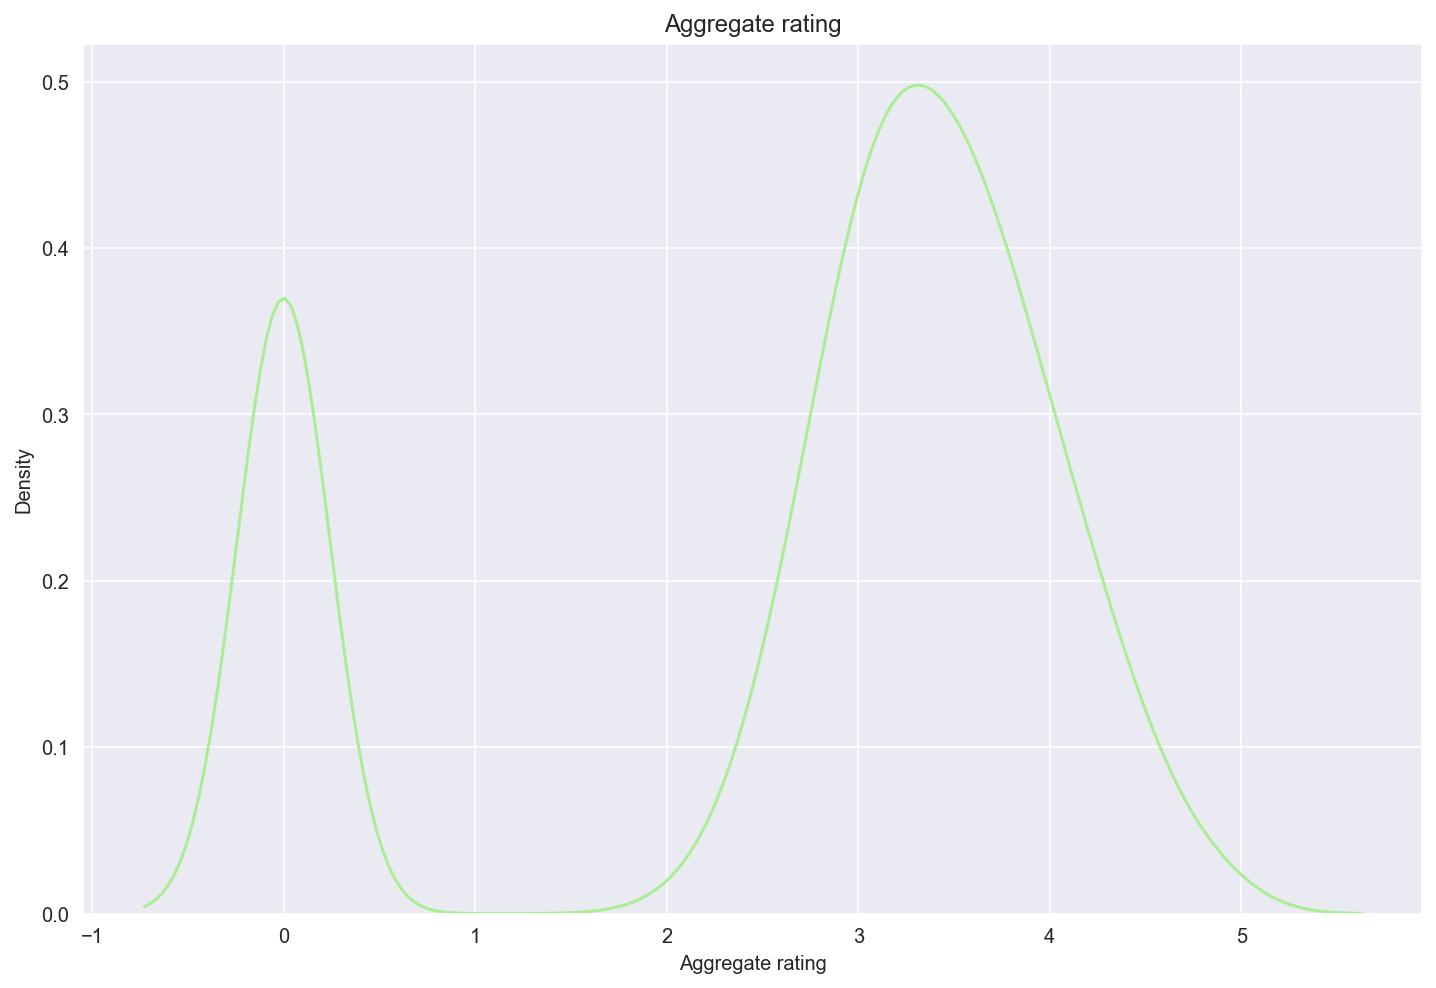

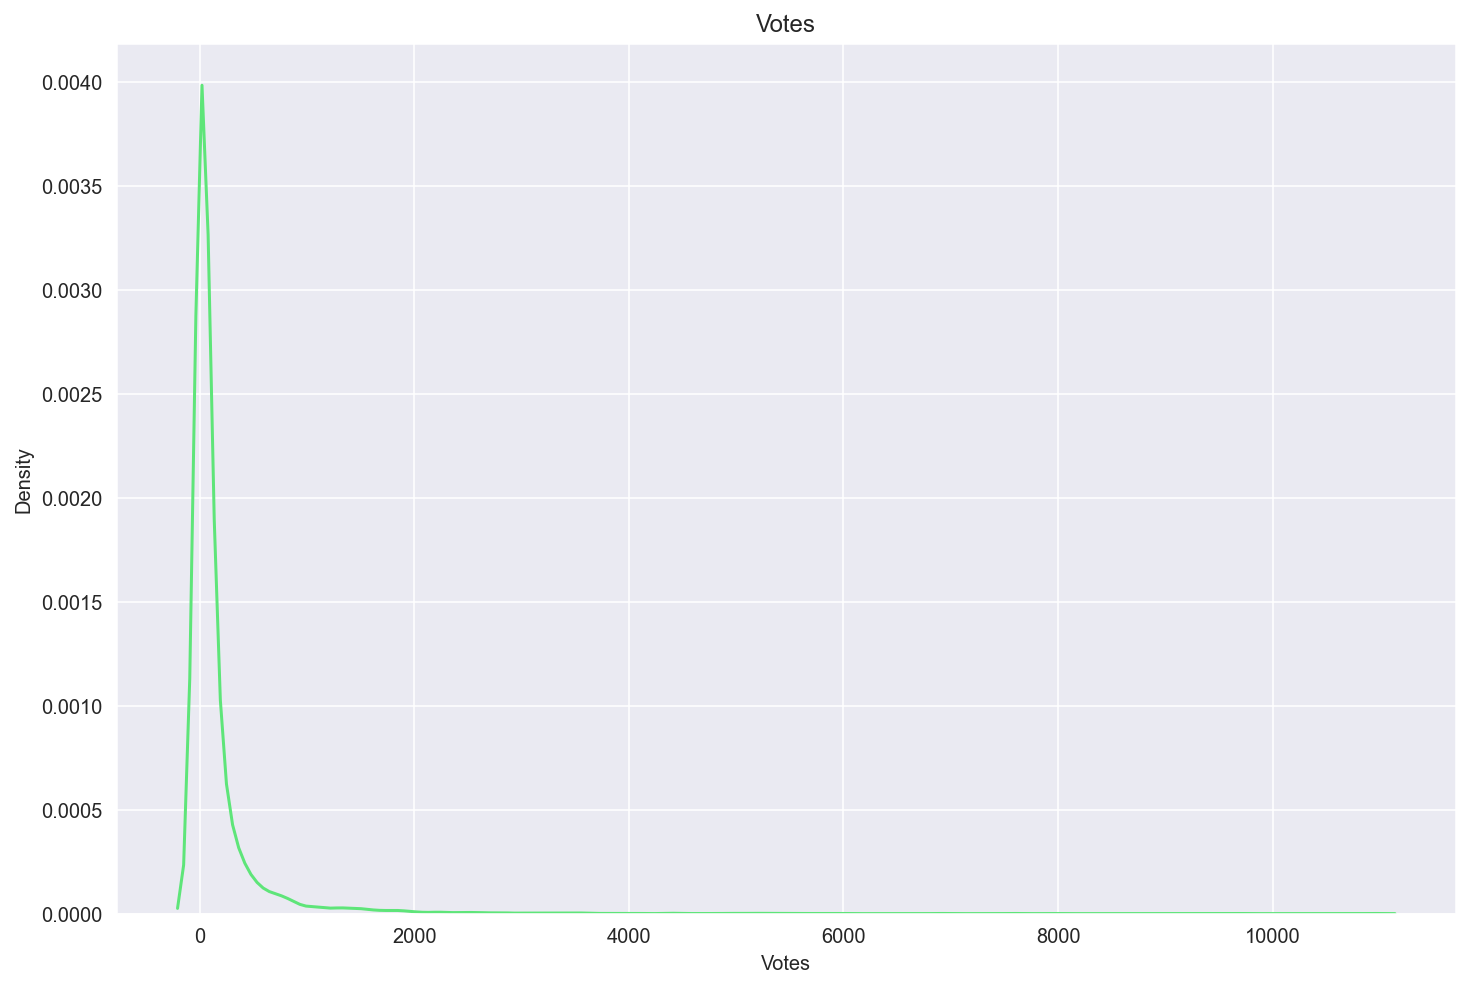

In [57]:
for i in df_num:
    plt.figure(figsize=(12,8))
    sns.kdeplot(df[i], color = rand_color()).set(title = i)

In [58]:
# Skewness of Numerical Variables
df_num.skew()

Restaurant ID            0.061570
Country Code             3.043965
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

In [59]:
# Kurtosis of Numerical Variables

df_num.kurtosis()

Restaurant ID             -1.950996
Country Code               7.392578
Longitude                  8.216586
Latitude                  12.530803
Average Cost for two    1495.777394
Price range               -0.142550
Aggregate rating          -0.582217
Votes                    128.225969
dtype: float64

### Variance/ Standard Deviation

In [60]:
df.var()

Restaurant ID           7.729085e+13
Country Code            3.220624e+03
Longitude               1.719517e+03
Latitude                1.211746e+02
Average Cost for two    2.598925e+08
Price range             8.201274e-01
Aggregate rating        2.299401e+00
Votes                   1.850455e+05
dtype: float64

In [61]:
df.std()

Restaurant ID           8.791521e+06
Country Code            5.675055e+01
Longitude               4.146706e+01
Latitude                1.100794e+01
Average Cost for two    1.612118e+04
Price range             9.056088e-01
Aggregate rating        1.516378e+00
Votes                   4.301691e+02
dtype: float64

- It is a part of feature selection to drop those featuress who have zero-variance or near zero-variance as these features 
 will give no information.
- In this section,variables with zero and near-zero variance are being identified using scikit learn Libraray.

- 1. Feature Selection Method : Varaiance Threshold to remove the constant features
- 2. Feature SElection Method: Varaiance Threshold to remove the Quasi-constant features

In [132]:
df_num

Restaurant ID  Country Code   Longitude   Latitude  \
0           6317637           162  121.027535  14.565443   
1           6304287           162  121.014101  14.553708   
2           6300002           162  121.056831  14.581404   
3           6318506           162  121.056475  14.585318   
4           6314302           162  121.057508  14.584450   
...             ...           ...         ...        ...   
9546        5915730           208   28.977392  41.022793   
9547        5908749           208   29.041297  41.009847   
9548        5915807           208   29.034640  41.055817   
9549        5916112           208   29.036019  41.057979   
9550        5927402           208   29.026016  40.984776   

      Average Cost for two  Price range  Aggregate rating  Votes  
0                     1100            3               4.8    314  
1                     1200            3               4.5    591  
2                     4000            4               4.4    270  
3                     1500            4               4.9    365  
4                     1500            4               4.8    229  
...                    ...          ...               ...    ...  
9546                    80            3               4.1    788  
9547                   105            3               4.2   1034  
9548                   170            4               3.7    661  
9549                   120            4               4.0    901  
9550                    55            2               4.0    591  

[9551 rows x 8 columns]

# Constant Features

In [133]:
# # 1. Feature Selection Method : Varaiance Threshold to remove the constant features

# Those features which contain constant values (only one value for all the outputs or target values) in the dataset.
# Those features provide no information that allows ML Models to predict the target.
# threshold=0

# Let's apply ThresholdVariance

from sklearn.feature_selection import VarianceThreshold

In [134]:
constant_selector=VarianceThreshold(threshold=0)
constant_selector.fit(df_num)

VarianceThreshold(threshold=0)

In [135]:
# # True means non-constant features
# False means constant features
# There are total 8 numerical features. Out of which none is constant feature.


constant_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [136]:
# Sum of non-constant features

sum(constant_selector.get_support())

8

In [137]:
# Now, Let's find constant features which is none (from above)

constant_columns=[column for column in df_num.columns
                 if column not in df_num.columns[constant_selector.get_support()]]
print(len(constant_columns))


# Note: As was predicted, there are no constant features

0


In [138]:
# List of Constant features

for column in constant_columns:
    print(column)

In [ ]:
# Dropping of Constant features, which is beyond the scope of this EDA
# df_num.drop(constant_columns,axis=1,inplace =True)

# Quasi-Constant Features

In [139]:
#2. Feature Selection Method: Variance Threshold to remove the Quasi-Constantn Features.

quasi_constant_selector=VarianceThreshold(threshold=0.01)
quasi_constant_selector.fit(df_num)

VarianceThreshold(threshold=0.01)

In [140]:
# Get features which have the variance greater than the set threshold value=0.01

quasi_constant_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [141]:
# sum of non-quasi constant feature


sum(quasi_constant_selector.get_support())

8

In [142]:
# Now, Let's find constant features which is none (from above)

quasi_constant_columns=[column for column in df_num.columns
                 if column not in df_num.columns[quasi_constant_selector.get_support()]]
print(len(quasi_constant_columns))


# Note: As was predicted, there are no constant features

0


In [143]:
# List of Quasi Constant features

for column in quasi_constant_columns:
    print(column)

In [ ]:
# Dropping of Quasi Constant features, which is beyond the scope of this EDA
# df_num.drop(quasi_constant_columns,axis=1,inplace =True)

# Missing Values

In [217]:
# Missing Values

df.isnull().sum().sort_values(ascending=False)
df.isna().sum().sort_values(ascending=False)

# Note: Both yield same output

Cuisines                9
Restaurant ID           0
Has Table booking       0
Votes                   0
Rating text             0
Rating color            0
Aggregate rating        0
Price range             0
Switch to order menu    0
Is delivering now       0
Has Online delivery     0
Currency                0
Restaurant Name         0
Average Cost for two    0
Latitude                0
Longitude               0
Locality Verbose        0
Locality                0
Address                 0
City                    0
Country Code            0
Country                 0
dtype: int64

In [218]:
# Total Missing Values in a DataFrame

df.isnull().sum().sum()

9

In [219]:
# Column-wise Missing Values in relative form

percent_missing=(df.isnull().mean().sort_values(ascending=False)*100).round(2)
percent_missing

Cuisines                0.09
Restaurant ID           0.00
Has Table booking       0.00
Votes                   0.00
Rating text             0.00
Rating color            0.00
Aggregate rating        0.00
Price range             0.00
Switch to order menu    0.00
Is delivering now       0.00
Has Online delivery     0.00
Currency                0.00
Restaurant Name         0.00
Average Cost for two    0.00
Latitude                0.00
Longitude               0.00
Locality Verbose        0.00
Locality                0.00
Address                 0.00
City                    0.00
Country Code            0.00
Country                 0.00
dtype: float64

In [220]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

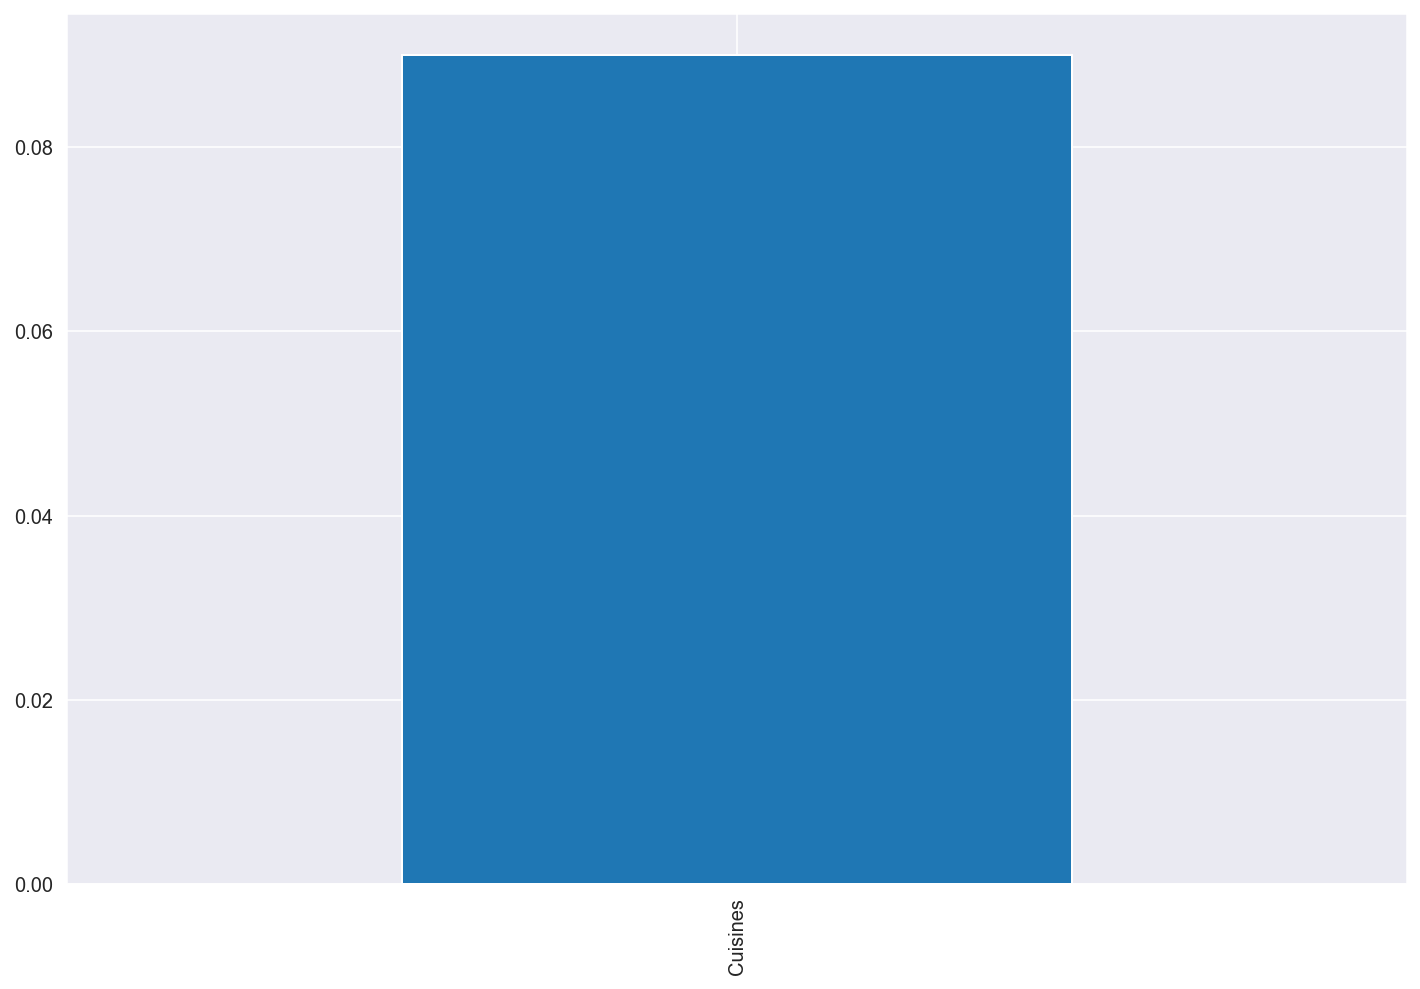

In [221]:
# Bar Chart of Missing Values Column-wise in percentage form

percent_missing[percent_missing!=0].plot(kind='bar');

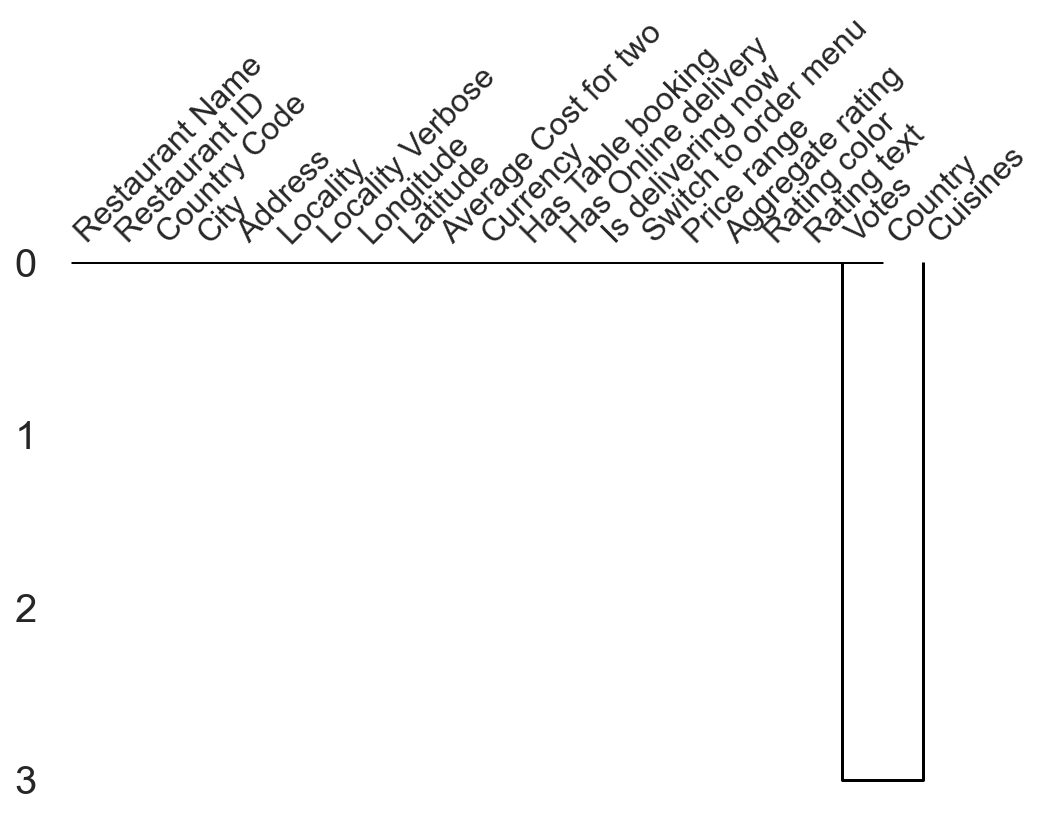

In [222]:
# Dendrogram of Missing Values

msno.dendrogram(df,figsize=(8,5));

<Figure size 72x72 with 0 Axes>

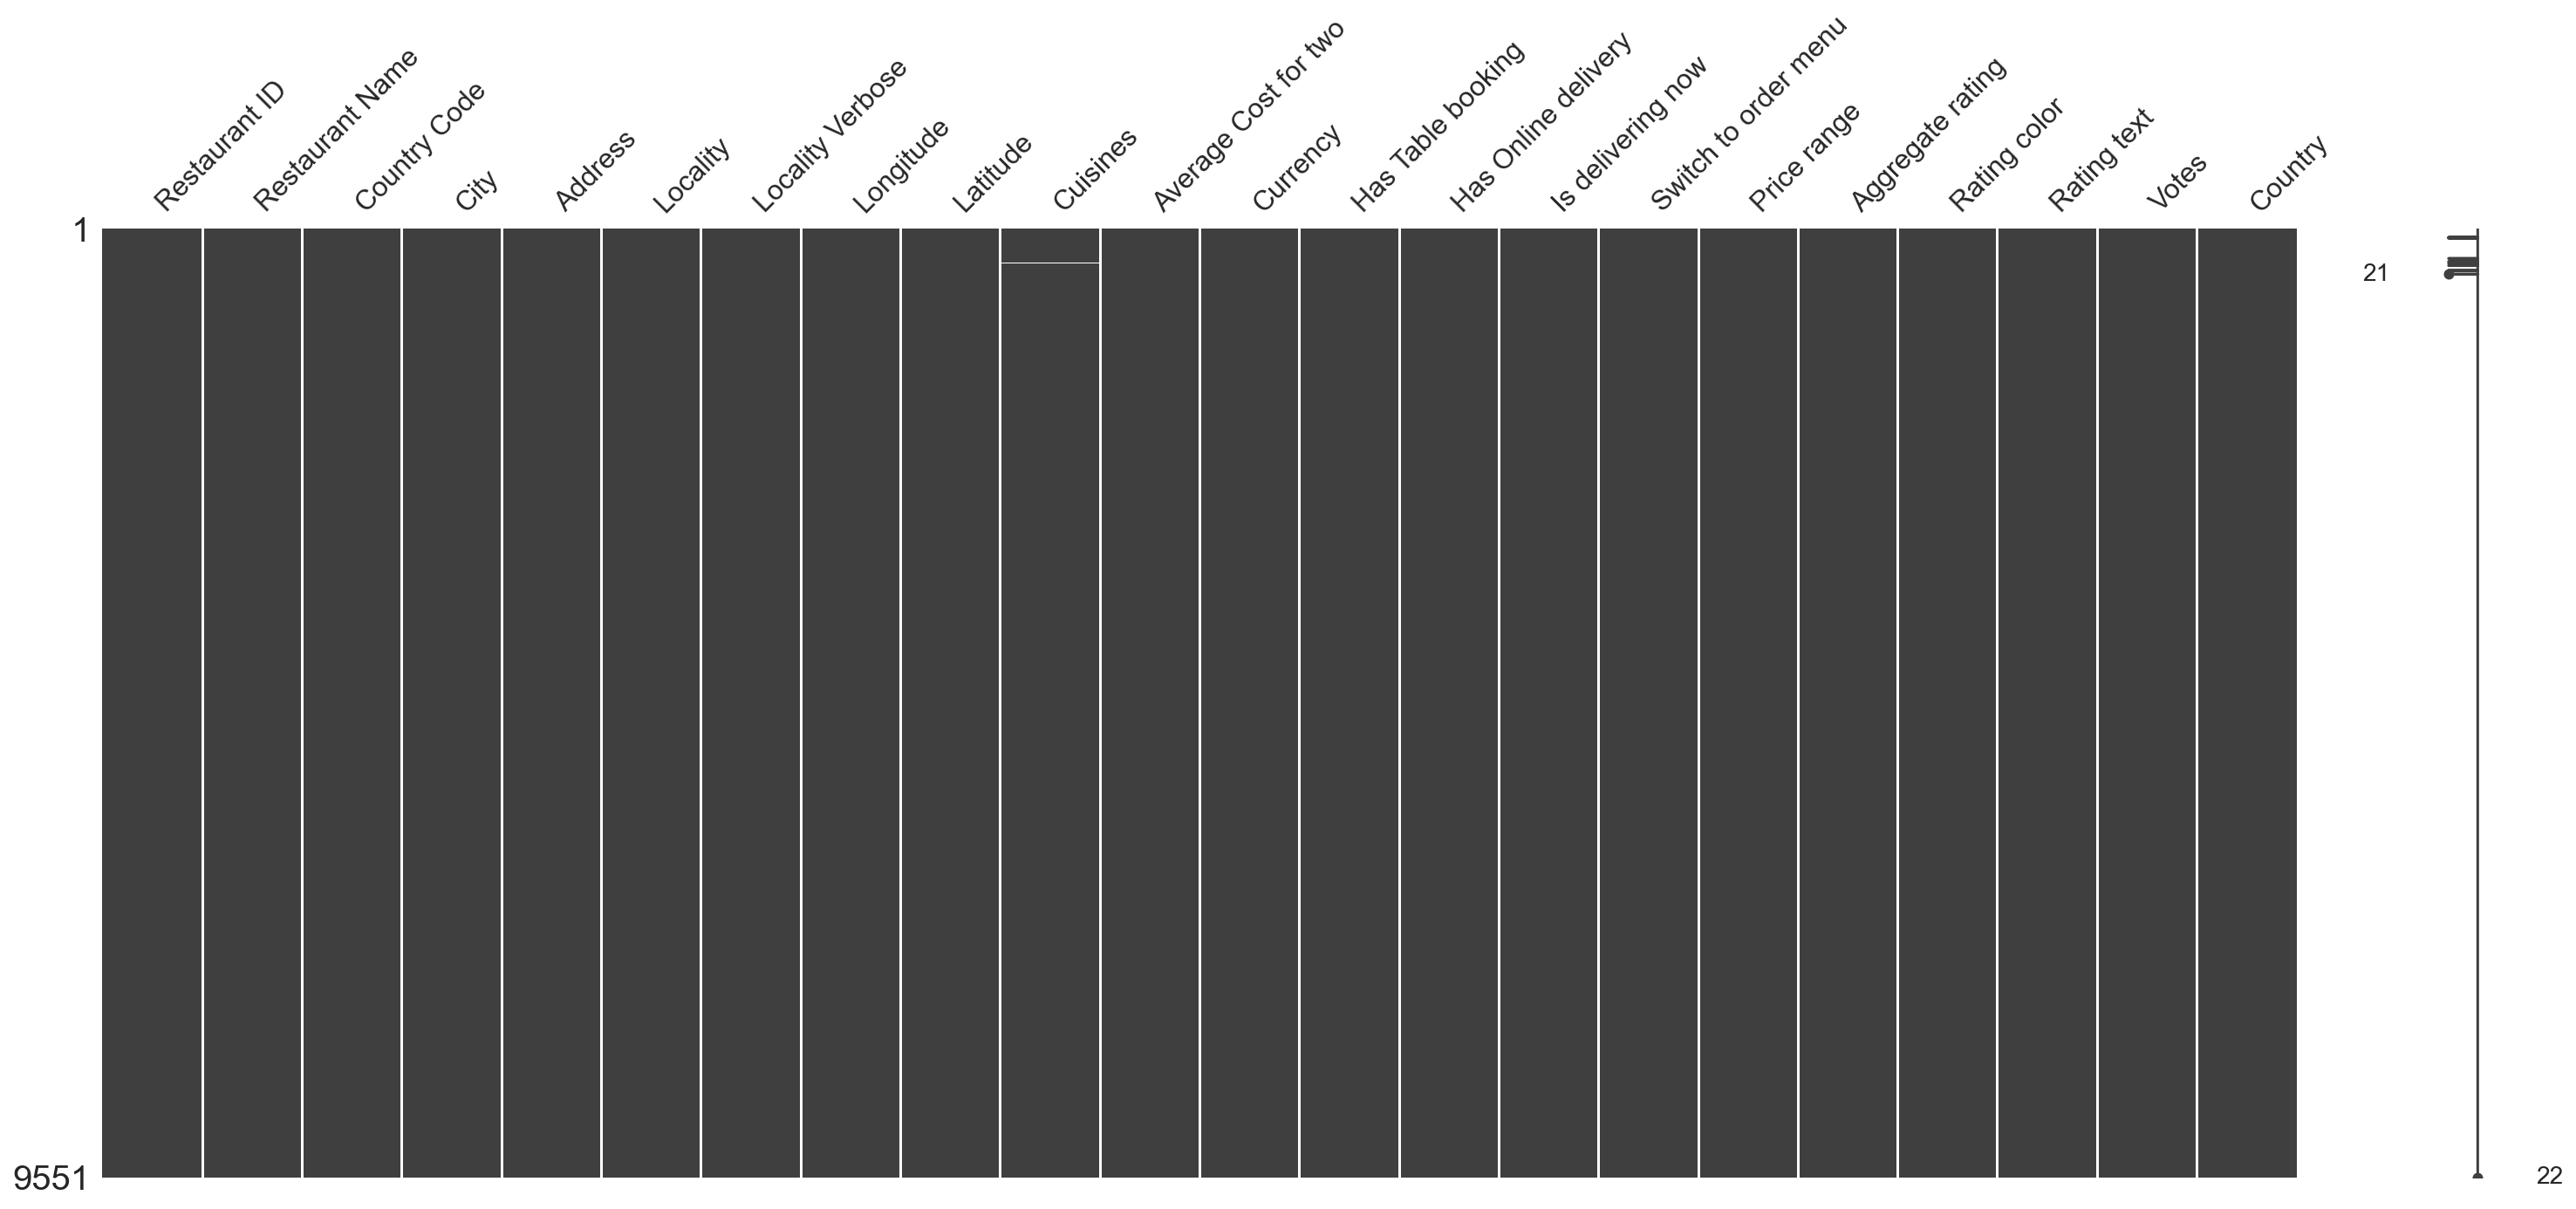

In [223]:
import missingno as msno
plt.figure(figsize=(1,1))
msno.matrix(df);

<Figure size 72x72 with 0 Axes>

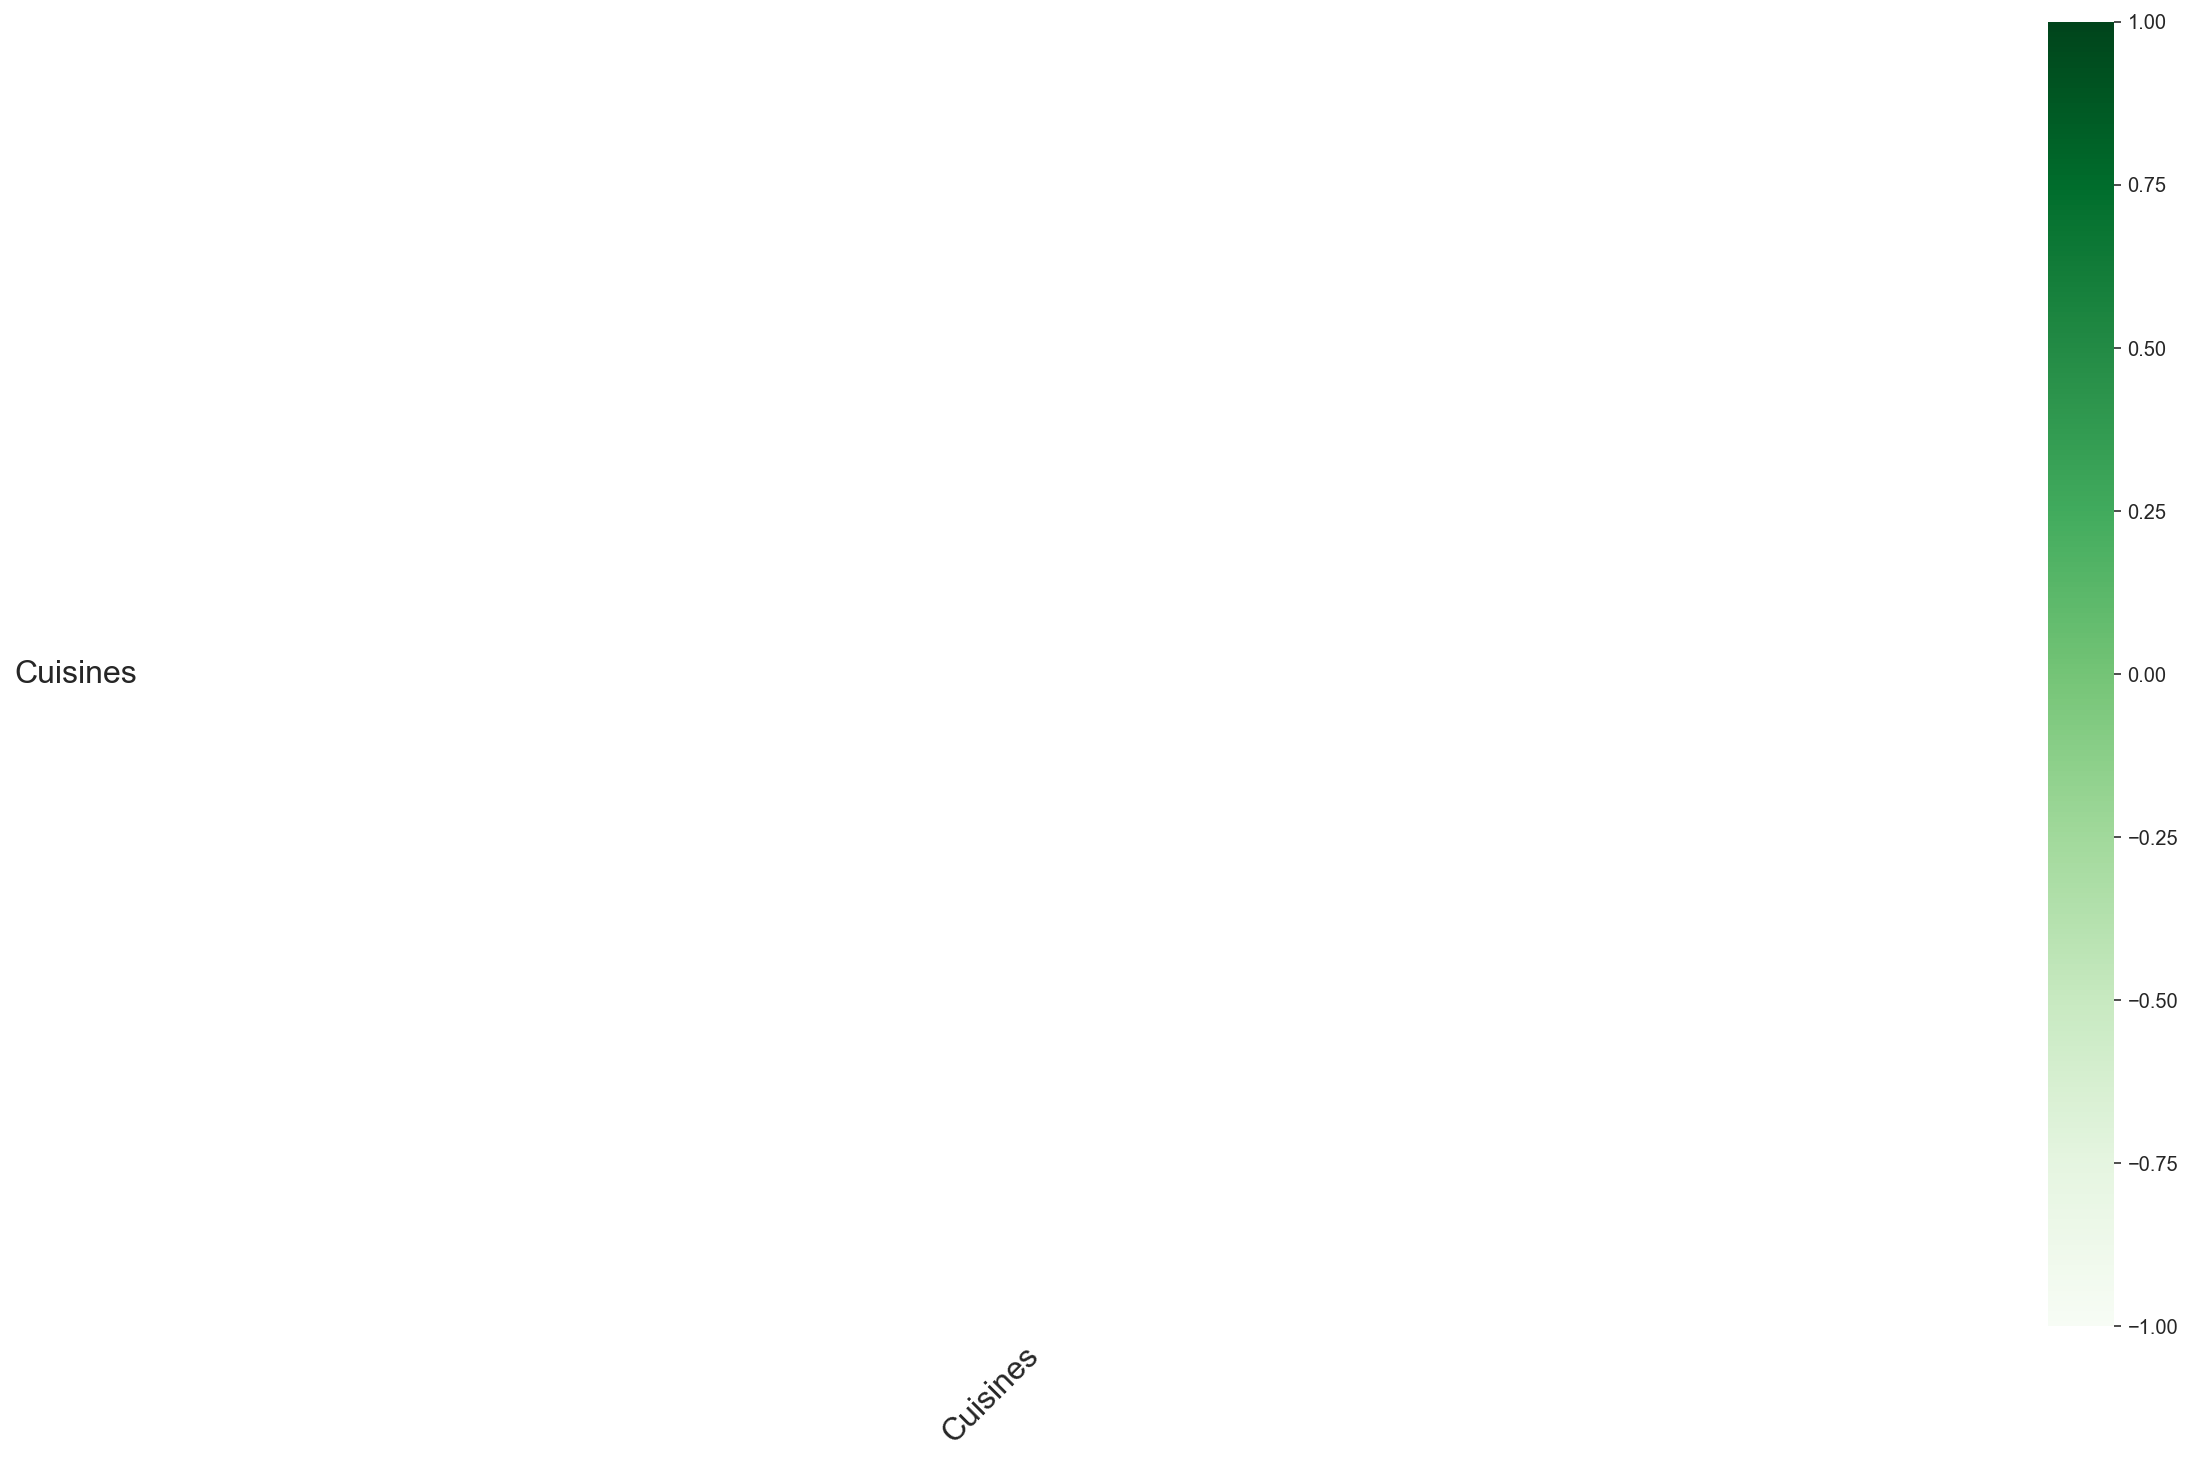

In [224]:
plt.figure(figsize=(1,1))
msno.heatmap(df,cmap='Greens');

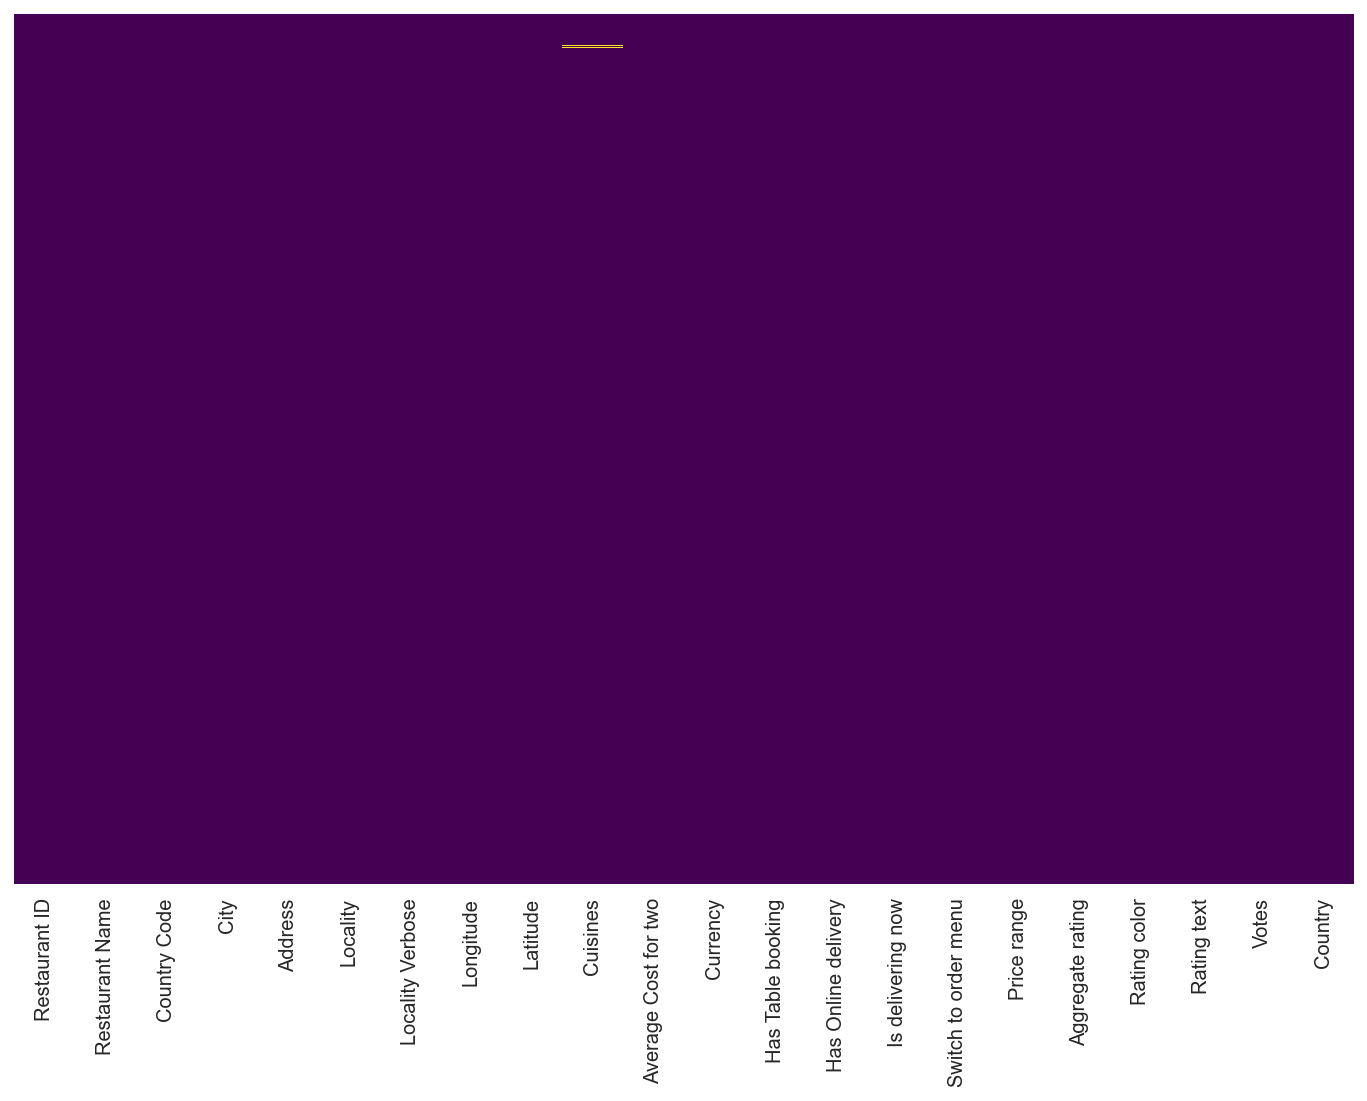

In [225]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

# Duplicated Rows

In [226]:
duplicate_rows=df[df.duplicated()]
print('Number of duplicated rows:',duplicate_rows.shape[0])

Number of duplicated rows: 0


# Outliers & Anomaliers

In [227]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

upper_limit=Q3 + 1.5 * IQR
lower_limit=Q1 - 1.5 * IQR
Outliers = df[((df <=lower_limit ) |(df >=upper_limit ))]
len(Outliers)

9551

In [228]:
for i in df_num:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit=Q3 + 1.5 * IQR
    lower_limit=Q1 - 1.5 * IQR
    Outliers = df[((df[i] <=lower_limit ) |(df[i] >=upper_limit ))]
    print(f'Total number of outliers in "{i}" are:', Outliers.shape[0])

Total number of outliers in "Restaurant ID" are: 0
Total number of outliers in "Country Code" are: 9551
Total number of outliers in "Longitude" are: 1953
Total number of outliers in "Latitude" are: 1982
Total number of outliers in "Average Cost for two" are: 853
Total number of outliers in "Price range" are: 586
Total number of outliers in "Aggregate rating" are: 2148
Total number of outliers in "Votes" are: 1128


# Bi-Variate & Multi-Variate Analysis

### Bi-Variate

- 1. Categorical-Categorical
- 2. Numerical-Numerical
- 3. Numerical-Categorical

### Multi-Variate

- 1. Numerical-Categorical-Categorical
- 2. Numerical-Categorical-Numerical

In [144]:
df_cat.columns.tolist()

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']

# Bi-Variate-(Categorical-Categorical)

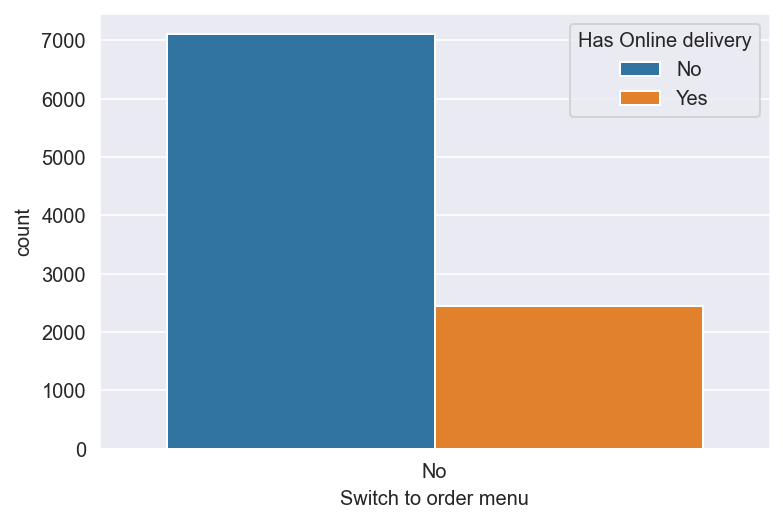

In [148]:
sns.countplot('Switch to order menu',hue='Has Online delivery',data=df);

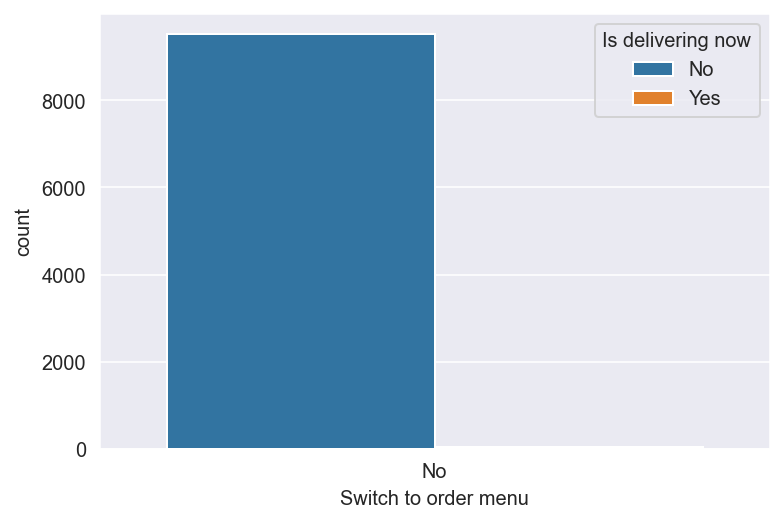

In [149]:
sns.countplot('Switch to order menu',hue='Is delivering now',data=df);

In [82]:
# Cross Tabulation in an absolute form

cross_index=pd.crosstab(index=df_cat['Has Table booking'],columns=df_cat['Has Online delivery'],normalize='index').round(4)*100
cross_index

Has Online delivery     No    Yes
Has Table booking                
No                   75.98  24.02
Yes                  62.44  37.56

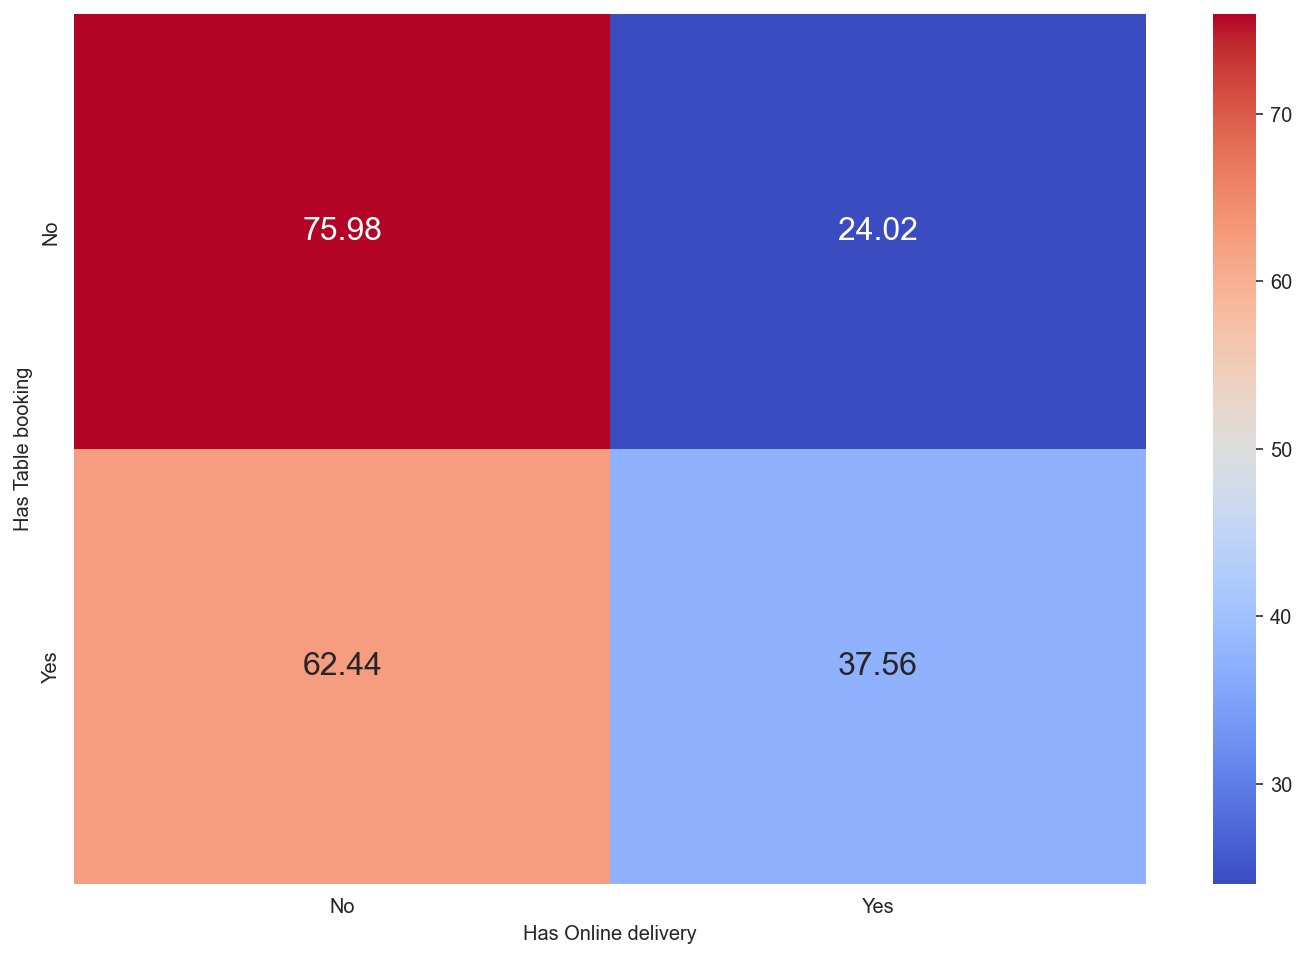

In [85]:
plt.figure(figsize=(12,8))
sns.heatmap(cross_index,cmap='coolwarm',annot=True,annot_kws={'size':16},fmt='0.2f');

In [88]:
cross_index=pd.crosstab(index=df_cat['Rating color'],columns=df_cat['Is delivering now'],normalize='index').round(4)*100
cross_index

Is delivering now      No   Yes
Rating color                   
Dark Green          99.67  0.33
Green              100.00  0.00
Orange              99.46  0.54
Red                 99.46  0.54
White               99.95  0.05
Yellow              99.48  0.52

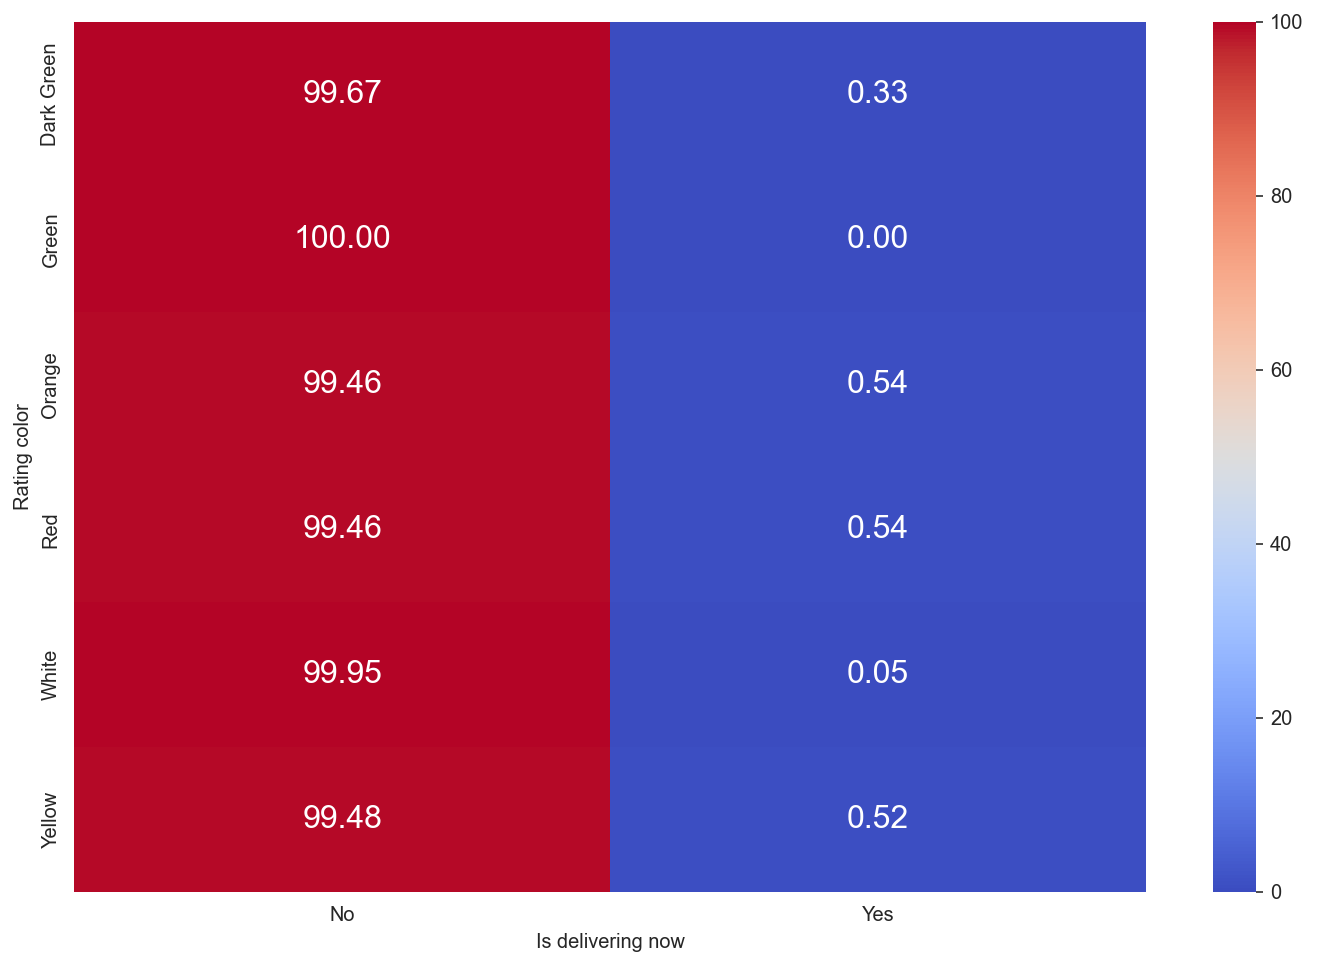

In [89]:
plt.figure(figsize=(12,8))
sns.heatmap(cross_index,cmap='coolwarm',annot=True,annot_kws={'size':16},fmt='0.2f');

In [92]:
cross_index=pd.crosstab(index=df_cat['Has Table booking'],columns=df_cat['Rating color'],normalize='index').round(4)*100
cross_index

Rating color       Dark Green  Green  Orange   Red  White  Yellow
Has Table booking                                                
No                       3.05   9.97   39.83  1.93  25.03   20.18
Yes                      3.89  20.90   34.02  2.07   4.06   35.06

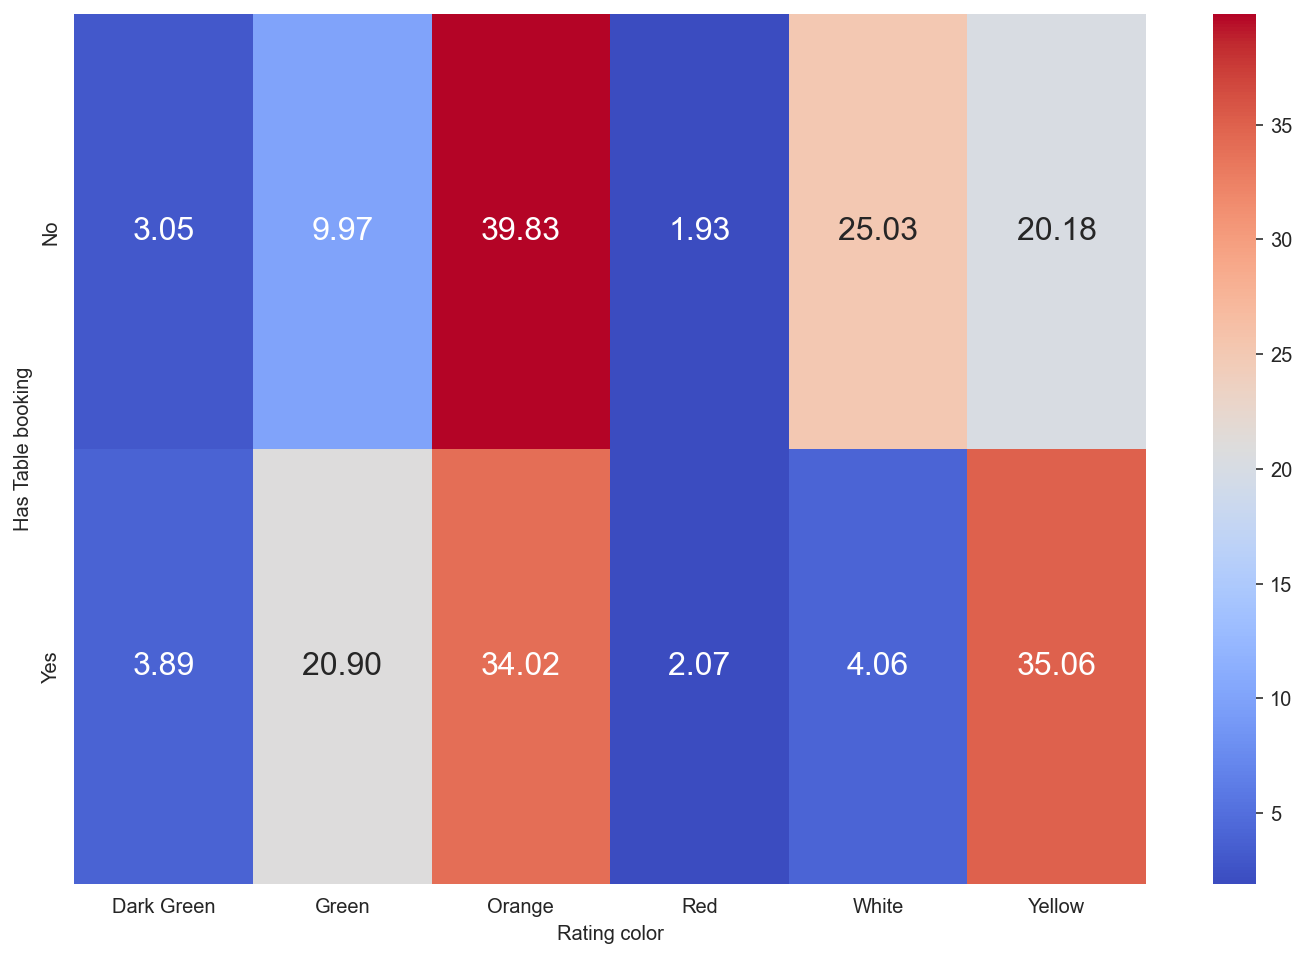

In [93]:
plt.figure(figsize=(12,8))
sns.heatmap(cross_index,cmap='coolwarm',annot=True,annot_kws={'size':16},fmt='0.2f');

# Bi- Variate- (Numerical-Numerical)

In [94]:
# Correlation Matrix

corr_matrix=df.corr(method='pearson')    # Other Methods: 'pearson', 'spearman', 'kendall'
corr_matrix
# corr_matrix.style.background_gradient(cmap='Greens')



# DataFrame.corrwith : compute pairwise correlation with another DataFrame or Series.

Restaurant ID  Country Code  Longitude  Latitude  \
Restaurant ID              1.000000      0.148471  -0.226081 -0.052081   
Country Code               0.148471      1.000000  -0.698299  0.019792   
Longitude                 -0.226081     -0.698299   1.000000  0.043207   
Latitude                  -0.052081      0.019792   0.043207  1.000000   
Average Cost for two      -0.001693      0.043225   0.045891 -0.111088   
Price range               -0.134540      0.243327  -0.078939 -0.166688   
Aggregate rating          -0.326212      0.282189  -0.116818  0.000516   
Votes                     -0.147023      0.154530  -0.085101 -0.022962   

                      Average Cost for two  Price range  Aggregate rating  \
Restaurant ID                    -0.001693    -0.134540         -0.326212   
Country Code                      0.043225     0.243327          0.282189   
Longitude                         0.045891    -0.078939         -0.116818   
Latitude                         -0.111088    -0.166688          0.000516   
Average Cost for two              1.000000     0.075083          0.051792   
Price range                       0.075083     1.000000          0.437944   
Aggregate rating                  0.051792     0.437944          1.000000   
Votes                             0.067783     0.309444          0.313691   

                         Votes  
Restaurant ID        -0.147023  
Country Code          0.154530  
Longitude            -0.085101  
Latitude             -0.022962  
Average Cost for two  0.067783  
Price range           0.309444  
Aggregate rating      0.313691  
Votes                 1.000000

In [95]:
# DataFrame.corrwith : Compute pairwise correlation with target and other predictor variables


df.corrwith(df['Votes'])

Restaurant ID          -0.147023
Country Code            0.154530
Longitude              -0.085101
Latitude               -0.022962
Average Cost for two    0.067783
Price range             0.309444
Aggregate rating        0.313691
Votes                   1.000000
dtype: float64

### Highly Correlated Features`

In [96]:
# with the following function we can select highly correlated features.
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:    # we are interested in abs coeff value
                colname=corr_matrix.columns[i]          # getting the name of column
                col_corr.add(colname)
    return col_corr
                

In [97]:
# correlation - filtering out highly correlated features based on threshold limit

corr_features=correlation(df,0.7)
len(set(corr_features))

0

In [98]:
corr_features

set()

In [ ]:
# dropping highly correlated variables
# df.drop(corr_features.axis=1)          # not dropping here since it is only EDA , it is the part of preprocessing and data cleaning

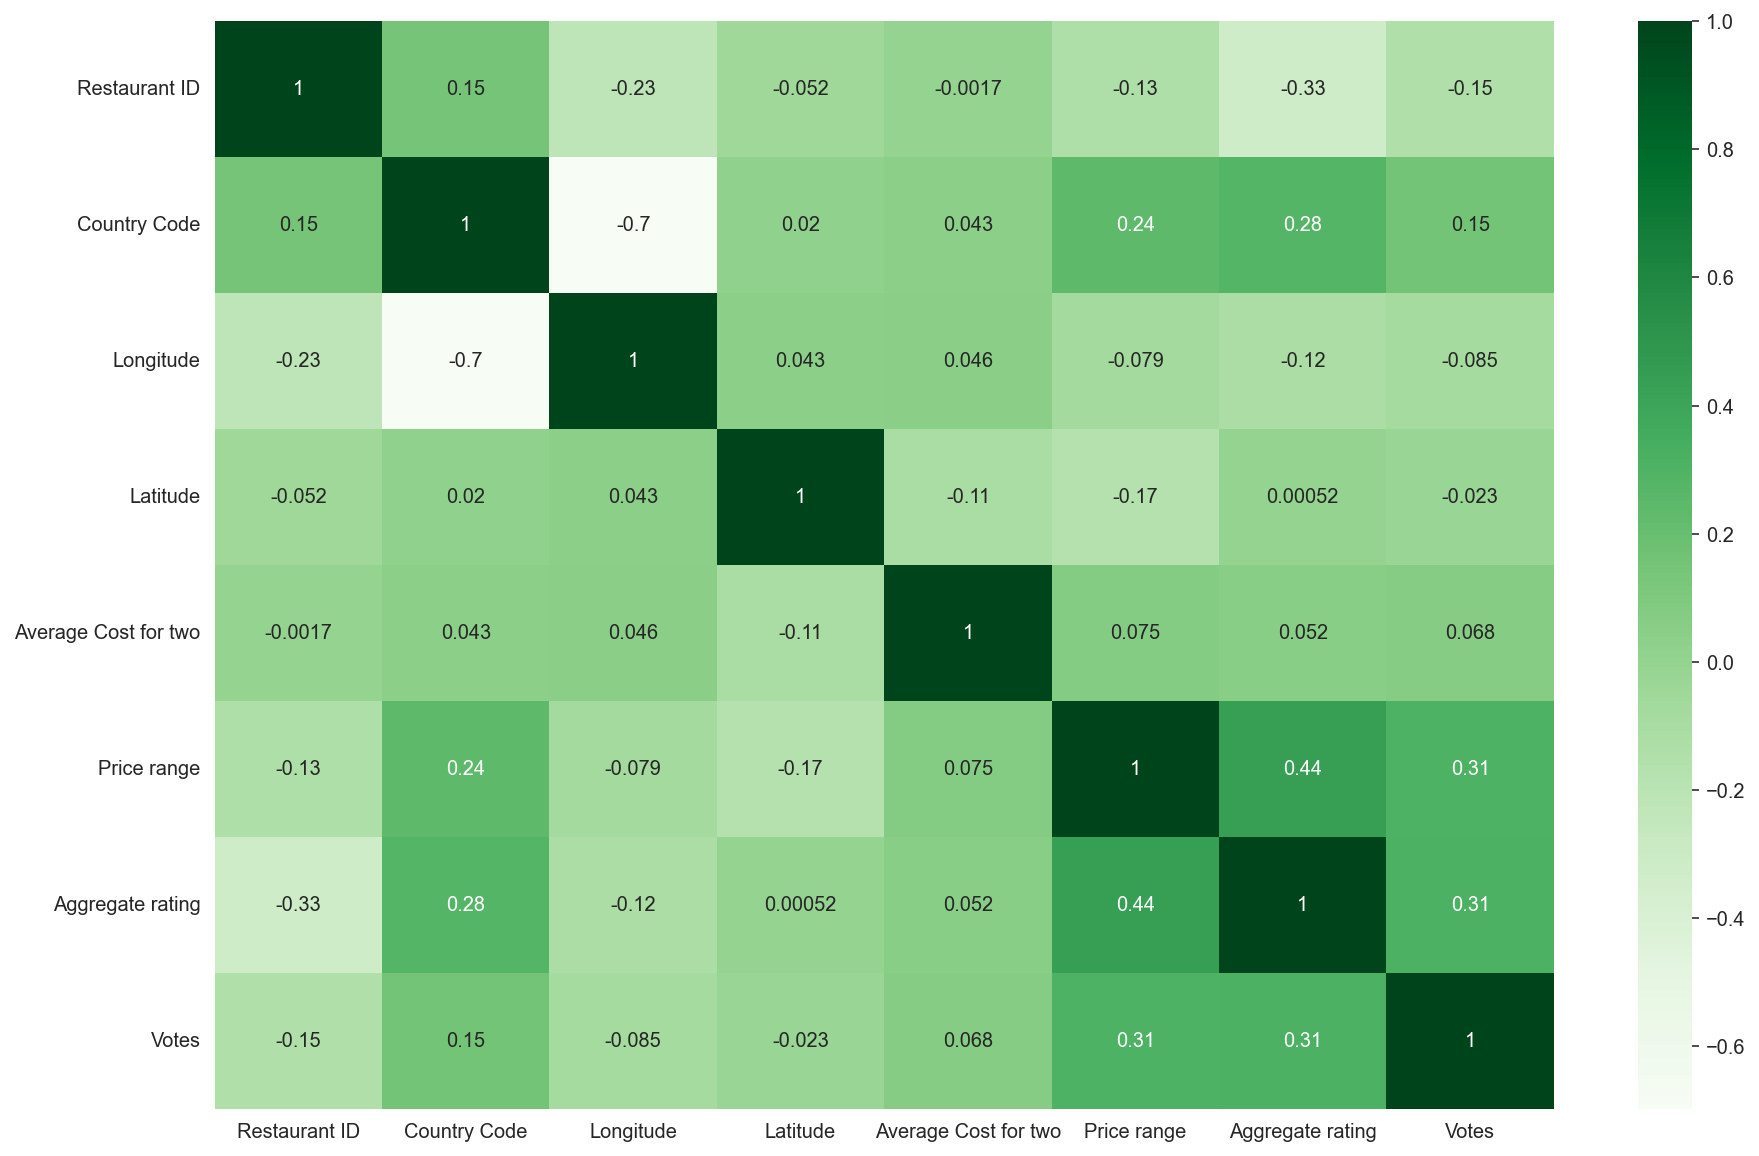

In [99]:
# correlation heatmap

plt.figure(figsize=(15,10))
cor=df.corr()
sns.heatmap(cor, annot=True, cmap='Greens');   

# Note:'
# 1. Since no of features are not very large, heatmap is readable. However, in case where feature are too many
# then sort the feature according to importance and then create heatmap by utilizing the function nlargest()'

### Visualization of Target Variable with other Numerical Variables

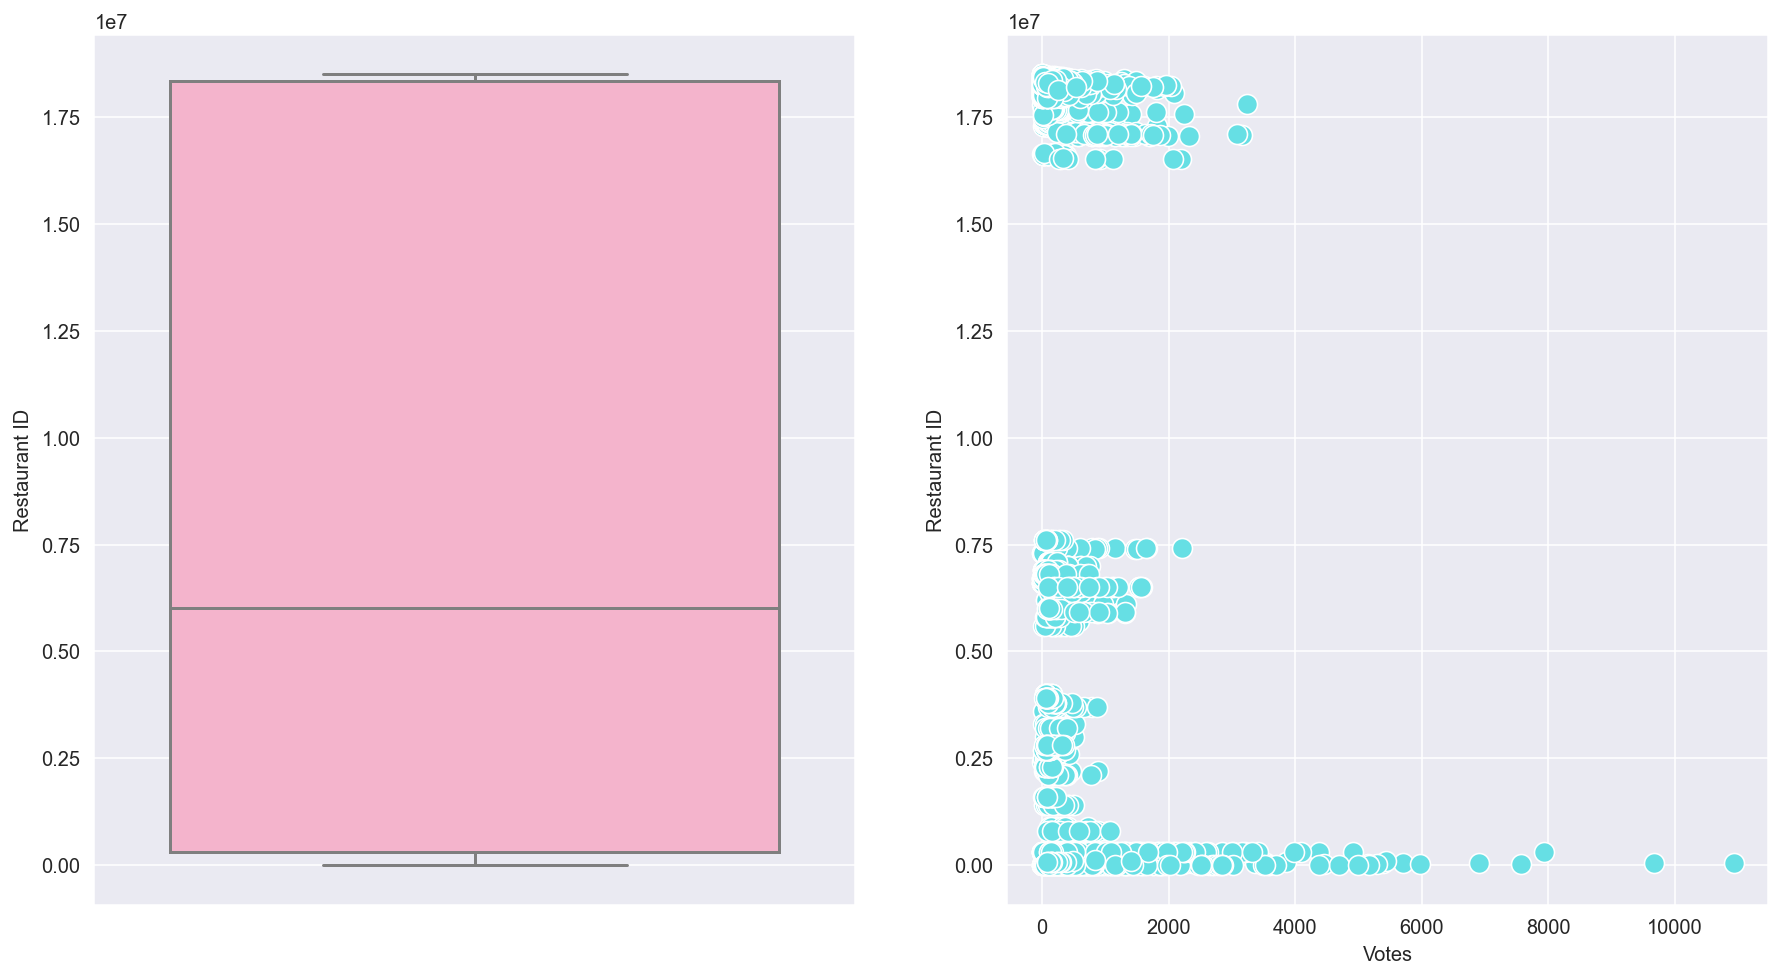

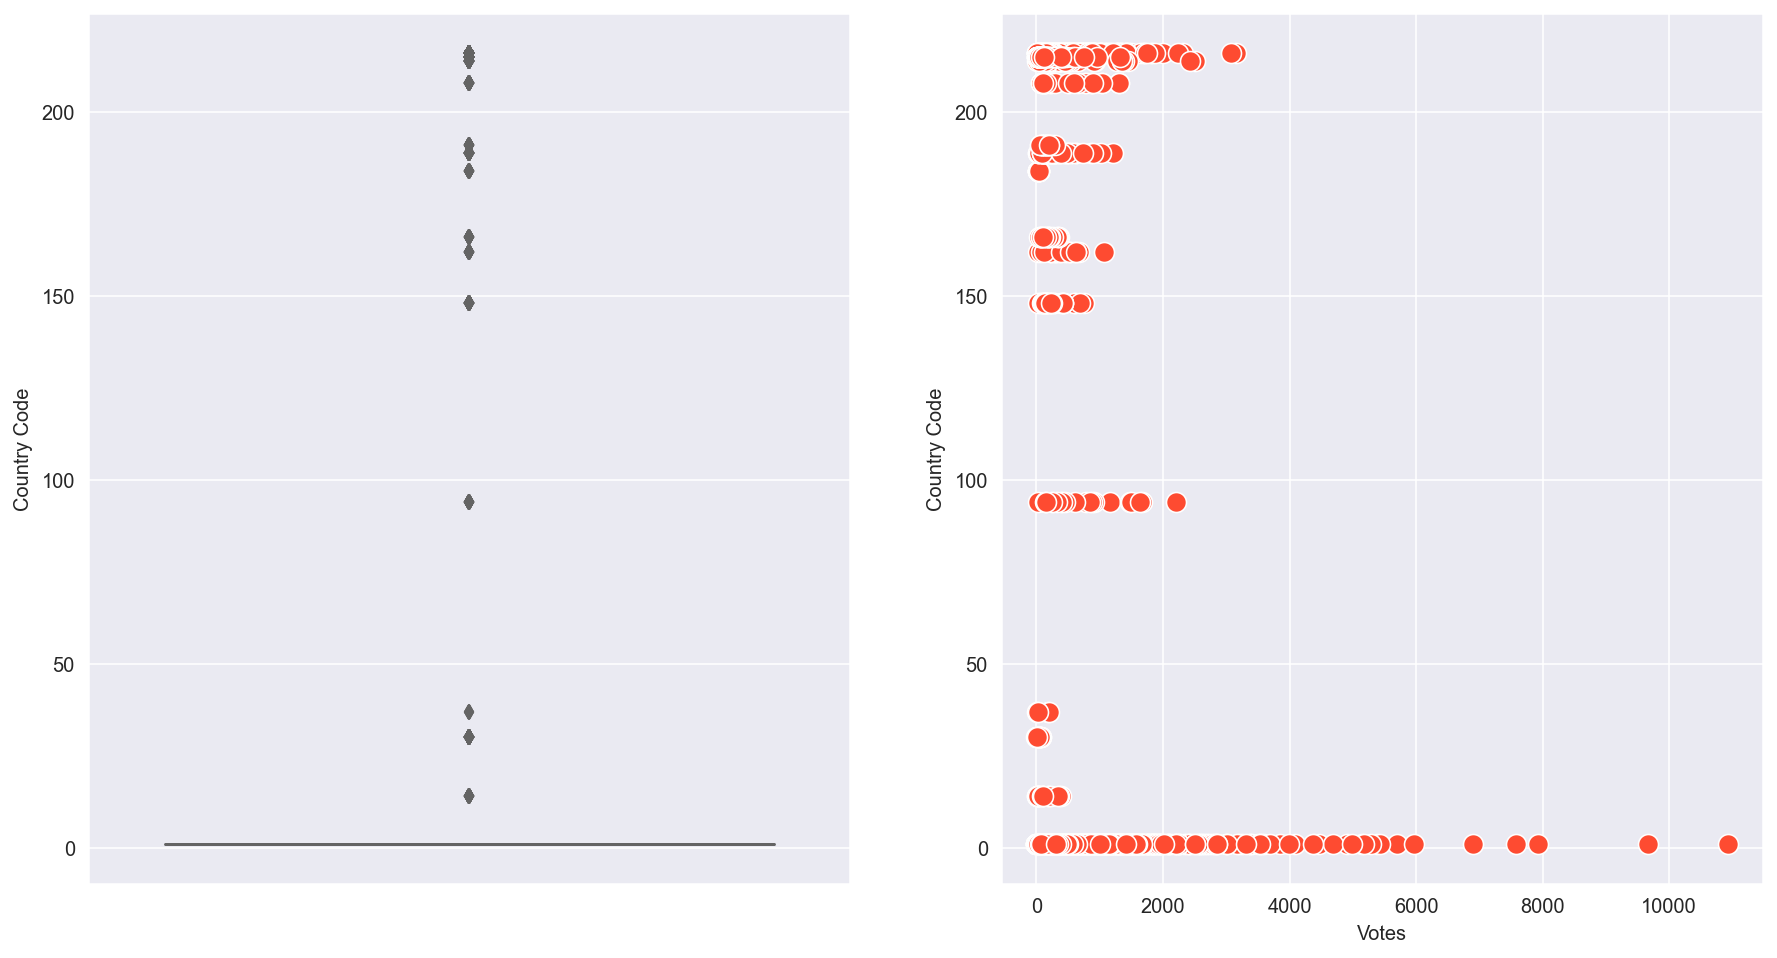

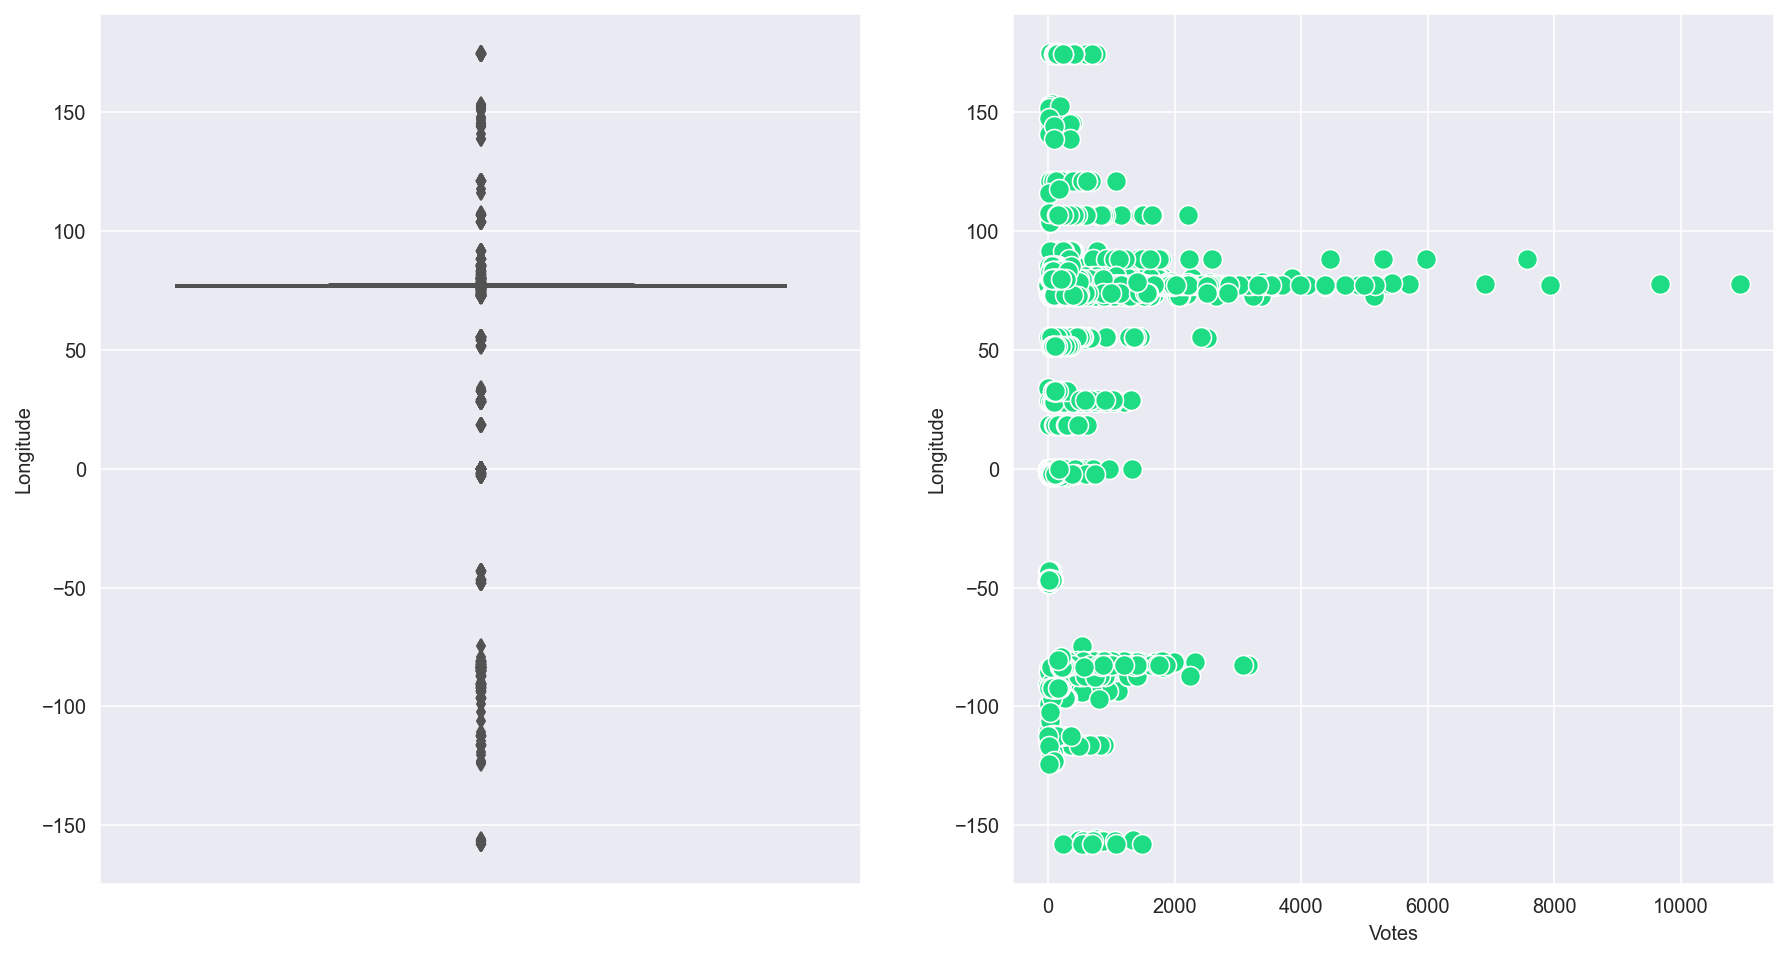

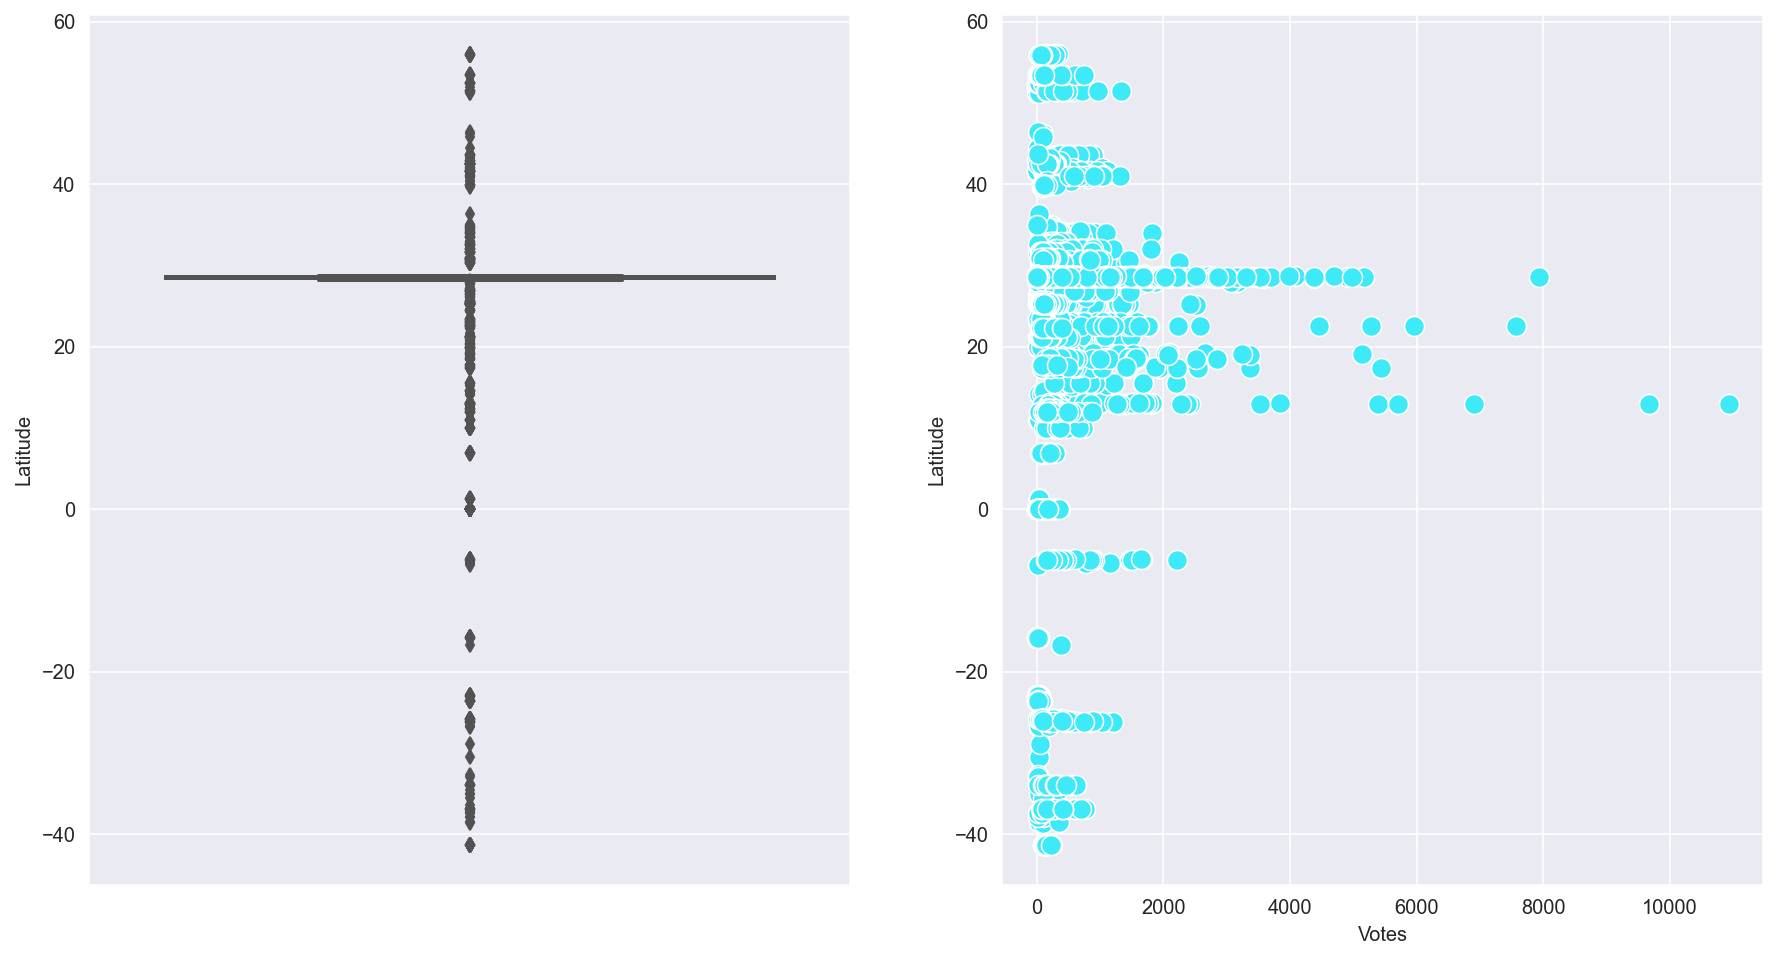

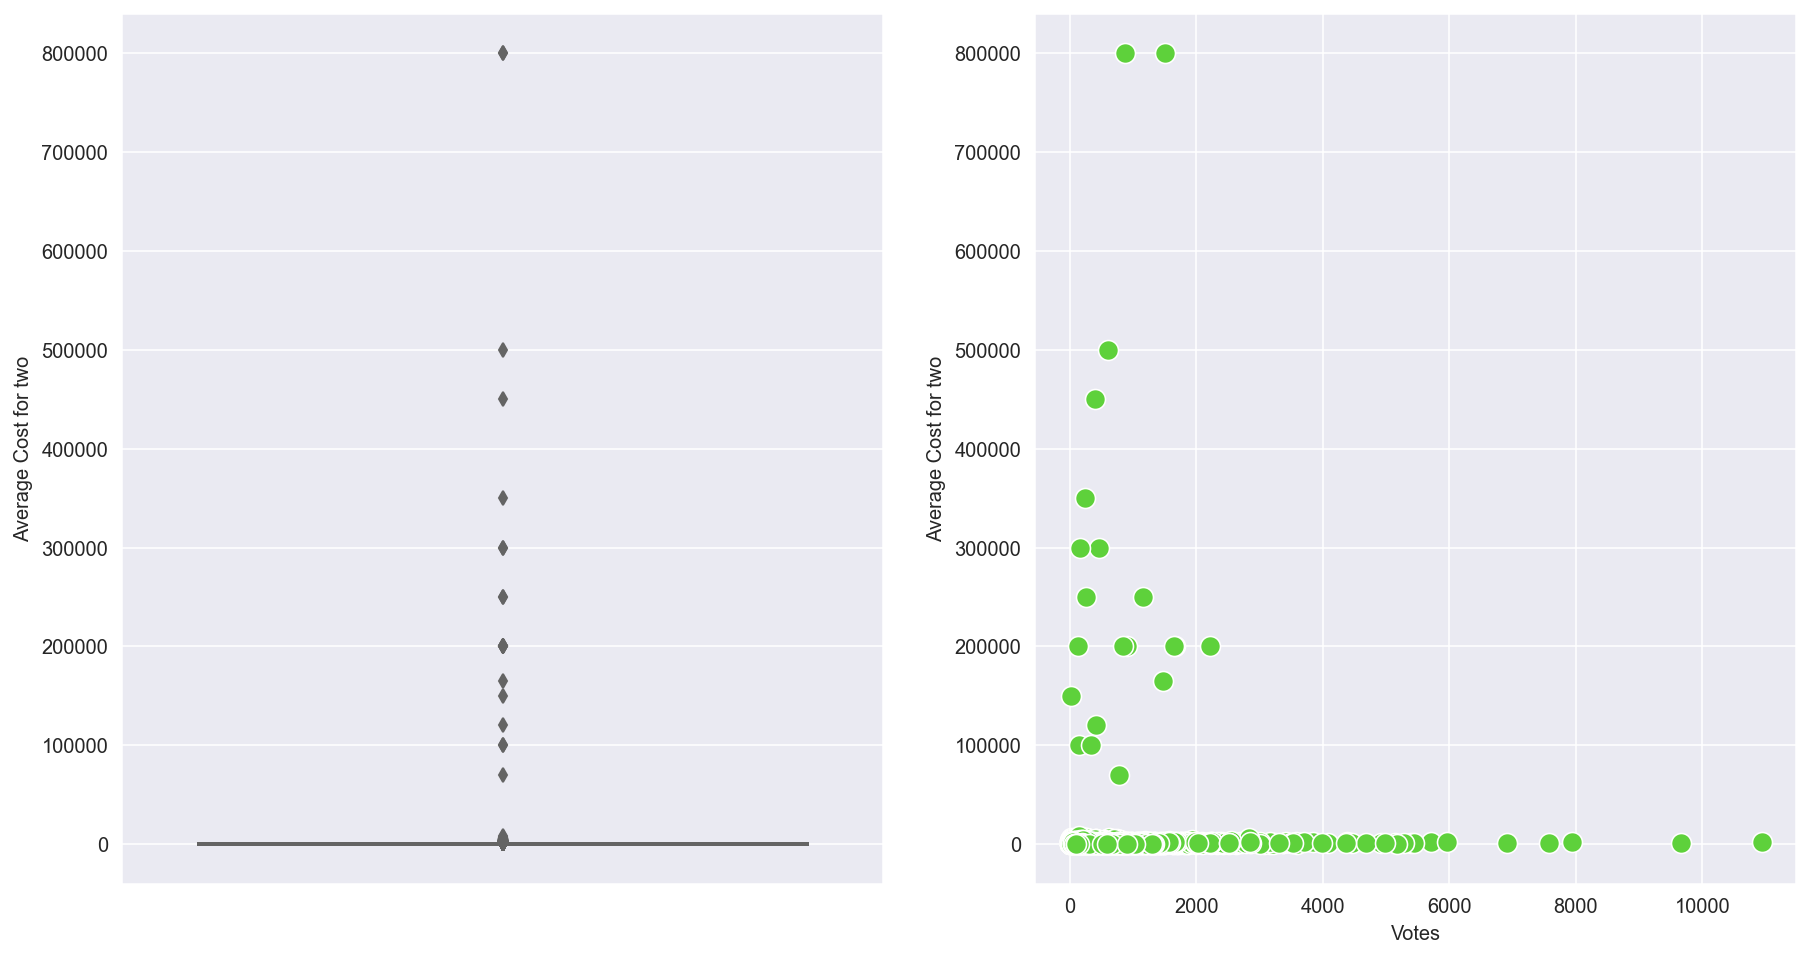

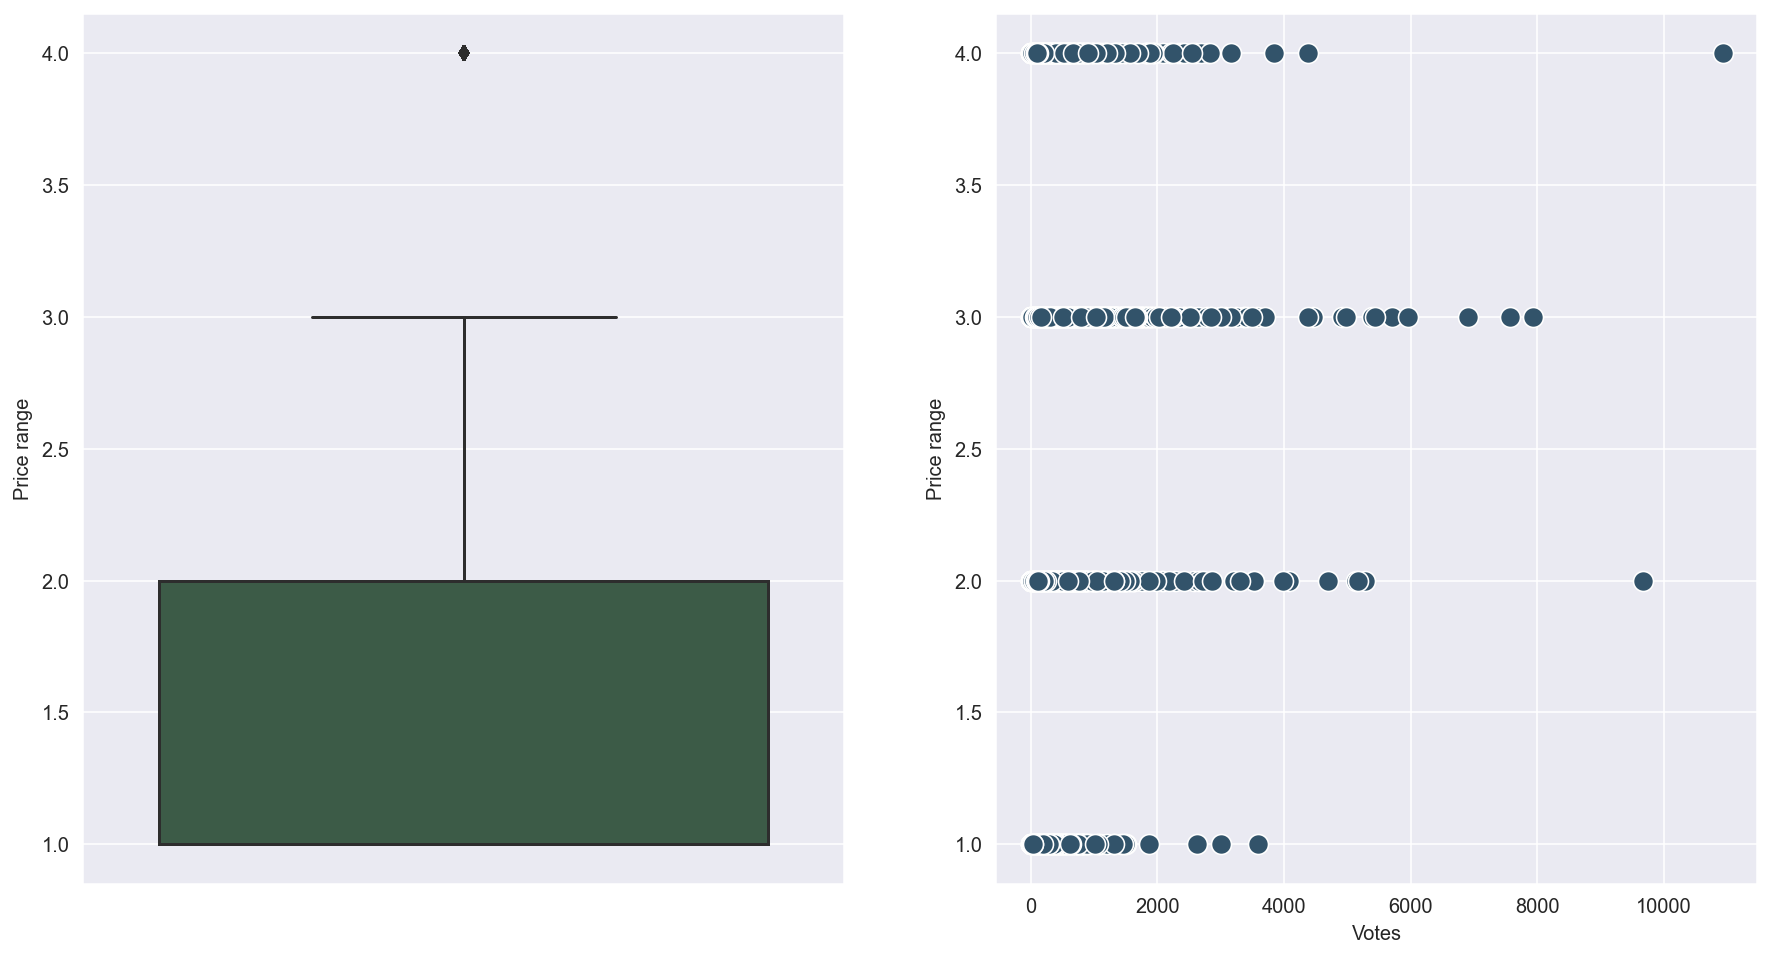

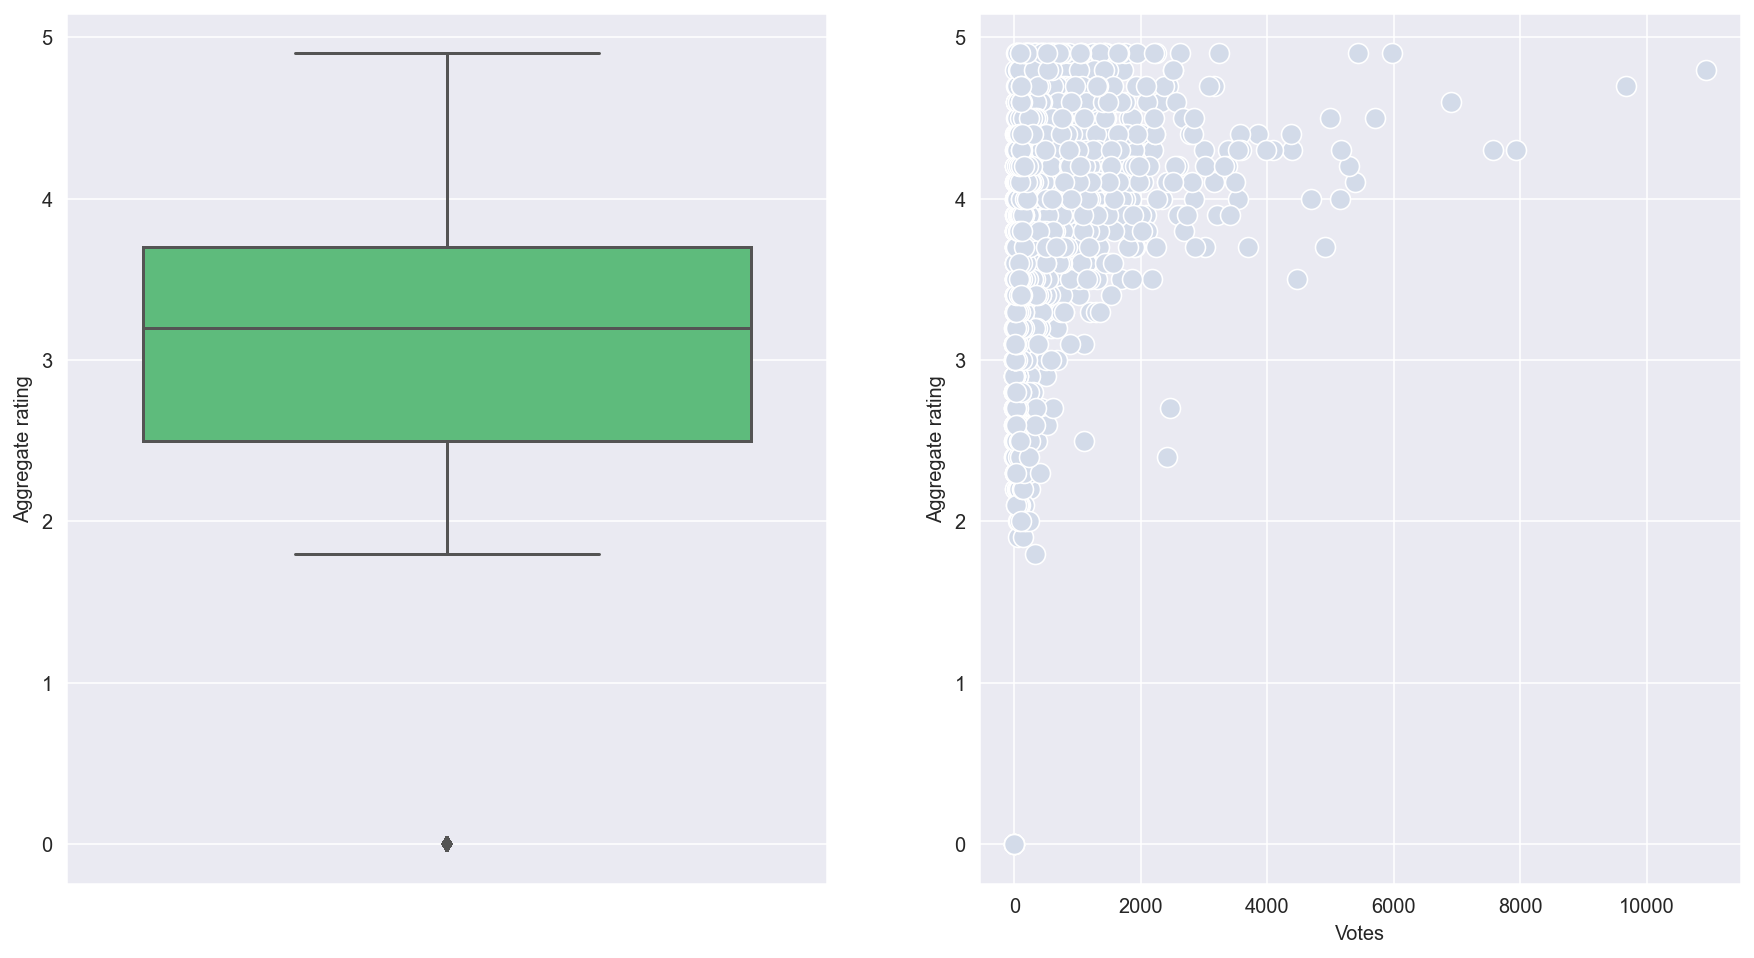

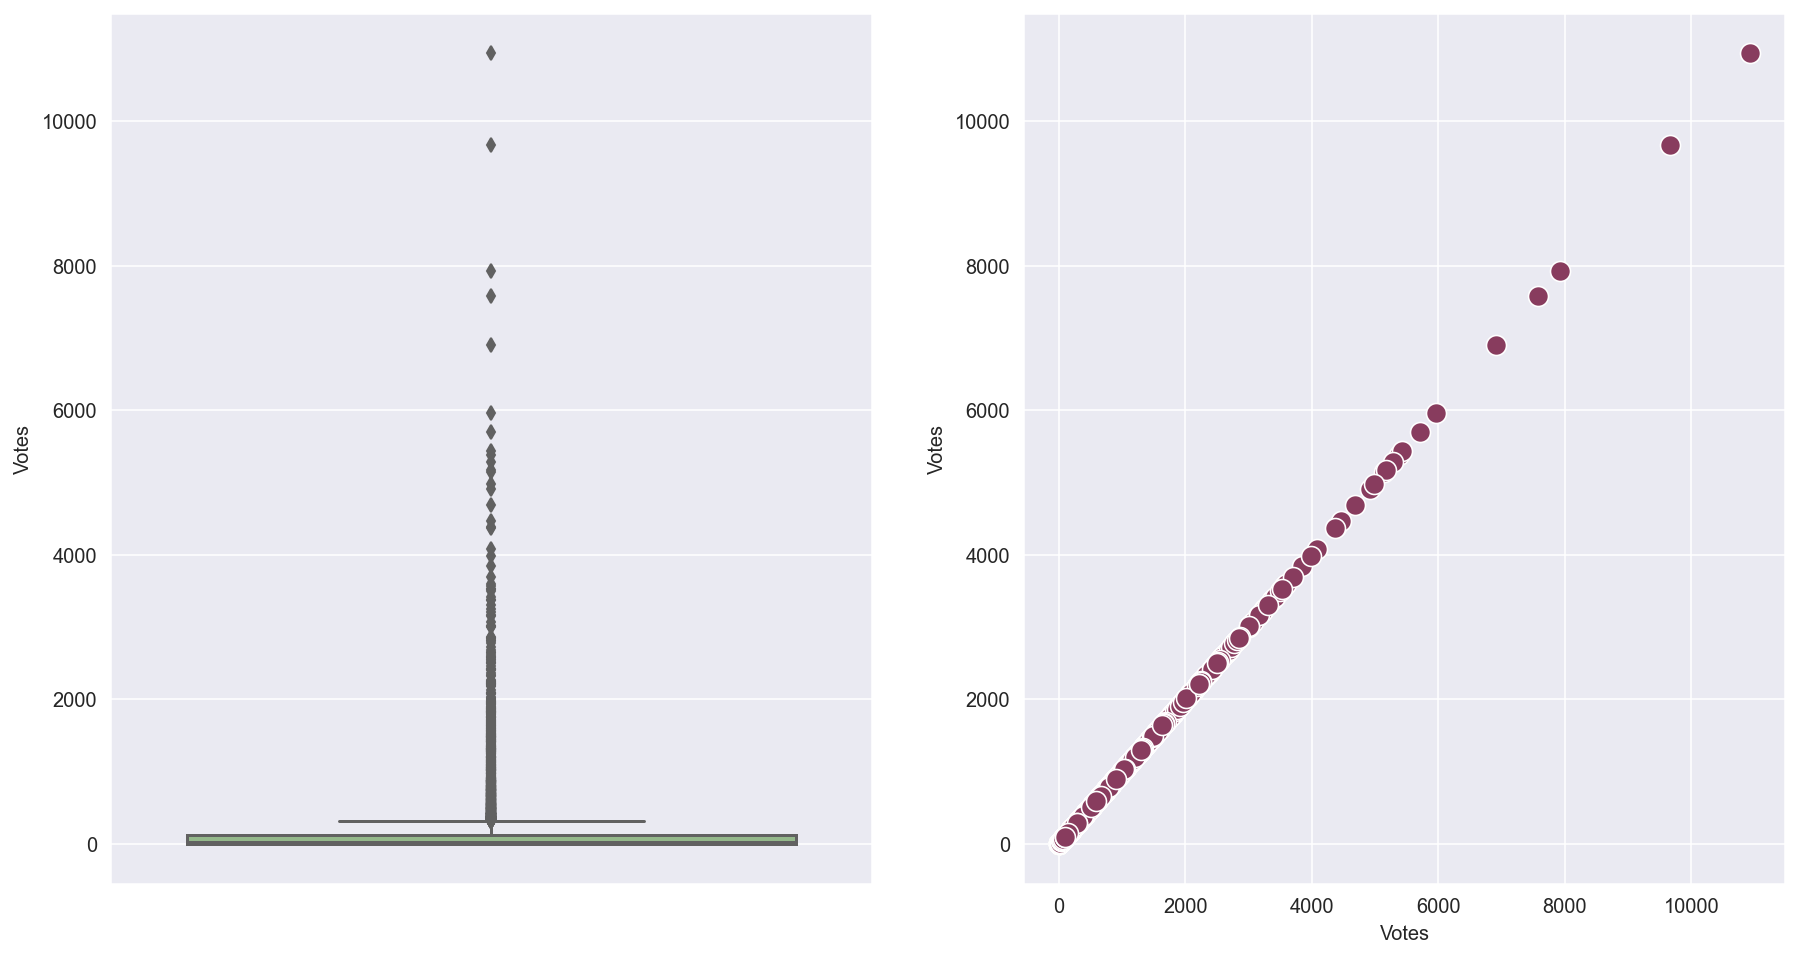

In [100]:
for col in df_num:
    print("\n")
    fig, ax =plt.subplots(1,2, figsize=(15,8))
    sns.boxplot(data=df, y=col, ax=ax[0], color=rand_color())
    sns.scatterplot(data=df,x = 'Votes', s = 100, y=col, ax=ax[1], color = rand_color())

In [101]:
df_num

Restaurant ID  Country Code   Longitude   Latitude  \
0           6317637           162  121.027535  14.565443   
1           6304287           162  121.014101  14.553708   
2           6300002           162  121.056831  14.581404   
3           6318506           162  121.056475  14.585318   
4           6314302           162  121.057508  14.584450   
...             ...           ...         ...        ...   
9546        5915730           208   28.977392  41.022793   
9547        5908749           208   29.041297  41.009847   
9548        5915807           208   29.034640  41.055817   
9549        5916112           208   29.036019  41.057979   
9550        5927402           208   29.026016  40.984776   

      Average Cost for two  Price range  Aggregate rating  Votes  
0                     1100            3               4.8    314  
1                     1200            3               4.5    591  
2                     4000            4               4.4    270  
3                     1500            4               4.9    365  
4                     1500            4               4.8    229  
...                    ...          ...               ...    ...  
9546                    80            3               4.1    788  
9547                   105            3               4.2   1034  
9548                   170            4               3.7    661  
9549                   120            4               4.0    901  
9550                    55            2               4.0    591  

[9551 rows x 8 columns]

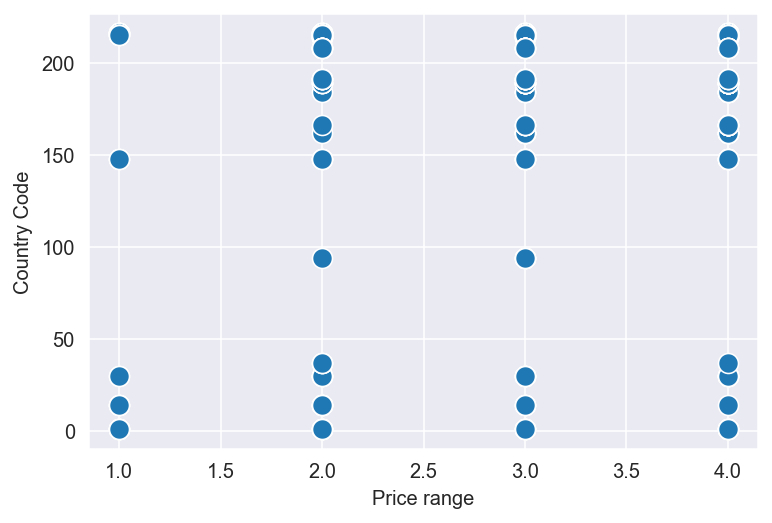

In [105]:
sns.scatterplot(data=df,x = 'Price range', s = 100, y='Country Code');

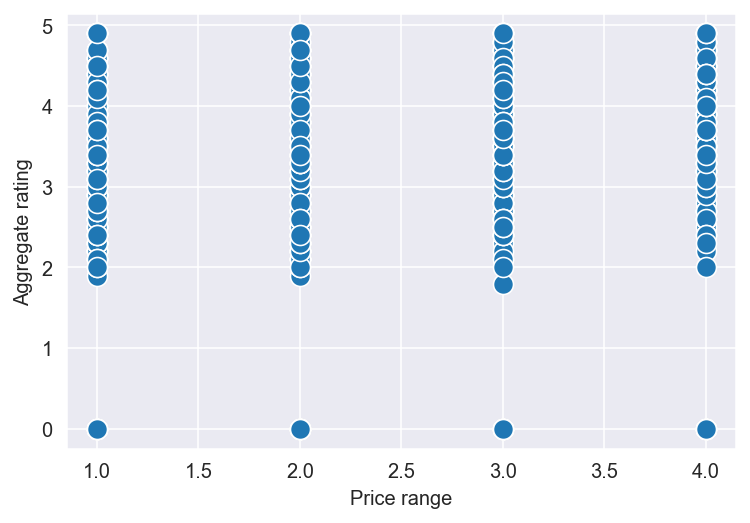

In [106]:
sns.scatterplot(data=df,x = 'Price range', s = 100, y='Aggregate rating');

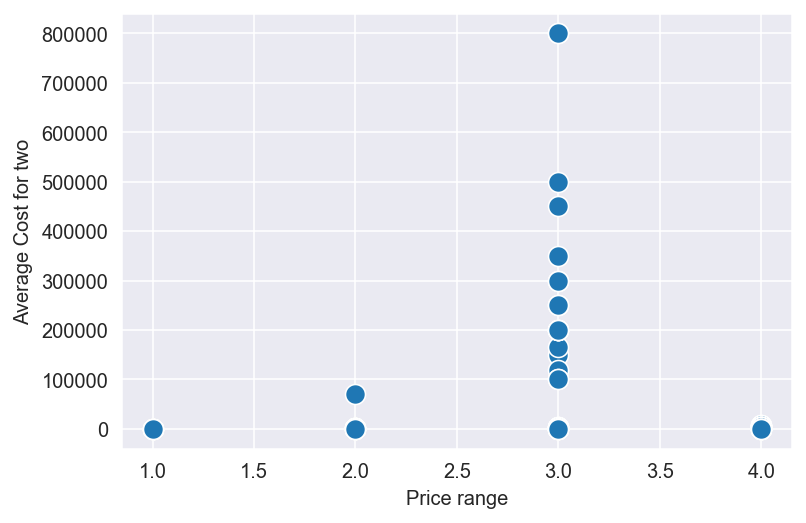

In [107]:
sns.scatterplot(data=df,x = 'Price range', s = 100, y='Average Cost for two');

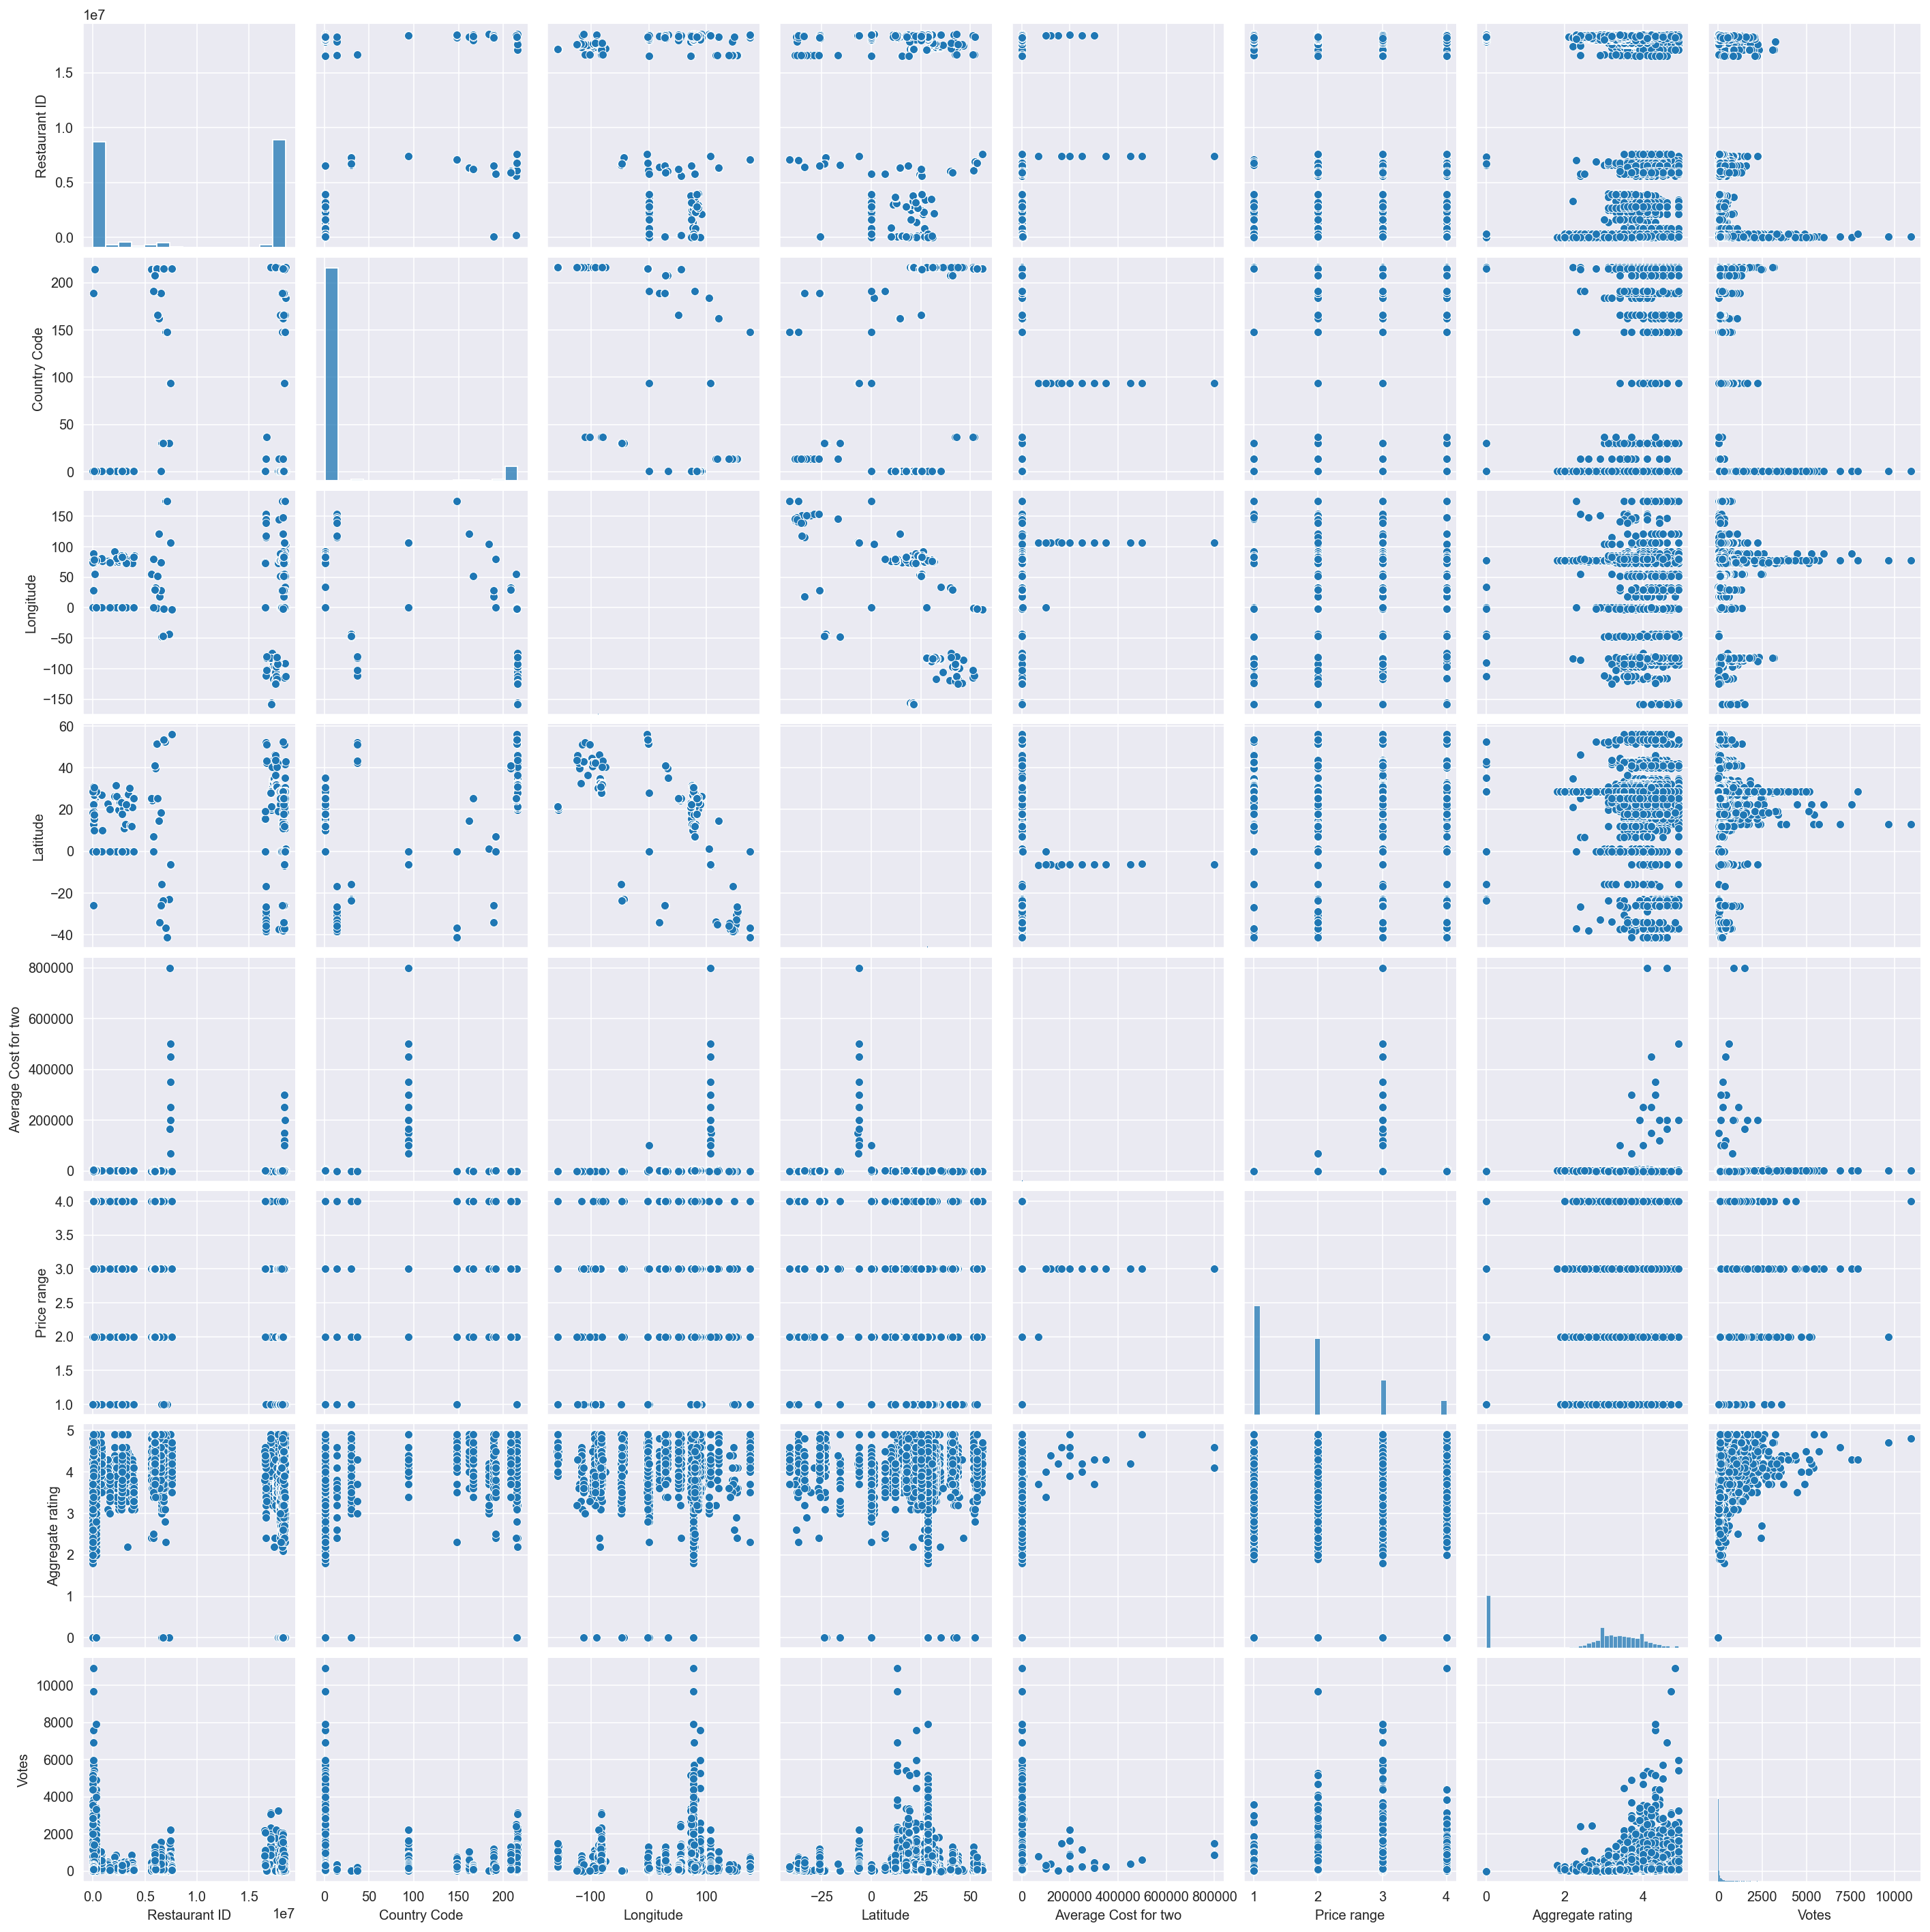

In [126]:
sns.pairplot(data=df);

# Bi-Variate- (Numerical-Categorical)

In [110]:
df_num.columns.tolist()

['Restaurant ID',
 'Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

In [109]:
df_cat.columns.tolist()

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']

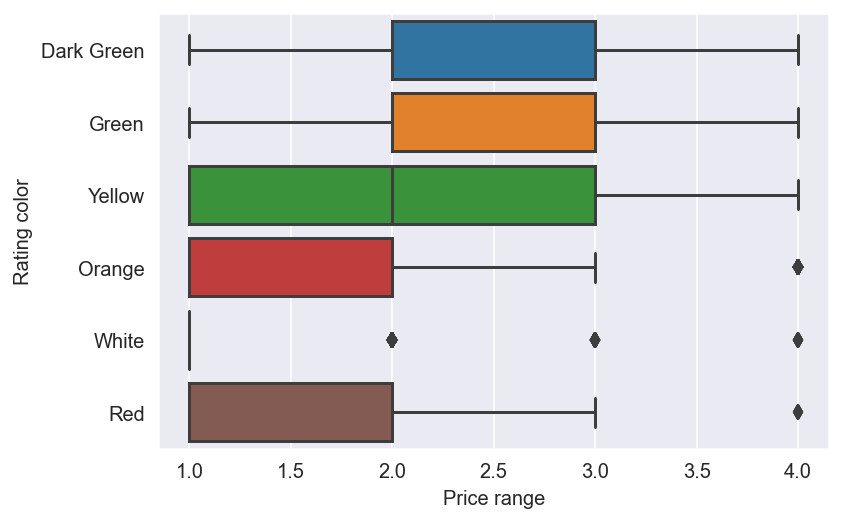

In [113]:
sns.boxplot(data=df, x='Price range', y='Rating color');

In [196]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

# Multi-Variate Analysis

In [204]:
ratings=df.groupby(['Aggregate rating', 'Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

Aggregate rating Rating color Rating text  Rating Count
0                0.0        White   Not rated          2148
1                1.8          Red        Poor             1
2                1.9          Red        Poor             2
3                2.0          Red        Poor             7
4                2.1          Red        Poor            15
5                2.2          Red        Poor            27
6                2.3          Red        Poor            47
7                2.4          Red        Poor            87
8                2.5       Orange     Average           110
9                2.6       Orange     Average           191
10               2.7       Orange     Average           250
11               2.8       Orange     Average           315
12               2.9       Orange     Average           381
13               3.0       Orange     Average           468
14               3.1       Orange     Average           519
15               3.2       Orange     Average           522
16               3.3       Orange     Average           483
17               3.4       Orange     Average           498
18               3.5       Yellow        Good           480
19               3.6       Yellow        Good           458
20               3.7       Yellow        Good           427
21               3.8       Yellow        Good           400
22               3.9       Yellow        Good           335
23               4.0        Green   Very Good           266
24               4.1        Green   Very Good           274
25               4.2        Green   Very Good           221
26               4.3        Green   Very Good           174
27               4.4        Green   Very Good           144
28               4.5   Dark Green   Excellent            95
29               4.6   Dark Green   Excellent            78
30               4.7   Dark Green   Excellent            42
31               4.8   Dark Green   Excellent            25
32               4.9   Dark Green   Excellent            61

# Observation

- When Rating is between 4.5 to 4.9---> Excellent
- When Rating is between 4.0 to 4.4--->very good
- when Rating is between 3.5 to 3.9----> good
- when Rating is between 2.5 to 3.4----> average
- when Rating is between 1.8 to 2.4----> Poor

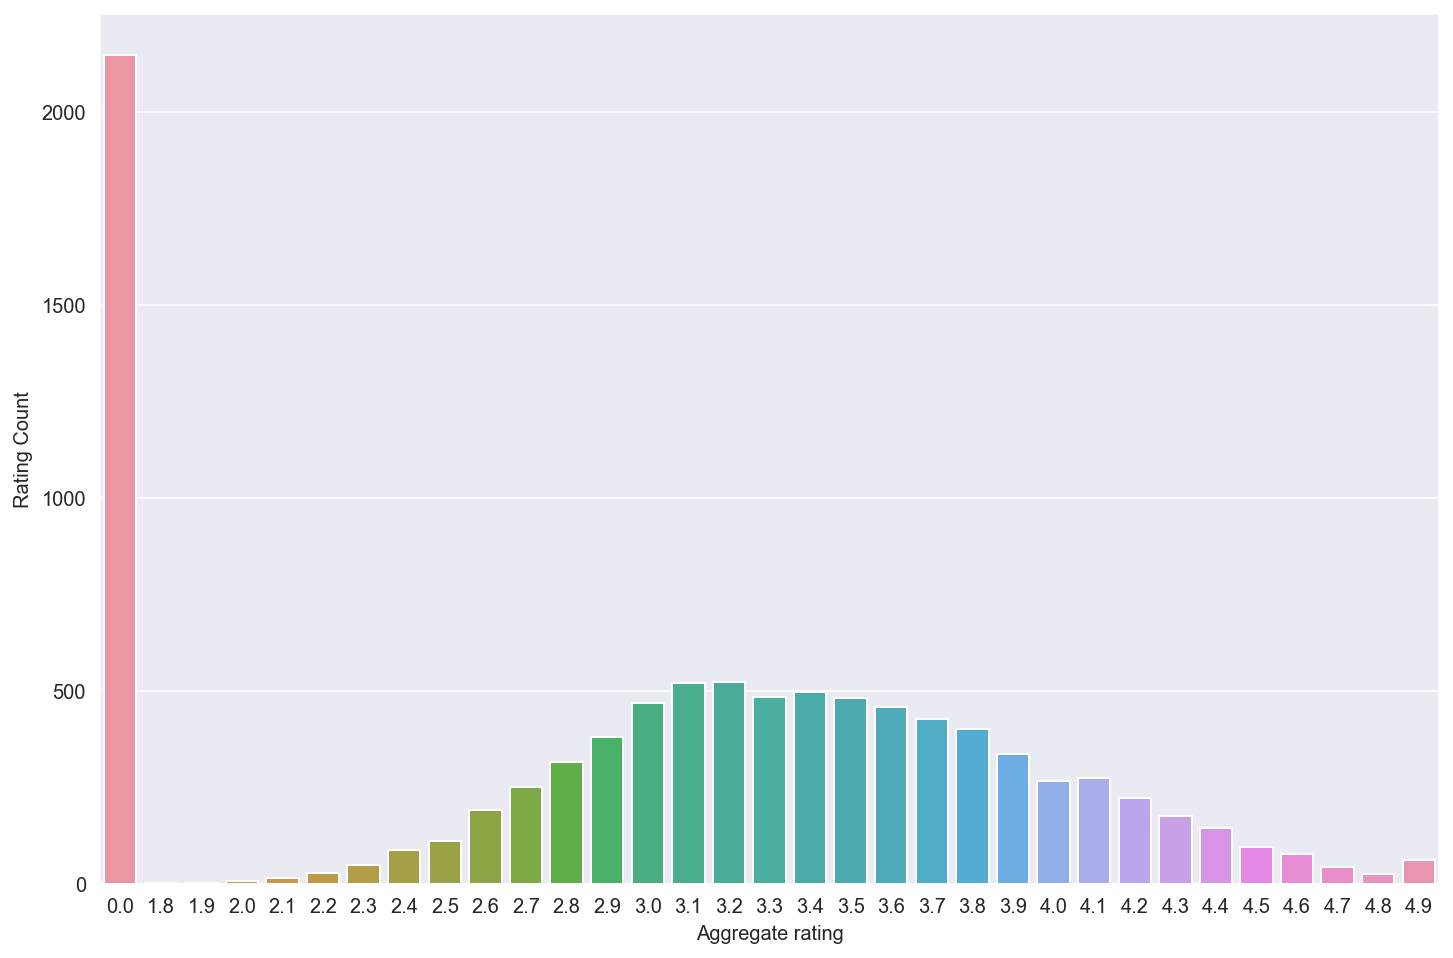

In [211]:
plt.rcParams['figure.figsize']=[12,8]
sns.barplot(data=ratings,x='Aggregate rating',y='Rating Count');

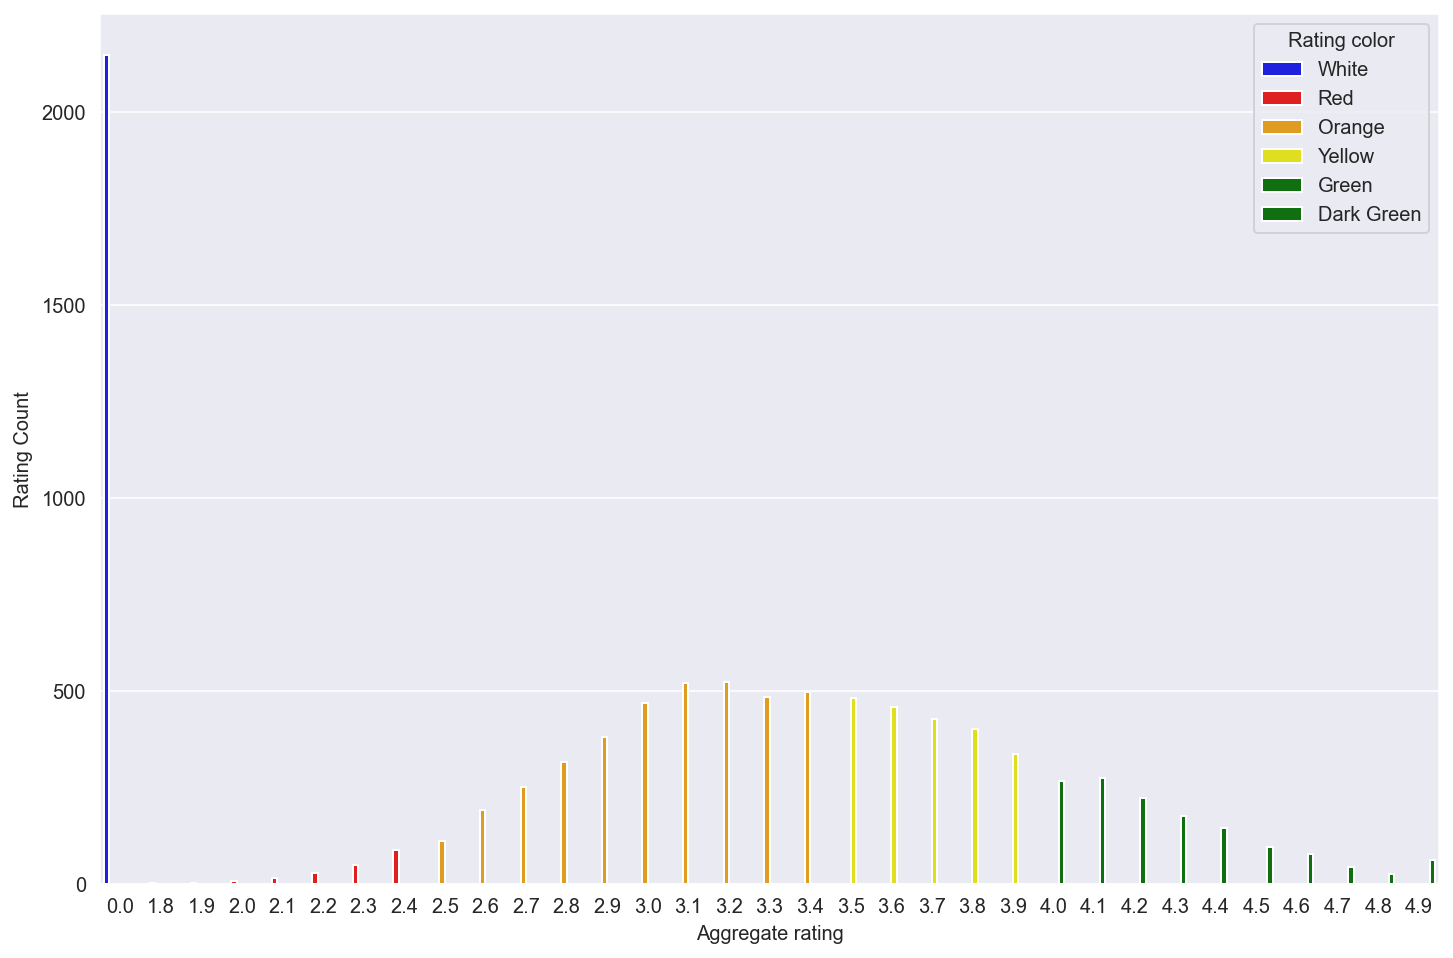

In [216]:
sns.barplot(data=ratings,x='Aggregate rating',y='Rating Count',hue='Rating color',palette=['blue','red','orange','yellow','green','green']);

# Observations:

- Not Rated count is very high
- Maximum number of rating are between 2.5 to 3.9

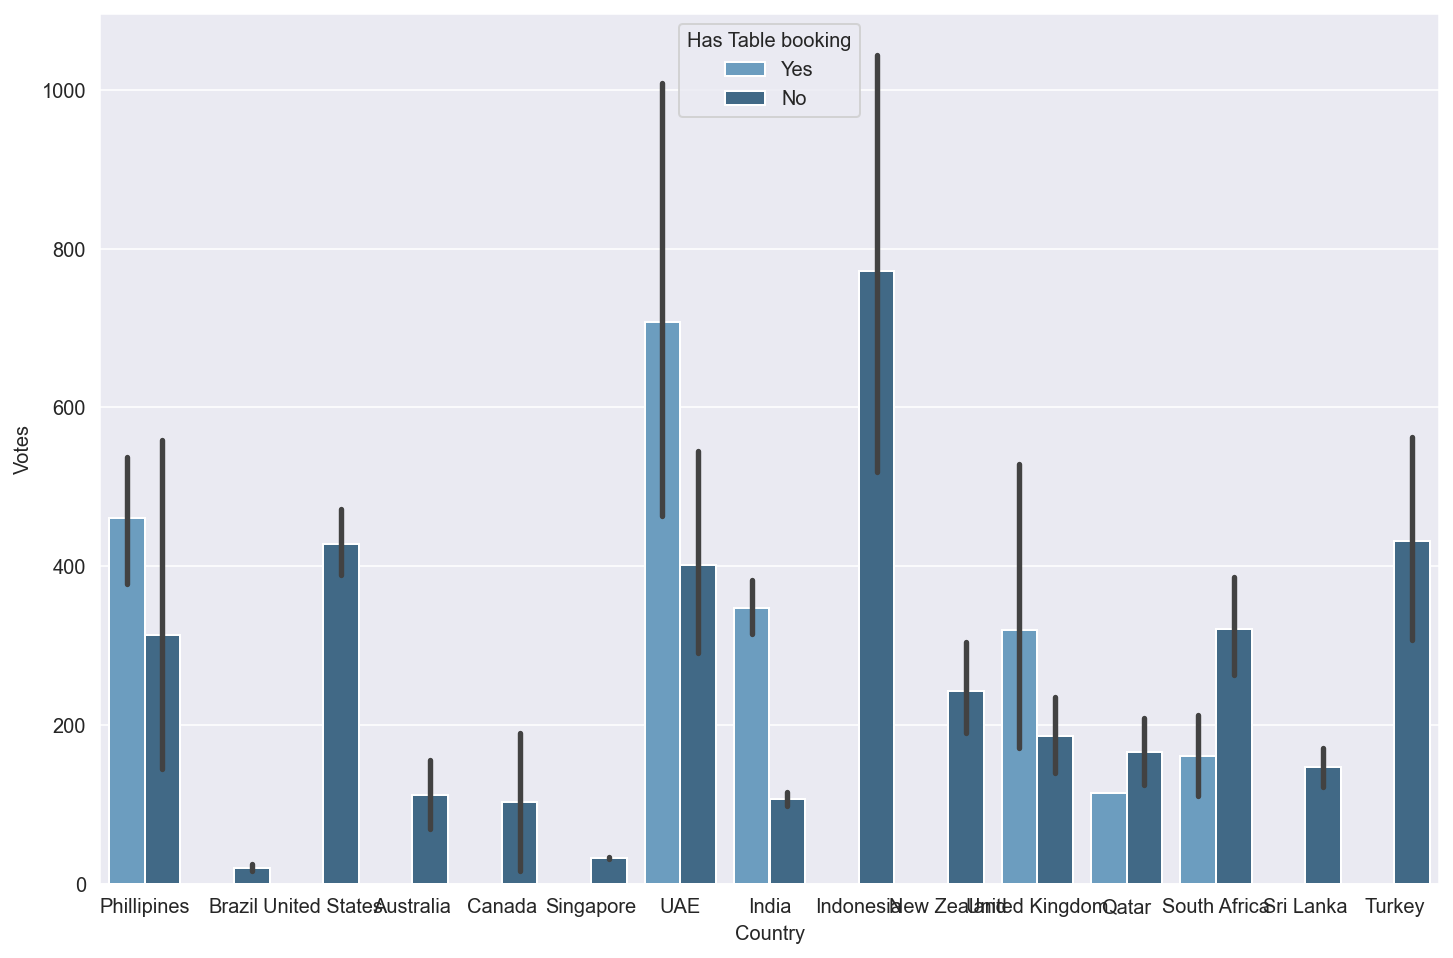

In [397]:
sns.barplot(x="Country",y="Votes",hue="Has Table booking",palette="Blues_d",data=df);

# Key Question Answers:

**Find the country names that have  0 Rating.**

In [246]:
df[df['Rating color']=='White'].groupby('Country').size().reset_index()

Country     0
0          Brazil     5
1           India  2139
2  United Kingdom     1
3   United States     3

In [238]:
df[df['Aggregate rating']==0].groupby('Country').size().reset_index()

Country     0
0          Brazil     5
1           India  2139
2  United Kingdom     1
3   United States     3

In [254]:
df[df['Rating text']=='Not rated'].groupby('Country').size().reset_index()

Country     0
0          Brazil     5
1           India  2139
2  United Kingdom     1
3   United States     3

# Observations
- Maximum number of 0 ratings are from Indian customers.

**Find out which currency is used by which country?**

In [258]:
df.groupby(['Currency','Country']).size().reset_index()

Currency         Country     0
0         Botswana Pula(P)     Phillipines    22
1       Brazilian Real(R$)          Brazil    60
2                Dollar($)       Australia    24
3                Dollar($)          Canada     4
4                Dollar($)       Singapore    20
5                Dollar($)   United States   434
6       Emirati Diram(AED)             UAE    60
7       Indian Rupees(Rs.)           India  8652
8   Indonesian Rupiah(IDR)       Indonesia    21
9            NewZealand($)     New Zealand    40
10              Pounds(£)  United Kingdom    80
11         Qatari Rial(QR)           Qatar    20
12                 Rand(R)    South Africa    60
13   Sri Lankan Rupee(LKR)       Sri Lanka    20
14        Turkish Lira(TL)          Turkey    34

**Which Countries do have online deliveries option?**

In [264]:
df.groupby(['Country','Has Online delivery']).size().reset_index()

Country Has Online delivery     0
0        Australia                  No    24
1           Brazil                  No    60
2           Canada                  No     4
3            India                  No  6229
4            India                 Yes  2423
5        Indonesia                  No    21
6      New Zealand                  No    40
7      Phillipines                  No    22
8            Qatar                  No    20
9        Singapore                  No    20
10    South Africa                  No    60
11       Sri Lanka                  No    20
12          Turkey                  No    34
13             UAE                  No    32
14             UAE                 Yes    28
15  United Kingdom                  No    80
16   United States                  No   434

In [268]:
df[df['Has Online delivery']=='Yes'].groupby('Country').size().reset_index()

Country     0
0   India  2423
1     UAE    28

In [269]:
df[df['Has Online delivery']=='Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [274]:
df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

Has Online delivery         Country     0
0                   No       Australia    24
1                   No          Brazil    60
2                   No          Canada     4
3                   No           India  6229
4                   No       Indonesia    21
5                   No     New Zealand    40
6                   No     Phillipines    22
7                   No           Qatar    20
8                   No       Singapore    20
9                   No    South Africa    60
10                  No       Sri Lanka    20
11                  No          Turkey    34
12                  No             UAE    32
13                  No  United Kingdom    80
14                  No   United States   434
15                 Yes           India  2423
16                 Yes             UAE    28

# Observations:
    
-  Online deliveries are available in India and UAE.

**show the distribution of top 5 countries and Cities.**

In [279]:
df['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [281]:
country_values=df['Country'].value_counts().values

In [282]:
country_labels=df['Country'].value_counts().index

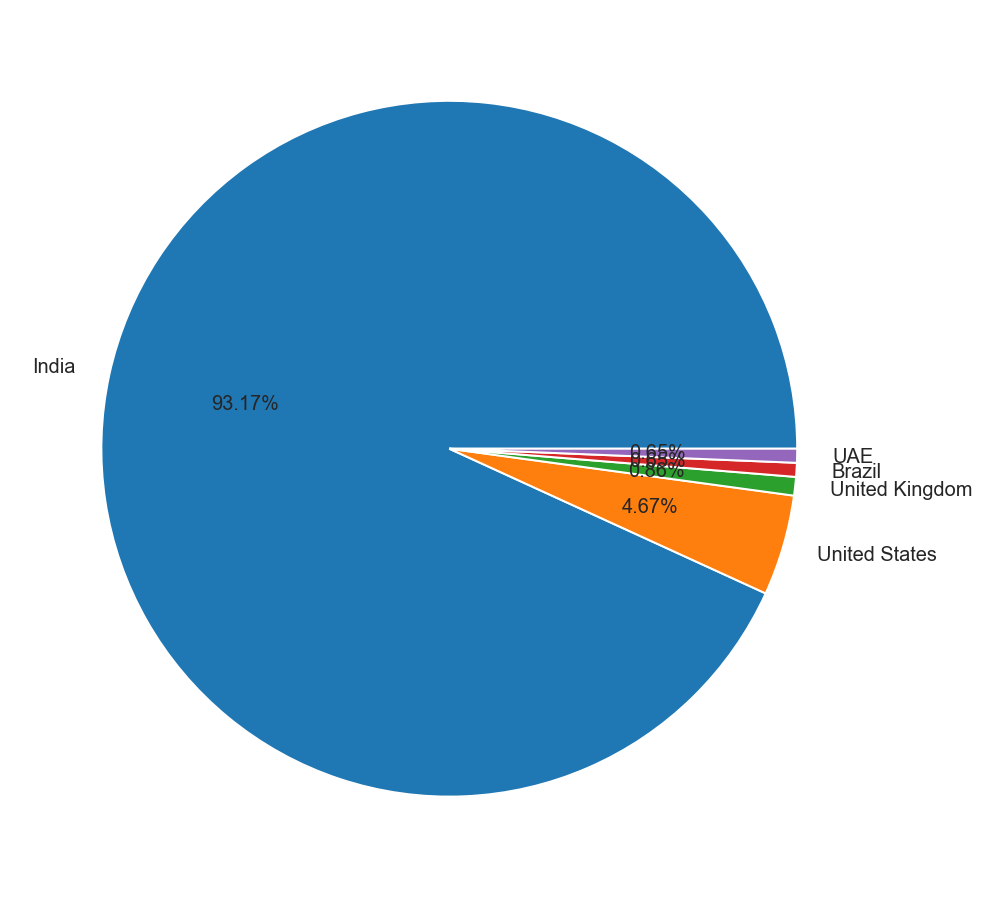

In [297]:
plt.pie(country_values[:5],labels=country_labels[:5],autopct='%1.2f%%');

In [288]:
df['City'].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

In [289]:
city_values=df['City'].value_counts().values

In [291]:
city_labels=df['City'].value_counts().index

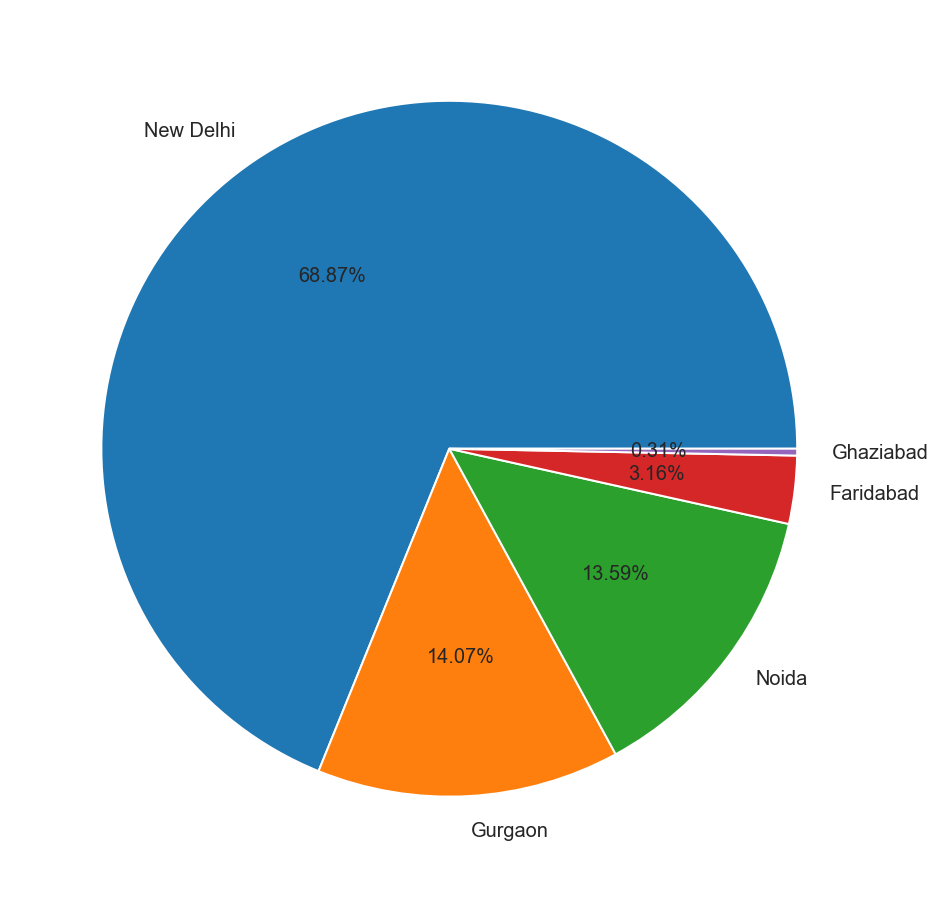

In [298]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%');

**Find the top 10 cuisines.**

In [377]:
df['Cuisines'].value_counts()[:10]

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

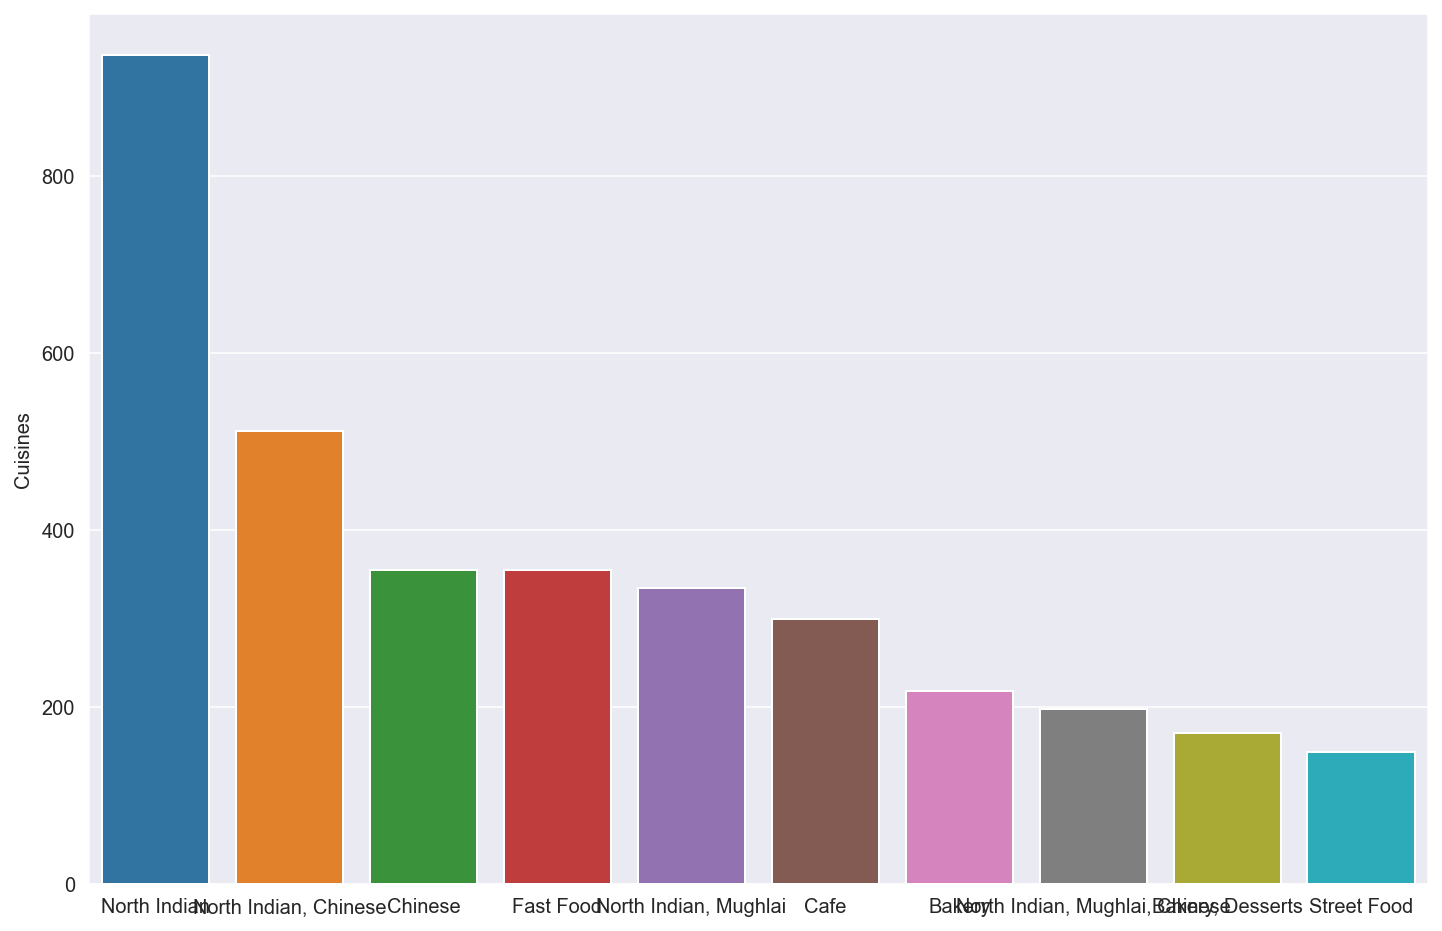

In [400]:
sns.barplot(y=df["Cuisines"].value_counts()[:10],x=df["Cuisines"].value_counts()[:10].index);